# Perihepatic Abscess Creep

Fit creep compliance of perihepatic abscess data.

**Data:** examples/data/pyRheo/perihepatic_abscess/creep_perihepatic_data.csv


In [1]:
# Google Colab compatibility - uncomment if running in Colab
# !pip install -q rheojax
# from google.colab import drive
# drive.mount('/content/drive')


## Setup and Imports

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
%matplotlib inline

import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from rheojax.core.data import RheoData
from rheojax.core.jax_config import safe_import_jax, verify_float64
from rheojax.models.fractional_maxwell_model import FractionalMaxwellModel
from rheojax.models.generalized_maxwell import GeneralizedMaxwell
from rheojax.pipeline.base import Pipeline

jax, jnp = safe_import_jax()
verify_float64()
np.set_printoptions(precision=4, suppress=True)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore', category=RuntimeWarning)

def r2_complex(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
    ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
    return float(1 - ss_res / ss_tot)

def mpe(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return float(np.mean(np.abs(y_true - y_pred) / np.maximum(np.abs(y_true), 1e-12)) * 100)

def load_tab_file(path):
    df = pd.read_csv(path, sep='	')
    df.columns = df.columns.str.strip()
    df = df.dropna()
    df.iloc[:,0] = pd.to_numeric(df.iloc[:,0], errors='coerce')
    df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], errors='coerce')
    df = df.dropna()
    return df
import arviz as az


INFO:2025-12-06 20:36:18,097:jax._src.xla_bridge:808: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)


Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)


Loading rheojax version 0.4.0


/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/piblin_jax/__init__.py:28: UserWarning: GPU acceleration is only available on Linux with CUDA 12+. Using JAX in CPU mode.
  from . import backend, data, dataio, transform


Found 'auto' as default backend, checking available backends


Matplotlib is available, defining as default backend


arviz_base available, exposing its functions as part of arviz.preview


arviz_stats available, exposing its functions as part of arviz.preview


arviz_plots available, exposing its functions as part of arviz.preview


## Load creep compliance data

In [3]:
DATA_DIR = Path.cwd().parent / 'data' / 'pyRheo' / 'perihepatic_abscess'
df = load_tab_file(DATA_DIR / 'creep_perihepatic_data.csv')
t = df.iloc[:,0].to_numpy()
J = df.iloc[:,1].to_numpy()
print(df.head())


       Time  Creep Compliance
0  0.010000          0.024139
1  0.010243          0.022159
2  0.010493          0.024002
3  0.010748          0.024553
4  0.011009          0.025381


## Fit creep models

In [4]:
gm = GeneralizedMaxwell(n_modes=2, modulus_type='tensile')
gm.fit(t, J, test_mode='creep', use_log_residuals=True)
gm_pred = gm.predict(t)
gm_r2 = gm.score(t, J)

fm = FractionalMaxwellModel()
fm.fit(t, J, test_mode='creep', use_log_residuals=True)
fm_pred = fm.predict(t, test_mode='creep')
fm_r2 = r2_complex(J, fm_pred)

print({'gm_r2': gm_r2, 'fm_r2': fm_r2})


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.229988s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=134 | final_cost=4.293831e-01 | time=1.230s | final_gradient_norm=5127246.35771932


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.566669s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=134 | final_cost=4.293831e-01 | time=0.567s | final_gradient_norm=5127246.35771932


Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.796215s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=66 | final_cost=4.443579e-01 | time=0.796s | final_gradient_norm=26321.517334627442


Element minimization: reducing from 2 to 1 modes


Starting least squares optimization | {'method': 'trf', 'n_params': 4, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


[WARNING] Inner optimization loop hit iteration limit | {'inner_iterations': 100, 'actual_reduction': -1}


Inner optimization loop hit iteration limit | {'inner_iterations': 100, 'actual_reduction': -1}


Timer: optimization took 1.353653s


Convergence: reason=Inner optimization loop exceeded maximum iterations. | iterations=1 | final_cost=1.249933e+02 | time=1.354s | final_gradient_norm=nan


NLSQ hit inner iteration limit; retrying with SciPy least_squares for stability.


{'gm_r2': 0.9980894518125447, 'fm_r2': -62647260551.33862}


## Plot creep fits

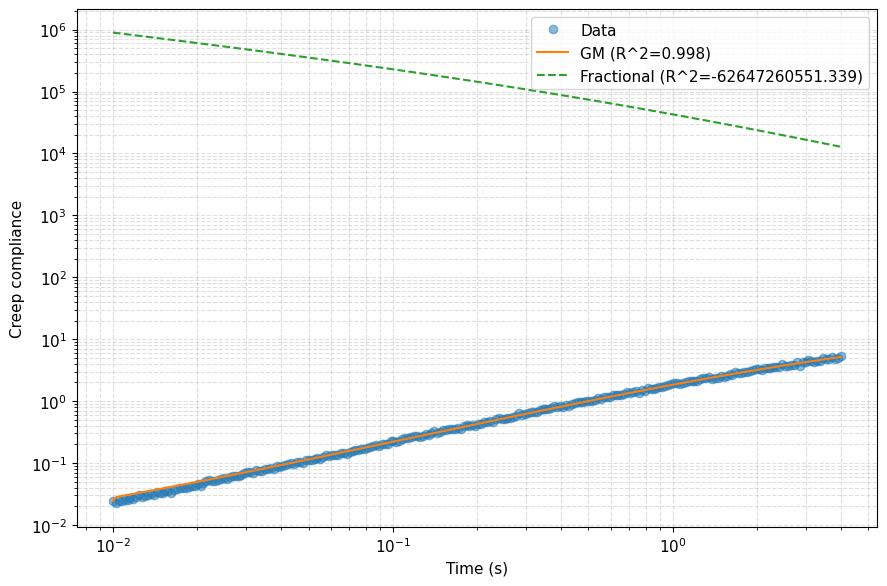

In [5]:
fig, ax = plt.subplots(figsize=(9,6))
ax.loglog(t, J, 'o', label='Data', alpha=0.5)
ax.loglog(t, gm_pred, '-', label=f'GM (R^2={gm_r2:.3f})')
ax.loglog(t, fm_pred, '--', label=f'Fractional (R^2={fm_r2:.3f})')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Creep compliance')
ax.grid(True, which='both', ls='--', alpha=0.4)
ax.legend()
plt.tight_layout()
display(fig)
plt.close(fig)

## Bayesian workflow (NLSQ → best model → NUTS diagnostics)

Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.330677s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=25 | final_cost=4.443579e-01 | time=0.331s | final_gradient_norm=208417.21662571112


Starting least squares optimization | {'method': 'trf', 'n_params': 4, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


[WARNING] Inner optimization loop hit iteration limit | {'inner_iterations': 100, 'actual_reduction': -1}


Inner optimization loop hit iteration limit | {'inner_iterations': 100, 'actual_reduction': -1}


Timer: optimization took 0.683602s


Convergence: reason=Inner optimization loop exceeded maximum iterations. | iterations=1 | final_cost=1.249933e+02 | time=0.684s | final_gradient_norm=nan


NLSQ hit inner iteration limit; retrying with SciPy least_squares for stability.


Model ranking (R²): [('gm', 0.998), ('fm', -62647260551.339)]


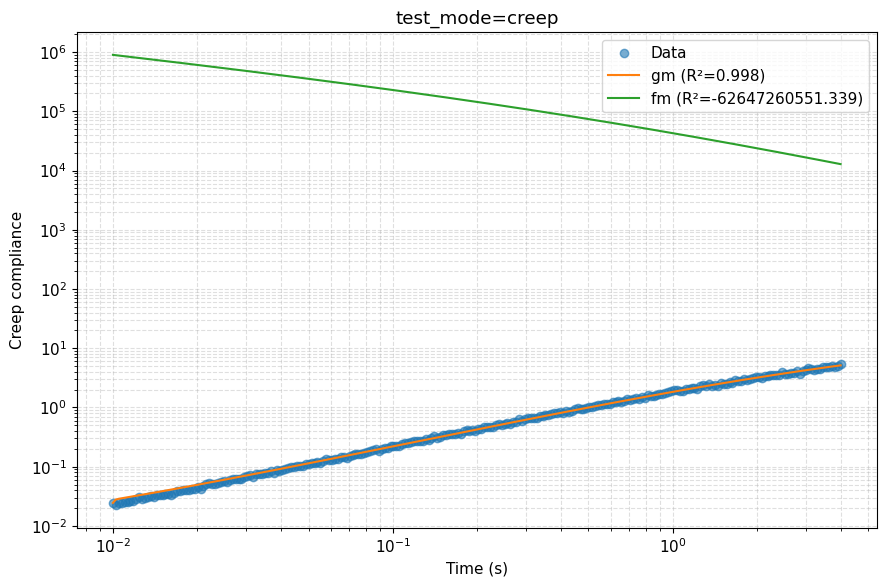

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   0%|          | 1/4000 [00:00<44:26,  1.50it/s, 1 steps of size 2.34e+00. acc. prob=0.00]

warmup:   1%|▏         | 50/4000 [00:00<00:45, 87.63it/s, 17 steps of size 1.26e-03. acc. prob=0.72]

warmup:   2%|▏         | 79/4000 [00:00<00:36, 106.32it/s, 1023 steps of size 3.75e-03. acc. prob=0.75]

warmup:   3%|▎         | 102/4000 [00:01<00:34, 111.37it/s, 1 steps of size 8.40e-03. acc. prob=0.75]  

warmup:   3%|▎         | 121/4000 [00:01<00:39, 97.36it/s, 1023 steps of size 1.71e-03. acc. prob=0.76]

warmup:   3%|▎         | 136/4000 [00:01<00:44, 86.83it/s, 1023 steps of size 4.20e-03. acc. prob=0.76]

warmup:   4%|▎         | 148/4000 [00:01<00:46, 82.69it/s, 1023 steps of size 2.40e-03. acc. prob=0.76]

warmup:   4%|▍         | 159/4000 [00:01<00:44, 85.68it/s, 5 steps of size 5.88e-04. acc. prob=0.76]   

warmup:   4%|▍         | 170/4000 [00:02<00:46, 81.80it/s, 1023 steps of size 5.62e-03. acc. prob=0.77]

warmup:   4%|▍         | 180/4000 [00:02<00:46, 81.68it/s, 1023 steps of size 8.10e-03. acc. prob=0.77]

warmup:   5%|▍         | 189/4000 [00:02<00:50, 75.94it/s, 1023 steps of size 3.65e-03. acc. prob=0.77]

warmup:   5%|▍         | 198/4000 [00:02<00:48, 77.65it/s, 3 steps of size 1.18e-03. acc. prob=0.77]   

warmup:   5%|▌         | 207/4000 [00:02<00:50, 74.80it/s, 587 steps of size 5.12e-03. acc. prob=0.77]

warmup:   5%|▌         | 215/4000 [00:02<00:50, 74.41it/s, 511 steps of size 7.91e-03. acc. prob=0.77]

warmup:   6%|▌         | 225/4000 [00:02<00:47, 79.63it/s, 511 steps of size 7.28e-03. acc. prob=0.77]

warmup:   6%|▌         | 234/4000 [00:02<00:51, 73.80it/s, 43 steps of size 4.83e-03. acc. prob=0.77] 

warmup:   6%|▌         | 242/4000 [00:03<00:53, 70.38it/s, 1023 steps of size 6.58e-03. acc. prob=0.77]

warmup:   6%|▋         | 250/4000 [00:03<00:54, 69.25it/s, 895 steps of size 6.04e-03. acc. prob=0.77] 

warmup:   7%|▋         | 261/4000 [00:03<00:49, 76.27it/s, 1023 steps of size 3.30e-03. acc. prob=0.77]

warmup:   7%|▋         | 269/4000 [00:03<00:51, 72.37it/s, 799 steps of size 2.62e-03. acc. prob=0.77] 

warmup:   7%|▋         | 277/4000 [00:03<00:50, 74.15it/s, 1023 steps of size 3.51e-03. acc. prob=0.77]

warmup:   7%|▋         | 285/4000 [00:03<00:53, 69.95it/s, 1023 steps of size 3.06e-03. acc. prob=0.77]

warmup:   7%|▋         | 293/4000 [00:03<00:52, 70.59it/s, 1023 steps of size 2.18e-03. acc. prob=0.77]

warmup:   8%|▊         | 301/4000 [00:03<00:52, 70.54it/s, 7 steps of size 1.90e-03. acc. prob=0.77]   

warmup:   8%|▊         | 309/4000 [00:04<00:53, 69.53it/s, 1023 steps of size 3.91e-03. acc. prob=0.78]

warmup:   8%|▊         | 316/4000 [00:04<00:53, 68.56it/s, 5 steps of size 8.61e-04. acc. prob=0.77]   

warmup:   8%|▊         | 323/4000 [00:04<00:53, 68.80it/s, 1023 steps of size 1.36e-03. acc. prob=0.77]

warmup:   8%|▊         | 330/4000 [00:04<00:56, 65.51it/s, 1023 steps of size 2.90e-03. acc. prob=0.78]

warmup:   8%|▊         | 337/4000 [00:04<00:57, 63.21it/s, 1023 steps of size 1.34e-03. acc. prob=0.78]

warmup:   9%|▊         | 344/4000 [00:04<00:57, 64.05it/s, 1023 steps of size 2.73e-03. acc. prob=0.78]

warmup:   9%|▉         | 351/4000 [00:04<00:56, 64.39it/s, 767 steps of size 2.48e-03. acc. prob=0.78] 

warmup:   9%|▉         | 358/4000 [00:04<00:59, 61.11it/s, 1023 steps of size 3.27e-03. acc. prob=0.78]

warmup:   9%|▉         | 365/4000 [00:04<01:00, 59.63it/s, 1023 steps of size 3.08e-03. acc. prob=0.78]

warmup:   9%|▉         | 372/4000 [00:05<01:02, 58.06it/s, 1023 steps of size 4.64e-03. acc. prob=0.78]

warmup:  10%|▉         | 381/4000 [00:05<00:55, 65.15it/s, 1023 steps of size 3.63e-03. acc. prob=0.78]

warmup:  10%|▉         | 388/4000 [00:05<00:56, 63.55it/s, 1023 steps of size 2.93e-03. acc. prob=0.78]

warmup:  10%|▉         | 396/4000 [00:05<00:55, 65.07it/s, 1023 steps of size 3.34e-03. acc. prob=0.78]

warmup:  10%|█         | 405/4000 [00:05<00:52, 68.59it/s, 1023 steps of size 3.47e-03. acc. prob=0.78]

warmup:  10%|█         | 412/4000 [00:05<00:53, 67.57it/s, 5 steps of size 1.31e-03. acc. prob=0.78]   

warmup:  10%|█         | 419/4000 [00:05<00:55, 64.45it/s, 3 steps of size 1.51e-03. acc. prob=0.78]

warmup:  11%|█         | 426/4000 [00:05<00:55, 64.62it/s, 1023 steps of size 2.32e-03. acc. prob=0.78]

warmup:  11%|█         | 433/4000 [00:05<00:59, 59.66it/s, 1023 steps of size 4.04e-03. acc. prob=0.78]

warmup:  11%|█         | 440/4000 [00:06<01:00, 58.79it/s, 1023 steps of size 3.22e-03. acc. prob=0.78]

warmup:  11%|█         | 448/4000 [00:06<00:57, 61.31it/s, 1023 steps of size 1.81e-03. acc. prob=0.78]

warmup:  11%|█▏        | 455/4000 [00:06<00:56, 62.81it/s, 1023 steps of size 1.10e-03. acc. prob=0.78]

warmup:  12%|█▏        | 462/4000 [00:06<00:58, 60.46it/s, 1023 steps of size 8.87e-04. acc. prob=0.78]

warmup:  12%|█▏        | 471/4000 [00:06<00:52, 66.67it/s, 1023 steps of size 6.52e-04. acc. prob=0.78]

warmup:  12%|█▏        | 478/4000 [00:06<00:54, 64.64it/s, 1023 steps of size 7.84e-04. acc. prob=0.78]

warmup:  12%|█▏        | 485/4000 [00:06<00:54, 64.93it/s, 1023 steps of size 1.64e-03. acc. prob=0.78]

warmup:  12%|█▏        | 492/4000 [00:06<00:56, 61.79it/s, 11 steps of size 3.93e-04. acc. prob=0.78]  

warmup:  12%|█▏        | 499/4000 [00:07<00:57, 60.73it/s, 1023 steps of size 7.22e-04. acc. prob=0.78]

warmup:  13%|█▎        | 506/4000 [00:07<00:55, 62.41it/s, 1023 steps of size 3.81e-04. acc. prob=0.78]

warmup:  13%|█▎        | 513/4000 [00:07<00:59, 58.62it/s, 1023 steps of size 9.57e-04. acc. prob=0.78]

warmup:  13%|█▎        | 519/4000 [00:07<00:59, 58.90it/s, 1023 steps of size 1.91e-03. acc. prob=0.78]

warmup:  13%|█▎        | 526/4000 [00:07<00:56, 61.85it/s, 1023 steps of size 1.16e-03. acc. prob=0.78]

warmup:  13%|█▎        | 533/4000 [00:07<00:54, 63.84it/s, 1023 steps of size 7.64e-04. acc. prob=0.78]

warmup:  14%|█▎        | 540/4000 [00:07<00:55, 62.71it/s, 3 steps of size 6.19e-04. acc. prob=0.78]   

warmup:  14%|█▍        | 551/4000 [00:07<00:48, 71.68it/s, 1023 steps of size 1.42e-03. acc. prob=0.78]

warmup:  14%|█▍        | 559/4000 [00:07<00:54, 62.66it/s, 1023 steps of size 1.76e-03. acc. prob=0.78]

warmup:  14%|█▍        | 566/4000 [00:08<00:53, 64.22it/s, 1023 steps of size 7.15e-04. acc. prob=0.78]

warmup:  14%|█▍        | 573/4000 [00:08<00:54, 62.57it/s, 1023 steps of size 1.32e-03. acc. prob=0.78]

warmup:  14%|█▍        | 580/4000 [00:08<00:56, 60.56it/s, 1023 steps of size 1.01e-03. acc. prob=0.78]

warmup:  15%|█▍        | 587/4000 [00:08<00:54, 62.12it/s, 275 steps of size 1.11e-03. acc. prob=0.78] 

warmup:  15%|█▍        | 594/4000 [00:08<00:56, 59.97it/s, 1023 steps of size 1.10e-03. acc. prob=0.78]

warmup:  15%|█▌        | 601/4000 [00:08<00:56, 60.36it/s, 1023 steps of size 9.51e-04. acc. prob=0.78]

warmup:  15%|█▌        | 608/4000 [00:08<00:57, 58.52it/s, 1023 steps of size 1.06e-03. acc. prob=0.78]

warmup:  15%|█▌        | 616/4000 [00:08<00:54, 61.99it/s, 1023 steps of size 1.04e-03. acc. prob=0.78]

warmup:  16%|█▌        | 623/4000 [00:09<00:54, 61.43it/s, 1023 steps of size 1.46e-03. acc. prob=0.78]

warmup:  16%|█▌        | 630/4000 [00:09<00:57, 59.08it/s, 1023 steps of size 9.30e-04. acc. prob=0.78]

warmup:  16%|█▌        | 636/4000 [00:09<01:00, 55.64it/s, 3 steps of size 4.74e-04. acc. prob=0.78]   

warmup:  16%|█▌        | 642/4000 [00:09<00:59, 56.14it/s, 1023 steps of size 6.26e-04. acc. prob=0.78]

warmup:  16%|█▌        | 649/4000 [00:09<00:58, 57.69it/s, 1023 steps of size 9.00e-04. acc. prob=0.78]

warmup:  16%|█▋        | 655/4000 [00:09<01:01, 54.20it/s, 1023 steps of size 8.86e-04. acc. prob=0.78]

warmup:  17%|█▋        | 663/4000 [00:09<00:57, 58.36it/s, 1023 steps of size 1.01e-03. acc. prob=0.78]

warmup:  17%|█▋        | 670/4000 [00:09<00:56, 58.68it/s, 1023 steps of size 1.25e-03. acc. prob=0.78]

warmup:  17%|█▋        | 677/4000 [00:09<00:55, 59.88it/s, 767 steps of size 8.16e-04. acc. prob=0.78] 

warmup:  17%|█▋        | 684/4000 [00:10<00:54, 61.08it/s, 243 steps of size 9.27e-04. acc. prob=0.78]

warmup:  17%|█▋        | 691/4000 [00:10<00:53, 61.44it/s, 511 steps of size 6.67e-04. acc. prob=0.78]

warmup:  17%|█▋        | 698/4000 [00:10<00:57, 57.10it/s, 1023 steps of size 9.78e-04. acc. prob=0.78]

warmup:  18%|█▊        | 704/4000 [00:10<00:59, 55.04it/s, 1023 steps of size 7.92e-04. acc. prob=0.78]

warmup:  18%|█▊        | 711/4000 [00:10<00:58, 56.38it/s, 1023 steps of size 1.32e-03. acc. prob=0.78]

warmup:  18%|█▊        | 718/4000 [00:10<00:56, 58.20it/s, 1023 steps of size 1.08e-03. acc. prob=0.78]

warmup:  18%|█▊        | 726/4000 [00:10<00:53, 61.45it/s, 1023 steps of size 1.21e-03. acc. prob=0.78]

warmup:  18%|█▊        | 734/4000 [00:10<00:49, 66.13it/s, 255 steps of size 1.18e-03. acc. prob=0.78] 

warmup:  19%|█▊        | 741/4000 [00:11<00:52, 61.86it/s, 511 steps of size 1.41e-03. acc. prob=0.78]

warmup:  19%|█▉        | 750/4000 [00:11<00:48, 66.52it/s, 1023 steps of size 1.57e-03. acc. prob=0.79]

warmup:  19%|█▉        | 757/4000 [00:11<00:48, 66.72it/s, 1023 steps of size 1.19e-03. acc. prob=0.78]

warmup:  19%|█▉        | 764/4000 [00:11<00:53, 60.41it/s, 1023 steps of size 9.16e-04. acc. prob=0.78]

warmup:  19%|█▉        | 771/4000 [00:11<00:56, 56.87it/s, 1023 steps of size 1.31e-03. acc. prob=0.79]

warmup:  19%|█▉        | 778/4000 [00:11<00:54, 59.44it/s, 1023 steps of size 1.71e-03. acc. prob=0.79]

warmup:  20%|█▉        | 785/4000 [00:11<00:57, 55.65it/s, 1023 steps of size 1.17e-03. acc. prob=0.79]

warmup:  20%|█▉        | 792/4000 [00:11<00:54, 59.08it/s, 1023 steps of size 7.74e-04. acc. prob=0.78]

warmup:  20%|█▉        | 799/4000 [00:12<00:57, 55.91it/s, 1023 steps of size 1.71e-03. acc. prob=0.79]

warmup:  20%|██        | 805/4000 [00:12<00:56, 56.37it/s, 1023 steps of size 1.24e-03. acc. prob=0.79]

warmup:  20%|██        | 811/4000 [00:12<00:58, 54.48it/s, 1023 steps of size 1.63e-03. acc. prob=0.79]

warmup:  20%|██        | 819/4000 [00:12<00:52, 60.75it/s, 1023 steps of size 8.80e-04. acc. prob=0.79]

warmup:  21%|██        | 826/4000 [00:12<00:51, 61.61it/s, 367 steps of size 7.76e-04. acc. prob=0.79] 

warmup:  21%|██        | 834/4000 [00:12<00:48, 65.73it/s, 1023 steps of size 8.73e-04. acc. prob=0.79]

warmup:  21%|██        | 841/4000 [00:12<00:52, 59.72it/s, 1023 steps of size 9.69e-04. acc. prob=0.79]

warmup:  21%|██▏       | 850/4000 [00:12<00:48, 64.82it/s, 1023 steps of size 1.43e-03. acc. prob=0.79]

warmup:  21%|██▏       | 857/4000 [00:12<00:52, 59.69it/s, 987 steps of size 1.05e-03. acc. prob=0.79] 

warmup:  22%|██▏       | 864/4000 [00:13<00:50, 61.54it/s, 511 steps of size 1.62e-03. acc. prob=0.79]

warmup:  22%|██▏       | 871/4000 [00:13<00:51, 61.25it/s, 1023 steps of size 1.34e-03. acc. prob=0.79]

warmup:  22%|██▏       | 878/4000 [00:13<00:49, 62.68it/s, 1023 steps of size 9.47e-04. acc. prob=0.79]

warmup:  22%|██▏       | 885/4000 [00:13<00:51, 60.35it/s, 1023 steps of size 1.40e-03. acc. prob=0.79]

warmup:  22%|██▏       | 892/4000 [00:13<00:52, 59.51it/s, 1023 steps of size 1.13e-03. acc. prob=0.79]

warmup:  22%|██▏       | 898/4000 [00:13<00:52, 58.60it/s, 1023 steps of size 1.29e-03. acc. prob=0.79]

warmup:  23%|██▎       | 904/4000 [00:13<00:55, 56.21it/s, 1023 steps of size 7.23e-04. acc. prob=0.79]

warmup:  23%|██▎       | 910/4000 [00:13<00:57, 53.72it/s, 1023 steps of size 1.43e-03. acc. prob=0.79]

warmup:  23%|██▎       | 917/4000 [00:14<00:54, 56.06it/s, 1023 steps of size 9.94e-04. acc. prob=0.79]

warmup:  23%|██▎       | 923/4000 [00:14<00:54, 56.94it/s, 1023 steps of size 1.56e-03. acc. prob=0.79]

warmup:  23%|██▎       | 935/4000 [00:14<00:42, 72.73it/s, 475 steps of size 1.07e-03. acc. prob=0.79] 

warmup:  24%|██▎       | 943/4000 [00:14<00:42, 71.36it/s, 1023 steps of size 1.12e-03. acc. prob=0.79]

warmup:  24%|██▍       | 953/4000 [00:14<00:39, 77.21it/s, 1023 steps of size 5.38e-04. acc. prob=0.79]

warmup:  24%|██▍       | 961/4000 [00:14<00:39, 77.30it/s, 1023 steps of size 8.98e-04. acc. prob=0.79]

warmup:  24%|██▍       | 972/4000 [00:14<00:36, 82.75it/s, 1023 steps of size 2.76e-04. acc. prob=0.79]

warmup:  25%|██▍       | 981/4000 [00:14<00:41, 73.11it/s, 1023 steps of size 1.49e-03. acc. prob=0.79]

warmup:  25%|██▍       | 990/4000 [00:14<00:40, 74.24it/s, 1023 steps of size 8.21e-04. acc. prob=0.79]

warmup:  25%|██▍       | 998/4000 [00:15<00:40, 74.33it/s, 1023 steps of size 9.37e-04. acc. prob=0.79]

sample:  25%|██▌       | 1006/4000 [00:15<00:43, 68.43it/s, 1023 steps of size 5.52e-04. acc. prob=0.97]

sample:  25%|██▌       | 1015/4000 [00:15<00:42, 71.06it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  26%|██▌       | 1023/4000 [00:15<00:46, 63.92it/s, 1023 steps of size 5.52e-04. acc. prob=0.97]

sample:  26%|██▌       | 1030/4000 [00:15<00:50, 59.16it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  26%|██▌       | 1037/4000 [00:15<00:52, 56.97it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  26%|██▌       | 1043/4000 [00:15<00:54, 54.70it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  26%|██▌       | 1049/4000 [00:15<00:55, 53.10it/s, 1023 steps of size 5.52e-04. acc. prob=0.97]

sample:  26%|██▋       | 1057/4000 [00:16<00:51, 56.93it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  27%|██▋       | 1064/4000 [00:16<00:49, 59.26it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  27%|██▋       | 1072/4000 [00:16<00:45, 64.10it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  27%|██▋       | 1079/4000 [00:16<00:50, 58.29it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  27%|██▋       | 1085/4000 [00:16<00:50, 57.32it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  27%|██▋       | 1092/4000 [00:16<00:49, 58.35it/s, 747 steps of size 5.52e-04. acc. prob=0.96] 

sample:  27%|██▋       | 1098/4000 [00:16<00:52, 55.25it/s, 1023 steps of size 5.52e-04. acc. prob=0.97]

sample:  28%|██▊       | 1104/4000 [00:16<00:53, 53.95it/s, 1023 steps of size 5.52e-04. acc. prob=0.97]

sample:  28%|██▊       | 1110/4000 [00:17<00:52, 55.02it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  28%|██▊       | 1117/4000 [00:17<00:49, 58.16it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  28%|██▊       | 1123/4000 [00:17<00:50, 57.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  28%|██▊       | 1129/4000 [00:17<00:53, 53.85it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  28%|██▊       | 1135/4000 [00:17<00:51, 55.22it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  29%|██▊       | 1141/4000 [00:17<00:50, 56.38it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  29%|██▊       | 1147/4000 [00:17<00:52, 54.53it/s, 903 steps of size 5.52e-04. acc. prob=0.96] 

sample:  29%|██▉       | 1153/4000 [00:17<00:57, 49.22it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  29%|██▉       | 1159/4000 [00:17<00:57, 49.06it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  29%|██▉       | 1164/4000 [00:18<00:57, 49.01it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  29%|██▉       | 1170/4000 [00:18<00:57, 49.14it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  29%|██▉       | 1176/4000 [00:18<00:55, 50.81it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  30%|██▉       | 1182/4000 [00:18<00:56, 50.32it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  30%|██▉       | 1188/4000 [00:18<00:53, 52.35it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  30%|██▉       | 1196/4000 [00:18<00:49, 57.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  30%|███       | 1202/4000 [00:18<00:51, 54.80it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  30%|███       | 1208/4000 [00:18<00:50, 54.97it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  30%|███       | 1215/4000 [00:18<00:47, 58.98it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  31%|███       | 1222/4000 [00:19<00:46, 60.08it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  31%|███       | 1229/4000 [00:19<00:44, 62.74it/s, 3 steps of size 5.52e-04. acc. prob=0.96]   

sample:  31%|███       | 1236/4000 [00:19<00:45, 61.00it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  31%|███       | 1244/4000 [00:19<00:43, 62.74it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  31%|███▏      | 1251/4000 [00:19<00:46, 58.91it/s, 975 steps of size 5.52e-04. acc. prob=0.96] 

sample:  31%|███▏      | 1257/4000 [00:19<00:46, 59.06it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  32%|███▏      | 1263/4000 [00:19<00:49, 55.66it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  32%|███▏      | 1270/4000 [00:19<00:46, 59.08it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  32%|███▏      | 1279/4000 [00:20<00:41, 65.98it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  32%|███▏      | 1286/4000 [00:20<00:45, 59.99it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  32%|███▏      | 1293/4000 [00:20<00:44, 60.86it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  32%|███▎      | 1300/4000 [00:20<00:47, 57.18it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  33%|███▎      | 1306/4000 [00:20<00:47, 57.26it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  33%|███▎      | 1313/4000 [00:20<00:46, 57.68it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  33%|███▎      | 1319/4000 [00:20<00:48, 54.94it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  33%|███▎      | 1325/4000 [00:20<00:48, 54.83it/s, 639 steps of size 5.52e-04. acc. prob=0.96] 

sample:  33%|███▎      | 1332/4000 [00:20<00:47, 56.66it/s, 967 steps of size 5.52e-04. acc. prob=0.96]

sample:  33%|███▎      | 1338/4000 [00:21<00:48, 54.33it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  34%|███▎      | 1344/4000 [00:21<00:48, 55.19it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  34%|███▍      | 1350/4000 [00:21<00:49, 53.19it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  34%|███▍      | 1356/4000 [00:21<00:50, 51.97it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  34%|███▍      | 1362/4000 [00:21<00:51, 51.04it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  34%|███▍      | 1368/4000 [00:21<00:51, 51.50it/s, 511 steps of size 5.52e-04. acc. prob=0.96] 

sample:  34%|███▍      | 1374/4000 [00:21<00:51, 51.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  34%|███▍      | 1380/4000 [00:21<00:51, 51.17it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  35%|███▍      | 1386/4000 [00:22<00:50, 51.87it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  35%|███▍      | 1393/4000 [00:22<00:47, 54.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  35%|███▍      | 1399/4000 [00:22<00:50, 51.75it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  35%|███▌      | 1405/4000 [00:22<00:50, 51.07it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  35%|███▌      | 1411/4000 [00:22<00:50, 50.82it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  35%|███▌      | 1417/4000 [00:22<00:50, 50.95it/s, 815 steps of size 5.52e-04. acc. prob=0.96] 

sample:  36%|███▌      | 1425/4000 [00:22<00:43, 58.54it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  36%|███▌      | 1431/4000 [00:22<00:43, 58.44it/s, 15 steps of size 5.52e-04. acc. prob=0.96]  

sample:  36%|███▌      | 1437/4000 [00:22<00:43, 58.41it/s, 7 steps of size 5.52e-04. acc. prob=0.96] 

sample:  36%|███▌      | 1447/4000 [00:23<00:38, 66.40it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  36%|███▋      | 1454/4000 [00:23<00:38, 66.97it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  37%|███▋      | 1461/4000 [00:23<00:41, 60.97it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  37%|███▋      | 1468/4000 [00:23<00:44, 57.38it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  37%|███▋      | 1476/4000 [00:23<00:40, 62.41it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  37%|███▋      | 1483/4000 [00:23<00:43, 58.28it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  37%|███▋      | 1489/4000 [00:23<00:45, 55.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  37%|███▋      | 1495/4000 [00:23<00:47, 53.00it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  38%|███▊      | 1501/4000 [00:24<00:47, 52.08it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  38%|███▊      | 1508/4000 [00:24<00:44, 56.05it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  38%|███▊      | 1514/4000 [00:24<00:45, 54.34it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  38%|███▊      | 1520/4000 [00:24<00:44, 55.53it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  38%|███▊      | 1526/4000 [00:24<00:45, 54.19it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  38%|███▊      | 1532/4000 [00:24<00:47, 52.05it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  39%|███▊      | 1543/4000 [00:24<00:36, 67.07it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  39%|███▉      | 1550/4000 [00:24<00:40, 60.13it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  39%|███▉      | 1557/4000 [00:24<00:39, 61.57it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  39%|███▉      | 1564/4000 [00:25<00:39, 61.47it/s, 643 steps of size 5.52e-04. acc. prob=0.96] 

sample:  39%|███▉      | 1571/4000 [00:25<00:42, 56.82it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  39%|███▉      | 1577/4000 [00:25<00:42, 57.06it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  40%|███▉      | 1583/4000 [00:25<00:44, 54.31it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  40%|███▉      | 1589/4000 [00:25<00:45, 53.15it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  40%|███▉      | 1595/4000 [00:25<00:46, 51.64it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  40%|████      | 1603/4000 [00:25<00:42, 56.27it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  40%|████      | 1609/4000 [00:25<00:44, 53.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  40%|████      | 1616/4000 [00:26<00:42, 55.73it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  41%|████      | 1623/4000 [00:26<00:41, 57.07it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  41%|████      | 1629/4000 [00:26<00:43, 54.50it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  41%|████      | 1635/4000 [00:26<00:43, 54.26it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  41%|████      | 1641/4000 [00:26<00:46, 51.15it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  41%|████      | 1647/4000 [00:26<00:47, 49.18it/s, 783 steps of size 5.52e-04. acc. prob=0.96] 

sample:  41%|████▏     | 1653/4000 [00:26<00:47, 49.42it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  42%|████▏     | 1660/4000 [00:26<00:44, 52.52it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  42%|████▏     | 1667/4000 [00:27<00:43, 54.21it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  42%|████▏     | 1673/4000 [00:27<00:44, 52.37it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  42%|████▏     | 1680/4000 [00:27<00:41, 56.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  42%|████▏     | 1686/4000 [00:27<00:43, 53.49it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  42%|████▏     | 1693/4000 [00:27<00:41, 55.75it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  42%|████▏     | 1699/4000 [00:27<00:42, 53.66it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  43%|████▎     | 1705/4000 [00:27<00:44, 51.82it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  43%|████▎     | 1711/4000 [00:27<00:43, 53.18it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  43%|████▎     | 1717/4000 [00:27<00:42, 53.55it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  43%|████▎     | 1723/4000 [00:28<00:43, 51.85it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  43%|████▎     | 1729/4000 [00:28<00:42, 53.56it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  43%|████▎     | 1737/4000 [00:28<00:39, 57.98it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  44%|████▎     | 1744/4000 [00:28<00:38, 58.14it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  44%|████▍     | 1751/4000 [00:28<00:37, 60.47it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  44%|████▍     | 1758/4000 [00:28<00:39, 56.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  44%|████▍     | 1764/4000 [00:28<00:41, 54.19it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  44%|████▍     | 1770/4000 [00:28<00:41, 53.81it/s, 539 steps of size 5.52e-04. acc. prob=0.96] 

sample:  44%|████▍     | 1776/4000 [00:29<00:40, 55.17it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  45%|████▍     | 1782/4000 [00:29<00:41, 53.43it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  45%|████▍     | 1788/4000 [00:29<00:41, 52.98it/s, 1011 steps of size 5.52e-04. acc. prob=0.96]

sample:  45%|████▍     | 1794/4000 [00:29<00:42, 52.44it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  45%|████▌     | 1800/4000 [00:29<00:42, 52.09it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  45%|████▌     | 1806/4000 [00:29<00:42, 51.17it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  45%|████▌     | 1812/4000 [00:29<00:41, 52.63it/s, 535 steps of size 5.52e-04. acc. prob=0.96] 

sample:  45%|████▌     | 1818/4000 [00:29<00:42, 51.52it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  46%|████▌     | 1824/4000 [00:29<00:42, 51.32it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  46%|████▌     | 1830/4000 [00:30<00:43, 50.15it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  46%|████▌     | 1836/4000 [00:30<00:42, 51.30it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  46%|████▌     | 1842/4000 [00:30<00:42, 50.44it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  46%|████▌     | 1848/4000 [00:30<00:42, 50.27it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  46%|████▋     | 1854/4000 [00:30<00:42, 50.36it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  46%|████▋     | 1860/4000 [00:30<00:40, 52.72it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  47%|████▋     | 1866/4000 [00:30<00:39, 54.26it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  47%|████▋     | 1872/4000 [00:30<00:40, 52.73it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  47%|████▋     | 1878/4000 [00:31<00:41, 51.06it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  47%|████▋     | 1885/4000 [00:31<00:39, 53.72it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  47%|████▋     | 1893/4000 [00:31<00:36, 58.51it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  47%|████▋     | 1899/4000 [00:31<00:36, 58.25it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  48%|████▊     | 1905/4000 [00:31<00:36, 57.76it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  48%|████▊     | 1912/4000 [00:31<00:35, 59.25it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  48%|████▊     | 1918/4000 [00:31<00:37, 56.07it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  48%|████▊     | 1924/4000 [00:31<00:38, 54.06it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  48%|████▊     | 1930/4000 [00:31<00:39, 52.70it/s, 919 steps of size 5.52e-04. acc. prob=0.96] 

sample:  48%|████▊     | 1936/4000 [00:32<00:40, 50.85it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  49%|████▊     | 1942/4000 [00:32<00:40, 50.93it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  49%|████▉     | 1950/4000 [00:32<00:36, 55.48it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  49%|████▉     | 1956/4000 [00:32<00:36, 56.51it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  49%|████▉     | 1962/4000 [00:32<00:35, 57.01it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  49%|████▉     | 1968/4000 [00:32<00:35, 57.76it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  49%|████▉     | 1976/4000 [00:32<00:33, 60.83it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  50%|████▉     | 1983/4000 [00:32<00:35, 57.21it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  50%|████▉     | 1989/4000 [00:33<00:36, 54.53it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  50%|████▉     | 1995/4000 [00:33<00:38, 51.98it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  50%|█████     | 2002/4000 [00:33<00:36, 54.48it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  50%|█████     | 2011/4000 [00:33<00:32, 60.71it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  50%|█████     | 2018/4000 [00:33<00:33, 59.44it/s, 47 steps of size 5.52e-04. acc. prob=0.96]  

sample:  51%|█████     | 2025/4000 [00:33<00:32, 60.49it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  51%|█████     | 2032/4000 [00:33<00:31, 61.88it/s, 335 steps of size 5.52e-04. acc. prob=0.96] 

sample:  51%|█████     | 2039/4000 [00:33<00:34, 57.39it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  51%|█████     | 2045/4000 [00:33<00:35, 55.08it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  51%|█████▏    | 2052/4000 [00:34<00:33, 57.46it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  51%|█████▏    | 2058/4000 [00:34<00:35, 54.49it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  52%|█████▏    | 2064/4000 [00:34<00:36, 53.58it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  52%|█████▏    | 2070/4000 [00:34<00:35, 54.46it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  52%|█████▏    | 2077/4000 [00:34<00:33, 56.60it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  52%|█████▏    | 2083/4000 [00:34<00:33, 57.26it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  52%|█████▏    | 2089/4000 [00:34<00:35, 53.77it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  52%|█████▏    | 2095/4000 [00:34<00:36, 51.85it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  53%|█████▎    | 2101/4000 [00:35<00:37, 50.92it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  53%|█████▎    | 2107/4000 [00:35<00:36, 52.19it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  53%|█████▎    | 2113/4000 [00:35<00:34, 54.18it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  53%|█████▎    | 2120/4000 [00:35<00:33, 55.69it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  53%|█████▎    | 2127/4000 [00:35<00:32, 57.91it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  53%|█████▎    | 2133/4000 [00:35<00:34, 54.60it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  53%|█████▎    | 2139/4000 [00:35<00:37, 50.15it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  54%|█████▎    | 2146/4000 [00:35<00:34, 54.09it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  54%|█████▍    | 2152/4000 [00:35<00:34, 52.89it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  54%|█████▍    | 2158/4000 [00:36<00:34, 54.04it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  54%|█████▍    | 2164/4000 [00:36<00:34, 52.83it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  54%|█████▍    | 2170/4000 [00:36<00:35, 52.09it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  54%|█████▍    | 2177/4000 [00:36<00:32, 55.74it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  55%|█████▍    | 2185/4000 [00:36<00:29, 61.80it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  55%|█████▍    | 2193/4000 [00:36<00:27, 64.89it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  55%|█████▌    | 2200/4000 [00:36<00:29, 60.29it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  55%|█████▌    | 2207/4000 [00:36<00:30, 58.57it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  55%|█████▌    | 2214/4000 [00:37<00:30, 58.85it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  56%|█████▌    | 2220/4000 [00:37<00:31, 56.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  56%|█████▌    | 2226/4000 [00:37<00:32, 53.93it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  56%|█████▌    | 2232/4000 [00:37<00:33, 53.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  56%|█████▌    | 2238/4000 [00:37<00:33, 51.99it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  56%|█████▌    | 2244/4000 [00:37<00:33, 52.62it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  56%|█████▋    | 2250/4000 [00:37<00:33, 51.64it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  56%|█████▋    | 2256/4000 [00:37<00:34, 50.52it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  57%|█████▋    | 2262/4000 [00:37<00:33, 51.54it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  57%|█████▋    | 2269/4000 [00:38<00:31, 54.21it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  57%|█████▋    | 2275/4000 [00:38<00:31, 53.99it/s, 455 steps of size 5.52e-04. acc. prob=0.96] 

sample:  57%|█████▋    | 2281/4000 [00:38<00:32, 52.27it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  57%|█████▋    | 2287/4000 [00:38<00:33, 51.81it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  57%|█████▋    | 2293/4000 [00:38<00:32, 52.15it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  57%|█████▋    | 2299/4000 [00:38<00:32, 51.99it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  58%|█████▊    | 2306/4000 [00:38<00:31, 54.02it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  58%|█████▊    | 2312/4000 [00:38<00:30, 55.13it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  58%|█████▊    | 2318/4000 [00:38<00:31, 53.10it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  58%|█████▊    | 2324/4000 [00:39<00:32, 51.66it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  58%|█████▊    | 2330/4000 [00:39<00:31, 52.39it/s, 207 steps of size 5.52e-04. acc. prob=0.96] 

sample:  58%|█████▊    | 2336/4000 [00:39<00:32, 51.83it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▊    | 2342/4000 [00:39<00:32, 51.17it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▊    | 2349/4000 [00:39<00:30, 53.80it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2355/4000 [00:39<00:31, 52.14it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2361/4000 [00:39<00:30, 54.01it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2368/4000 [00:39<00:29, 55.04it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  59%|█████▉    | 2375/4000 [00:40<00:28, 57.13it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|█████▉    | 2382/4000 [00:40<00:27, 58.64it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|█████▉    | 2388/4000 [00:40<00:28, 57.06it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|█████▉    | 2395/4000 [00:40<00:27, 57.81it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|██████    | 2401/4000 [00:40<00:28, 55.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|██████    | 2407/4000 [00:40<00:29, 53.75it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|██████    | 2413/4000 [00:40<00:29, 54.60it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  60%|██████    | 2419/4000 [00:40<00:30, 52.37it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2425/4000 [00:40<00:30, 51.08it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2431/4000 [00:41<00:30, 51.89it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2437/4000 [00:41<00:30, 51.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2443/4000 [00:41<00:28, 53.83it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████    | 2449/4000 [00:41<00:29, 52.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  61%|██████▏   | 2455/4000 [00:41<00:29, 51.64it/s, 823 steps of size 5.52e-04. acc. prob=0.96] 

sample:  62%|██████▏   | 2461/4000 [00:41<00:28, 53.78it/s, 3 steps of size 5.52e-04. acc. prob=0.96]  

sample:  62%|██████▏   | 2467/4000 [00:41<00:29, 52.37it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2473/4000 [00:41<00:28, 53.56it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2480/4000 [00:42<00:27, 55.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2488/4000 [00:42<00:24, 61.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  62%|██████▏   | 2495/4000 [00:42<00:26, 56.72it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2501/4000 [00:42<00:26, 56.36it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2508/4000 [00:42<00:25, 59.14it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2514/4000 [00:42<00:25, 59.14it/s, 455 steps of size 5.52e-04. acc. prob=0.96] 

sample:  63%|██████▎   | 2522/4000 [00:42<00:23, 62.59it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2530/4000 [00:42<00:22, 66.49it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  63%|██████▎   | 2537/4000 [00:42<00:23, 63.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▎   | 2544/4000 [00:43<00:23, 61.19it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▍   | 2551/4000 [00:43<00:23, 62.70it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▍   | 2558/4000 [00:43<00:22, 64.08it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▍   | 2565/4000 [00:43<00:23, 61.29it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▍   | 2572/4000 [00:43<00:23, 59.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  64%|██████▍   | 2579/4000 [00:43<00:23, 59.38it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▍   | 2585/4000 [00:43<00:25, 56.52it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▍   | 2591/4000 [00:43<00:25, 55.08it/s, 1019 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▍   | 2598/4000 [00:43<00:24, 56.52it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▌   | 2606/4000 [00:44<00:22, 61.16it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  65%|██████▌   | 2613/4000 [00:44<00:22, 60.55it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2620/4000 [00:44<00:23, 58.28it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2626/4000 [00:44<00:26, 50.92it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2632/4000 [00:44<00:27, 50.31it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2638/4000 [00:44<00:27, 50.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▌   | 2644/4000 [00:44<00:26, 52.12it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▋   | 2650/4000 [00:44<00:25, 52.17it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  66%|██████▋   | 2657/4000 [00:45<00:24, 54.03it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2663/4000 [00:45<00:24, 54.00it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2671/4000 [00:45<00:22, 57.84it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2677/4000 [00:45<00:22, 57.96it/s, 3 steps of size 5.52e-04. acc. prob=0.96]   

sample:  67%|██████▋   | 2685/4000 [00:45<00:21, 61.54it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2692/4000 [00:45<00:22, 57.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  67%|██████▋   | 2698/4000 [00:45<00:23, 55.53it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2705/4000 [00:45<00:22, 56.86it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2711/4000 [00:45<00:22, 57.05it/s, 527 steps of size 5.52e-04. acc. prob=0.96] 

sample:  68%|██████▊   | 2717/4000 [00:46<00:23, 54.71it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2723/4000 [00:46<00:24, 52.24it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2729/4000 [00:46<00:24, 51.80it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  68%|██████▊   | 2736/4000 [00:46<00:23, 53.81it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▊   | 2742/4000 [00:46<00:22, 54.85it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▊   | 2749/4000 [00:46<00:22, 56.69it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2755/4000 [00:46<00:22, 54.39it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2761/4000 [00:46<00:23, 52.93it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2767/4000 [00:47<00:23, 51.99it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2773/4000 [00:47<00:23, 52.12it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  69%|██████▉   | 2779/4000 [00:47<00:24, 50.87it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|██████▉   | 2786/4000 [00:47<00:22, 54.04it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|██████▉   | 2792/4000 [00:47<00:22, 53.41it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|██████▉   | 2798/4000 [00:47<00:24, 49.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|███████   | 2805/4000 [00:47<00:22, 52.50it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|███████   | 2811/4000 [00:47<00:23, 51.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  70%|███████   | 2817/4000 [00:48<00:23, 50.69it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2823/4000 [00:48<00:24, 47.97it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2829/4000 [00:48<00:23, 49.73it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2835/4000 [00:48<00:22, 51.29it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2843/4000 [00:48<00:20, 55.55it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████   | 2849/4000 [00:48<00:21, 52.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  71%|███████▏  | 2855/4000 [00:48<00:22, 51.99it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2861/4000 [00:48<00:21, 54.06it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2867/4000 [00:48<00:21, 52.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2873/4000 [00:49<00:22, 50.86it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2881/4000 [00:49<00:20, 55.89it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2888/4000 [00:49<00:18, 58.70it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  72%|███████▏  | 2898/4000 [00:49<00:16, 66.54it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  73%|███████▎  | 2907/4000 [00:49<00:15, 69.56it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  73%|███████▎  | 2916/4000 [00:49<00:15, 71.93it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  73%|███████▎  | 2924/4000 [00:49<00:15, 71.14it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  73%|███████▎  | 2932/4000 [00:49<00:15, 67.84it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▎  | 2940/4000 [00:50<00:15, 69.29it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▎  | 2947/4000 [00:50<00:16, 63.47it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▍  | 2954/4000 [00:50<00:17, 59.73it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▍  | 2961/4000 [00:50<00:17, 58.71it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▍  | 2967/4000 [00:50<00:18, 55.58it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  74%|███████▍  | 2973/4000 [00:50<00:18, 54.71it/s, 575 steps of size 5.52e-04. acc. prob=0.96] 

sample:  74%|███████▍  | 2979/4000 [00:50<00:19, 52.92it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▍  | 2985/4000 [00:50<00:18, 53.80it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▍  | 2991/4000 [00:51<00:18, 55.28it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▍  | 2997/4000 [00:51<00:19, 52.53it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▌  | 3004/4000 [00:51<00:18, 54.99it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▌  | 3010/4000 [00:51<00:17, 56.13it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  75%|███████▌  | 3016/4000 [00:51<00:18, 53.56it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▌  | 3022/4000 [00:51<00:18, 52.82it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▌  | 3028/4000 [00:51<00:18, 53.19it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▌  | 3034/4000 [00:51<00:18, 51.67it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▌  | 3040/4000 [00:51<00:18, 50.96it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▌  | 3047/4000 [00:52<00:17, 53.83it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▋  | 3053/4000 [00:52<00:17, 55.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  76%|███████▋  | 3059/4000 [00:52<00:16, 55.57it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3065/4000 [00:52<00:17, 53.06it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3071/4000 [00:52<00:17, 52.47it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3077/4000 [00:52<00:17, 51.87it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3083/4000 [00:52<00:17, 53.22it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3089/4000 [00:52<00:16, 54.59it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  77%|███████▋  | 3095/4000 [00:52<00:16, 55.95it/s, 3 steps of size 5.52e-04. acc. prob=0.96]   

sample:  78%|███████▊  | 3102/4000 [00:53<00:15, 58.72it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3108/4000 [00:53<00:15, 55.80it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3114/4000 [00:53<00:16, 53.50it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3121/4000 [00:53<00:15, 56.65it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3127/4000 [00:53<00:16, 53.76it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  78%|███████▊  | 3133/4000 [00:53<00:16, 52.37it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▊  | 3142/4000 [00:53<00:13, 62.09it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▊  | 3149/4000 [00:53<00:14, 58.09it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▉  | 3155/4000 [00:53<00:14, 57.99it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▉  | 3161/4000 [00:54<00:15, 55.62it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▉  | 3167/4000 [00:54<00:15, 54.36it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  79%|███████▉  | 3174/4000 [00:54<00:14, 55.64it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|███████▉  | 3181/4000 [00:54<00:13, 59.15it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|███████▉  | 3187/4000 [00:54<00:14, 56.63it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|███████▉  | 3193/4000 [00:54<00:15, 53.16it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|███████▉  | 3199/4000 [00:54<00:15, 50.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|████████  | 3205/4000 [00:54<00:17, 46.44it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  80%|████████  | 3211/4000 [00:55<00:16, 48.50it/s, 667 steps of size 5.52e-04. acc. prob=0.96] 

sample:  80%|████████  | 3218/4000 [00:55<00:15, 51.70it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  81%|████████  | 3224/4000 [00:55<00:15, 50.39it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  81%|████████  | 3232/4000 [00:55<00:13, 56.03it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  81%|████████  | 3238/4000 [00:55<00:14, 53.79it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  81%|████████  | 3244/4000 [00:55<00:13, 54.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  81%|████████▏ | 3250/4000 [00:55<00:13, 54.81it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  81%|████████▏ | 3256/4000 [00:55<00:13, 54.71it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  82%|████████▏ | 3263/4000 [00:56<00:13, 55.72it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  82%|████████▏ | 3270/4000 [00:56<00:12, 56.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  82%|████████▏ | 3276/4000 [00:56<00:12, 57.22it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  82%|████████▏ | 3282/4000 [00:56<00:12, 55.40it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  82%|████████▏ | 3288/4000 [00:56<00:13, 54.64it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  82%|████████▏ | 3294/4000 [00:56<00:13, 52.73it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  82%|████████▎ | 3300/4000 [00:56<00:13, 52.03it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  83%|████████▎ | 3306/4000 [00:56<00:13, 50.52it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  83%|████████▎ | 3312/4000 [00:56<00:13, 50.89it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  83%|████████▎ | 3318/4000 [00:57<00:13, 50.40it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  83%|████████▎ | 3324/4000 [00:57<00:13, 50.77it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  83%|████████▎ | 3331/4000 [00:57<00:12, 53.81it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  83%|████████▎ | 3337/4000 [00:57<00:12, 52.43it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  84%|████████▎ | 3343/4000 [00:57<00:12, 51.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  84%|████████▎ | 3349/4000 [00:57<00:12, 51.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  84%|████████▍ | 3355/4000 [00:57<00:11, 53.95it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  84%|████████▍ | 3362/4000 [00:57<00:11, 55.67it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  84%|████████▍ | 3368/4000 [00:58<00:11, 54.02it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  84%|████████▍ | 3374/4000 [00:58<00:11, 53.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  84%|████████▍ | 3380/4000 [00:58<00:11, 52.34it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  85%|████████▍ | 3386/4000 [00:58<00:11, 52.01it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  85%|████████▍ | 3392/4000 [00:58<00:11, 51.14it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  85%|████████▍ | 3399/4000 [00:58<00:11, 53.62it/s, 883 steps of size 5.52e-04. acc. prob=0.96] 

sample:  85%|████████▌ | 3406/4000 [00:58<00:10, 57.36it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  85%|████████▌ | 3412/4000 [00:58<00:10, 55.30it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  85%|████████▌ | 3419/4000 [00:58<00:10, 56.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  86%|████████▌ | 3425/4000 [00:59<00:10, 54.39it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  86%|████████▌ | 3431/4000 [00:59<00:10, 53.55it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  86%|████████▌ | 3437/4000 [00:59<00:10, 52.39it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  86%|████████▌ | 3444/4000 [00:59<00:09, 56.87it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  86%|████████▋ | 3453/4000 [00:59<00:08, 62.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  86%|████████▋ | 3460/4000 [00:59<00:08, 61.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  87%|████████▋ | 3467/4000 [00:59<00:08, 61.18it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  87%|████████▋ | 3474/4000 [00:59<00:09, 57.93it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  87%|████████▋ | 3480/4000 [01:00<00:09, 55.45it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  87%|████████▋ | 3486/4000 [01:00<00:09, 53.35it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  87%|████████▋ | 3493/4000 [01:00<00:09, 54.88it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  87%|████████▋ | 3499/4000 [01:00<00:09, 52.95it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  88%|████████▊ | 3507/4000 [01:00<00:08, 57.35it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  88%|████████▊ | 3513/4000 [01:00<00:08, 55.72it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  88%|████████▊ | 3519/4000 [01:00<00:08, 54.19it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  88%|████████▊ | 3526/4000 [01:00<00:08, 56.43it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  88%|████████▊ | 3532/4000 [01:00<00:08, 54.60it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  88%|████████▊ | 3539/4000 [01:01<00:08, 55.98it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  89%|████████▊ | 3546/4000 [01:01<00:07, 56.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  89%|████████▉ | 3552/4000 [01:01<00:07, 57.69it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  89%|████████▉ | 3558/4000 [01:01<00:07, 55.63it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  89%|████████▉ | 3564/4000 [01:01<00:07, 55.16it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  89%|████████▉ | 3570/4000 [01:02<00:25, 16.54it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  89%|████████▉ | 3575/4000 [01:02<00:21, 19.97it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  90%|████████▉ | 3580/4000 [01:02<00:17, 23.68it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  90%|████████▉ | 3587/4000 [01:02<00:13, 30.80it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  90%|████████▉ | 3593/4000 [01:02<00:11, 35.95it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  90%|████████▉ | 3599/4000 [01:03<00:10, 39.75it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  90%|█████████ | 3605/4000 [01:03<00:09, 43.02it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  90%|█████████ | 3612/4000 [01:03<00:08, 48.06it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  90%|█████████ | 3618/4000 [01:03<00:07, 49.16it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  91%|█████████ | 3624/4000 [01:03<00:07, 51.78it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  91%|█████████ | 3630/4000 [01:03<00:07, 51.68it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  91%|█████████ | 3638/4000 [01:03<00:06, 58.76it/s, 263 steps of size 5.52e-04. acc. prob=0.96] 

sample:  91%|█████████ | 3645/4000 [01:03<00:06, 56.20it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  91%|█████████▏| 3652/4000 [01:03<00:06, 57.31it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  91%|█████████▏| 3658/4000 [01:04<00:06, 54.99it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  92%|█████████▏| 3664/4000 [01:04<00:06, 53.34it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  92%|█████████▏| 3670/4000 [01:04<00:06, 53.26it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  92%|█████████▏| 3676/4000 [01:04<00:05, 54.34it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  92%|█████████▏| 3682/4000 [01:04<00:05, 55.79it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  92%|█████████▏| 3688/4000 [01:04<00:05, 56.26it/s, 15 steps of size 5.52e-04. acc. prob=0.96]  

sample:  92%|█████████▏| 3695/4000 [01:04<00:05, 57.83it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  93%|█████████▎| 3701/4000 [01:04<00:05, 55.74it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  93%|█████████▎| 3707/4000 [01:04<00:05, 53.21it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  93%|█████████▎| 3713/4000 [01:05<00:05, 53.15it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  93%|█████████▎| 3720/4000 [01:05<00:04, 57.52it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  93%|█████████▎| 3727/4000 [01:05<00:04, 59.18it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  93%|█████████▎| 3733/4000 [01:05<00:04, 56.85it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  93%|█████████▎| 3739/4000 [01:05<00:04, 56.47it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  94%|█████████▎| 3747/4000 [01:05<00:04, 60.62it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  94%|█████████▍| 3754/4000 [01:05<00:04, 57.09it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  94%|█████████▍| 3760/4000 [01:05<00:04, 57.50it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  94%|█████████▍| 3766/4000 [01:05<00:04, 57.68it/s, 19 steps of size 5.52e-04. acc. prob=0.96]  

sample:  94%|█████████▍| 3772/4000 [01:06<00:03, 57.38it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  94%|█████████▍| 3778/4000 [01:06<00:03, 56.69it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  95%|█████████▍| 3785/4000 [01:06<00:03, 58.17it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  95%|█████████▍| 3791/4000 [01:06<00:03, 55.57it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  95%|█████████▍| 3797/4000 [01:06<00:03, 54.46it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  95%|█████████▌| 3803/4000 [01:06<00:03, 53.09it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  95%|█████████▌| 3809/4000 [01:06<00:03, 52.27it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  95%|█████████▌| 3815/4000 [01:06<00:03, 52.50it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▌| 3821/4000 [01:07<00:03, 51.31it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▌| 3827/4000 [01:07<00:03, 53.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▌| 3834/4000 [01:07<00:02, 55.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▌| 3840/4000 [01:07<00:02, 54.23it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▌| 3846/4000 [01:07<00:02, 52.84it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▋| 3852/4000 [01:07<00:02, 52.17it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  96%|█████████▋| 3860/4000 [01:07<00:02, 57.44it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3866/4000 [01:07<00:02, 57.11it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3872/4000 [01:07<00:02, 55.90it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3879/4000 [01:08<00:02, 58.53it/s, 423 steps of size 5.52e-04. acc. prob=0.96] 

sample:  97%|█████████▋| 3885/4000 [01:08<00:02, 56.00it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  97%|█████████▋| 3893/4000 [01:08<00:01, 60.05it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3900/4000 [01:08<00:01, 57.14it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3907/4000 [01:08<00:01, 60.13it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3914/4000 [01:08<00:01, 60.10it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3921/4000 [01:08<00:01, 56.36it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3927/4000 [01:08<00:01, 54.68it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3933/4000 [01:08<00:01, 55.32it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  98%|█████████▊| 3939/4000 [01:09<00:01, 53.61it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  99%|█████████▊| 3945/4000 [01:09<00:01, 54.22it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  99%|█████████▉| 3952/4000 [01:09<00:00, 57.44it/s, 859 steps of size 5.52e-04. acc. prob=0.96] 

sample:  99%|█████████▉| 3958/4000 [01:09<00:00, 57.66it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  99%|█████████▉| 3964/4000 [01:09<00:00, 54.83it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  99%|█████████▉| 3970/4000 [01:09<00:00, 55.88it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample:  99%|█████████▉| 3977/4000 [01:09<00:00, 59.29it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample: 100%|█████████▉| 3983/4000 [01:09<00:00, 59.41it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample: 100%|█████████▉| 3989/4000 [01:09<00:00, 58.85it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample: 100%|█████████▉| 3995/4000 [01:10<00:00, 58.98it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

sample: 100%|██████████| 4000/4000 [01:10<00:00, 57.02it/s, 1023 steps of size 5.52e-04. acc. prob=0.96]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|          | 41/4000 [00:00<00:09, 402.72it/s, 511 steps of size 1.16e-03. acc. prob=0.71]

warmup:   2%|▏         | 87/4000 [00:00<00:09, 395.84it/s, 1023 steps of size 2.82e-03. acc. prob=0.75]

warmup:   3%|▎         | 127/4000 [00:00<00:25, 153.87it/s, 1023 steps of size 7.27e-04. acc. prob=0.76]

warmup:   4%|▍         | 153/4000 [00:01<00:34, 111.62it/s, 3 steps of size 5.12e-04. acc. prob=0.75]   

warmup:   4%|▍         | 172/4000 [00:01<00:39, 96.32it/s, 3 steps of size 4.80e-04. acc. prob=0.76] 

warmup:   5%|▍         | 186/4000 [00:01<00:43, 88.18it/s, 1023 steps of size 1.01e-03. acc. prob=0.76]

warmup:   5%|▍         | 198/4000 [00:01<00:45, 83.40it/s, 1019 steps of size 3.55e-03. acc. prob=0.77]

warmup:   5%|▌         | 208/4000 [00:01<00:48, 78.21it/s, 1023 steps of size 1.81e-03. acc. prob=0.77]

warmup:   5%|▌         | 217/4000 [00:02<00:50, 75.25it/s, 1023 steps of size 1.71e-03. acc. prob=0.77]

warmup:   6%|▌         | 226/4000 [00:02<00:53, 70.03it/s, 1023 steps of size 1.30e-03. acc. prob=0.77]

warmup:   6%|▌         | 234/4000 [00:02<00:54, 68.92it/s, 1023 steps of size 4.50e-03. acc. prob=0.77]

warmup:   6%|▌         | 242/4000 [00:02<00:54, 68.65it/s, 1023 steps of size 1.67e-03. acc. prob=0.77]

warmup:   6%|▌         | 249/4000 [00:02<00:55, 67.85it/s, 1023 steps of size 3.12e-03. acc. prob=0.77]

warmup:   6%|▋         | 258/4000 [00:02<00:52, 70.78it/s, 1023 steps of size 3.58e-04. acc. prob=0.77]

warmup:   7%|▋         | 266/4000 [00:02<00:51, 72.87it/s, 23 steps of size 5.61e-04. acc. prob=0.77]  

warmup:   7%|▋         | 274/4000 [00:02<00:52, 70.84it/s, 1023 steps of size 7.72e-04. acc. prob=0.77]

warmup:   7%|▋         | 283/4000 [00:03<00:51, 72.55it/s, 1023 steps of size 1.17e-03. acc. prob=0.77]

warmup:   7%|▋         | 291/4000 [00:03<00:53, 68.84it/s, 1023 steps of size 1.80e-03. acc. prob=0.77]

warmup:   7%|▋         | 298/4000 [00:03<00:55, 66.35it/s, 1023 steps of size 1.06e-03. acc. prob=0.77]

warmup:   8%|▊         | 306/4000 [00:03<00:55, 66.80it/s, 1023 steps of size 1.44e-03. acc. prob=0.77]

warmup:   8%|▊         | 313/4000 [00:03<00:56, 65.36it/s, 1023 steps of size 1.74e-03. acc. prob=0.77]

warmup:   8%|▊         | 322/4000 [00:03<00:52, 70.39it/s, 1023 steps of size 1.06e-03. acc. prob=0.77]

warmup:   8%|▊         | 330/4000 [00:03<00:52, 70.11it/s, 1023 steps of size 8.86e-04. acc. prob=0.77]

warmup:   8%|▊         | 338/4000 [00:03<00:52, 69.26it/s, 1023 steps of size 5.18e-04. acc. prob=0.77]

warmup:   9%|▊         | 345/4000 [00:03<00:55, 65.63it/s, 1023 steps of size 7.04e-04. acc. prob=0.78]

warmup:   9%|▉         | 352/4000 [00:04<00:57, 63.27it/s, 1023 steps of size 1.54e-03. acc. prob=0.78]

warmup:   9%|▉         | 359/4000 [00:04<00:56, 64.60it/s, 1023 steps of size 6.45e-04. acc. prob=0.78]

warmup:   9%|▉         | 366/4000 [00:04<01:00, 60.38it/s, 767 steps of size 4.18e-04. acc. prob=0.78] 

warmup:   9%|▉         | 373/4000 [00:04<00:59, 60.49it/s, 1023 steps of size 7.90e-04. acc. prob=0.78]

warmup:  10%|▉         | 380/4000 [00:04<00:59, 60.47it/s, 1023 steps of size 1.22e-03. acc. prob=0.78]

warmup:  10%|▉         | 387/4000 [00:04<00:59, 60.30it/s, 1023 steps of size 9.03e-04. acc. prob=0.78]

warmup:  10%|▉         | 394/4000 [00:04<01:03, 56.81it/s, 1023 steps of size 1.09e-03. acc. prob=0.78]

warmup:  10%|█         | 400/4000 [00:04<01:02, 57.47it/s, 1023 steps of size 1.04e-03. acc. prob=0.78]

warmup:  10%|█         | 407/4000 [00:05<01:01, 58.09it/s, 1023 steps of size 1.56e-03. acc. prob=0.78]

warmup:  10%|█         | 413/4000 [00:05<01:01, 57.98it/s, 1023 steps of size 5.05e-04. acc. prob=0.78]

warmup:  10%|█         | 419/4000 [00:05<01:01, 58.49it/s, 244 steps of size 9.19e-04. acc. prob=0.78] 

warmup:  11%|█         | 425/4000 [00:05<01:04, 55.67it/s, 1023 steps of size 8.91e-04. acc. prob=0.78]

warmup:  11%|█         | 431/4000 [00:05<01:04, 55.20it/s, 1023 steps of size 1.25e-03. acc. prob=0.78]

warmup:  11%|█         | 439/4000 [00:05<00:58, 60.55it/s, 1023 steps of size 9.53e-04. acc. prob=0.78]

warmup:  11%|█         | 446/4000 [00:05<00:59, 59.74it/s, 1023 steps of size 1.24e-03. acc. prob=0.78]

warmup:  11%|█▏        | 454/4000 [00:05<00:55, 64.31it/s, 1023 steps of size 7.40e-04. acc. prob=0.78]

warmup:  12%|█▏        | 461/4000 [00:05<00:55, 64.07it/s, 1023 steps of size 7.44e-04. acc. prob=0.78]

warmup:  12%|█▏        | 468/4000 [00:06<00:56, 62.18it/s, 1023 steps of size 9.12e-04. acc. prob=0.78]

warmup:  12%|█▏        | 475/4000 [00:06<00:59, 59.18it/s, 1023 steps of size 2.09e-03. acc. prob=0.78]

warmup:  12%|█▏        | 485/4000 [00:06<00:51, 68.32it/s, 1023 steps of size 1.40e-03. acc. prob=0.78]

warmup:  12%|█▏        | 492/4000 [00:06<00:54, 64.77it/s, 1023 steps of size 1.18e-03. acc. prob=0.78]

warmup:  12%|█▏        | 499/4000 [00:06<00:55, 63.31it/s, 511 steps of size 6.21e-04. acc. prob=0.78] 

warmup:  13%|█▎        | 506/4000 [00:06<00:55, 63.27it/s, 1023 steps of size 1.27e-03. acc. prob=0.78]

warmup:  13%|█▎        | 513/4000 [00:06<00:56, 61.24it/s, 1023 steps of size 1.35e-03. acc. prob=0.78]

warmup:  13%|█▎        | 522/4000 [00:06<00:52, 65.77it/s, 1023 steps of size 9.44e-04. acc. prob=0.78]

warmup:  13%|█▎        | 530/4000 [00:06<00:51, 67.59it/s, 1023 steps of size 1.11e-03. acc. prob=0.78]

warmup:  13%|█▎        | 537/4000 [00:07<00:53, 64.37it/s, 1023 steps of size 9.76e-04. acc. prob=0.78]

warmup:  14%|█▎        | 544/4000 [00:07<00:57, 59.79it/s, 1023 steps of size 1.59e-03. acc. prob=0.78]

warmup:  14%|█▍        | 551/4000 [00:07<00:58, 59.25it/s, 1023 steps of size 1.21e-03. acc. prob=0.78]

warmup:  14%|█▍        | 558/4000 [00:07<00:58, 59.33it/s, 1023 steps of size 8.24e-04. acc. prob=0.78]

warmup:  14%|█▍        | 567/4000 [00:07<00:51, 67.11it/s, 1023 steps of size 1.09e-03. acc. prob=0.78]

warmup:  14%|█▍        | 575/4000 [00:07<00:49, 69.16it/s, 1023 steps of size 1.83e-03. acc. prob=0.78]

warmup:  15%|█▍        | 583/4000 [00:07<00:50, 67.77it/s, 1023 steps of size 9.79e-04. acc. prob=0.78]

warmup:  15%|█▍        | 591/4000 [00:07<00:48, 70.38it/s, 1023 steps of size 9.24e-04. acc. prob=0.78]

warmup:  15%|█▍        | 599/4000 [00:08<00:54, 62.48it/s, 1023 steps of size 8.86e-04. acc. prob=0.78]

warmup:  15%|█▌        | 606/4000 [00:08<00:56, 60.49it/s, 909 steps of size 1.48e-03. acc. prob=0.78] 

warmup:  15%|█▌        | 613/4000 [00:08<00:54, 62.15it/s, 295 steps of size 6.45e-04. acc. prob=0.78]

warmup:  16%|█▌        | 620/4000 [00:08<00:56, 59.99it/s, 1023 steps of size 9.54e-04. acc. prob=0.78]

warmup:  16%|█▌        | 627/4000 [00:08<00:56, 59.37it/s, 1019 steps of size 9.78e-04. acc. prob=0.78]

warmup:  16%|█▌        | 635/4000 [00:08<00:54, 61.94it/s, 1023 steps of size 1.21e-03. acc. prob=0.78]

warmup:  16%|█▌        | 642/4000 [00:08<00:58, 57.71it/s, 1023 steps of size 7.85e-04. acc. prob=0.78]

warmup:  16%|█▋        | 650/4000 [00:08<00:55, 60.56it/s, 1023 steps of size 9.28e-04. acc. prob=0.78]

warmup:  16%|█▋        | 657/4000 [00:09<00:58, 57.12it/s, 1023 steps of size 1.02e-03. acc. prob=0.78]

warmup:  17%|█▋        | 663/4000 [00:09<00:59, 55.73it/s, 1023 steps of size 1.34e-03. acc. prob=0.78]

warmup:  17%|█▋        | 669/4000 [00:09<00:59, 56.11it/s, 1023 steps of size 9.16e-04. acc. prob=0.78]

warmup:  17%|█▋        | 676/4000 [00:09<00:56, 58.99it/s, 1023 steps of size 1.19e-03. acc. prob=0.78]

warmup:  17%|█▋        | 682/4000 [00:09<00:59, 55.87it/s, 1023 steps of size 1.85e-03. acc. prob=0.78]

warmup:  17%|█▋        | 689/4000 [00:09<00:56, 58.59it/s, 1023 steps of size 8.06e-04. acc. prob=0.78]

warmup:  17%|█▋        | 695/4000 [00:09<00:58, 56.13it/s, 1023 steps of size 1.83e-03. acc. prob=0.78]

warmup:  18%|█▊        | 704/4000 [00:09<00:52, 62.97it/s, 1023 steps of size 1.06e-03. acc. prob=0.78]

warmup:  18%|█▊        | 711/4000 [00:09<00:55, 59.33it/s, 1023 steps of size 1.52e-03. acc. prob=0.78]

warmup:  18%|█▊        | 717/4000 [00:10<00:55, 59.27it/s, 1023 steps of size 7.94e-04. acc. prob=0.78]

warmup:  18%|█▊        | 723/4000 [00:10<00:55, 58.98it/s, 1023 steps of size 7.94e-04. acc. prob=0.78]

warmup:  18%|█▊        | 729/4000 [00:10<00:55, 58.84it/s, 1023 steps of size 9.65e-04. acc. prob=0.78]

warmup:  18%|█▊        | 735/4000 [00:10<00:56, 57.86it/s, 1023 steps of size 1.22e-03. acc. prob=0.79]

warmup:  19%|█▊        | 741/4000 [00:10<00:57, 57.17it/s, 1023 steps of size 1.33e-03. acc. prob=0.79]

warmup:  19%|█▊        | 748/4000 [00:10<00:55, 58.15it/s, 1023 steps of size 6.87e-04. acc. prob=0.78]

warmup:  19%|█▉        | 754/4000 [00:10<00:58, 55.06it/s, 1023 steps of size 1.09e-03. acc. prob=0.79]

warmup:  19%|█▉        | 760/4000 [00:10<01:00, 53.42it/s, 1023 steps of size 1.38e-03. acc. prob=0.79]

warmup:  19%|█▉        | 768/4000 [00:10<00:54, 58.81it/s, 1023 steps of size 9.70e-04. acc. prob=0.79]

warmup:  19%|█▉        | 776/4000 [00:11<00:51, 62.72it/s, 1023 steps of size 1.39e-03. acc. prob=0.79]

warmup:  20%|█▉        | 784/4000 [00:11<00:48, 66.69it/s, 1023 steps of size 9.57e-04. acc. prob=0.79]

warmup:  20%|█▉        | 792/4000 [00:11<00:46, 69.48it/s, 1023 steps of size 1.07e-03. acc. prob=0.79]

warmup:  20%|█▉        | 799/4000 [00:11<00:46, 69.36it/s, 1023 steps of size 8.92e-04. acc. prob=0.79]

warmup:  20%|██        | 806/4000 [00:11<00:47, 66.79it/s, 597 steps of size 8.22e-04. acc. prob=0.79] 

warmup:  20%|██        | 813/4000 [00:11<00:50, 63.36it/s, 9 steps of size 8.76e-04. acc. prob=0.79]  

warmup:  20%|██        | 820/4000 [00:11<00:49, 64.40it/s, 1 steps of size 1.37e-03. acc. prob=0.79]

warmup:  21%|██        | 827/4000 [00:11<00:48, 65.07it/s, 571 steps of size 7.43e-04. acc. prob=0.79]

warmup:  21%|██        | 834/4000 [00:11<00:49, 64.60it/s, 3 steps of size 7.91e-04. acc. prob=0.79]  

warmup:  21%|██        | 841/4000 [00:12<00:48, 64.48it/s, 1023 steps of size 1.37e-03. acc. prob=0.79]

warmup:  21%|██        | 849/4000 [00:12<00:47, 66.99it/s, 1023 steps of size 1.61e-03. acc. prob=0.79]

warmup:  21%|██▏       | 856/4000 [00:12<00:47, 65.88it/s, 1023 steps of size 1.17e-03. acc. prob=0.79]

warmup:  22%|██▏       | 863/4000 [00:12<00:51, 60.74it/s, 1023 steps of size 1.47e-03. acc. prob=0.79]

warmup:  22%|██▏       | 870/4000 [00:12<00:51, 60.39it/s, 1023 steps of size 1.28e-03. acc. prob=0.79]

warmup:  22%|██▏       | 880/4000 [00:12<00:43, 70.95it/s, 511 steps of size 1.47e-03. acc. prob=0.79] 

warmup:  22%|██▏       | 888/4000 [00:12<00:45, 68.05it/s, 1023 steps of size 1.02e-03. acc. prob=0.79]

warmup:  22%|██▏       | 896/4000 [00:12<00:45, 67.97it/s, 1023 steps of size 8.52e-04. acc. prob=0.79]

warmup:  23%|██▎       | 903/4000 [00:13<00:47, 65.29it/s, 1023 steps of size 1.66e-03. acc. prob=0.79]

warmup:  23%|██▎       | 910/4000 [00:13<00:49, 62.96it/s, 1023 steps of size 1.47e-03. acc. prob=0.79]

warmup:  23%|██▎       | 917/4000 [00:13<00:50, 60.59it/s, 1023 steps of size 9.89e-04. acc. prob=0.79]

warmup:  23%|██▎       | 924/4000 [00:13<00:49, 62.28it/s, 1023 steps of size 1.11e-03. acc. prob=0.79]

warmup:  23%|██▎       | 931/4000 [00:13<00:50, 61.22it/s, 1023 steps of size 1.40e-03. acc. prob=0.79]

warmup:  23%|██▎       | 938/4000 [00:13<00:50, 60.12it/s, 1023 steps of size 7.88e-04. acc. prob=0.79]

warmup:  24%|██▎       | 945/4000 [00:13<00:53, 57.34it/s, 1023 steps of size 7.98e-04. acc. prob=0.79]

warmup:  24%|██▍       | 951/4000 [00:13<00:55, 55.04it/s, 1023 steps of size 1.86e-02. acc. prob=0.79]

warmup:  24%|██▍       | 960/4000 [00:13<00:49, 61.31it/s, 1023 steps of size 4.80e-04. acc. prob=0.79]

warmup:  24%|██▍       | 967/4000 [00:14<00:49, 61.62it/s, 1023 steps of size 9.78e-04. acc. prob=0.79]

warmup:  24%|██▍       | 977/4000 [00:14<00:43, 69.97it/s, 1023 steps of size 2.99e-04. acc. prob=0.79]

warmup:  25%|██▍       | 985/4000 [00:14<00:43, 70.08it/s, 1023 steps of size 3.47e-04. acc. prob=0.79]

warmup:  25%|██▍       | 993/4000 [00:14<00:45, 65.64it/s, 1023 steps of size 9.07e-04. acc. prob=0.79]

warmup:  25%|██▌       | 1000/4000 [00:14<00:47, 63.58it/s, 1023 steps of size 6.76e-04. acc. prob=0.79]

sample:  25%|██▌       | 1007/4000 [00:14<00:51, 58.52it/s, 1023 steps of size 6.76e-04. acc. prob=0.92]

sample:  25%|██▌       | 1014/4000 [00:14<00:50, 58.91it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  26%|██▌       | 1020/4000 [00:14<00:50, 58.93it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  26%|██▌       | 1026/4000 [00:15<00:52, 56.82it/s, 1023 steps of size 6.76e-04. acc. prob=0.95]

sample:  26%|██▌       | 1032/4000 [00:15<00:51, 57.42it/s, 1023 steps of size 6.76e-04. acc. prob=0.95]

sample:  26%|██▌       | 1039/4000 [00:15<00:51, 57.89it/s, 1023 steps of size 6.76e-04. acc. prob=0.95]

sample:  26%|██▌       | 1045/4000 [00:15<00:52, 56.00it/s, 1023 steps of size 6.76e-04. acc. prob=0.95]

sample:  26%|██▋       | 1052/4000 [00:15<00:50, 58.84it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  26%|██▋       | 1058/4000 [00:15<00:49, 59.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  27%|██▋       | 1065/4000 [00:15<00:49, 58.91it/s, 1023 steps of size 6.76e-04. acc. prob=0.92]

sample:  27%|██▋       | 1071/4000 [00:15<00:50, 57.83it/s, 1023 steps of size 6.76e-04. acc. prob=0.92]

sample:  27%|██▋       | 1079/4000 [00:15<00:47, 61.62it/s, 1023 steps of size 6.76e-04. acc. prob=0.92]

sample:  27%|██▋       | 1086/4000 [00:16<00:47, 61.08it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  27%|██▋       | 1093/4000 [00:16<00:47, 60.57it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  28%|██▊       | 1100/4000 [00:16<00:47, 60.85it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  28%|██▊       | 1107/4000 [00:16<00:45, 63.12it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  28%|██▊       | 1114/4000 [00:16<00:47, 60.65it/s, 495 steps of size 6.76e-04. acc. prob=0.93] 

sample:  28%|██▊       | 1122/4000 [00:16<00:43, 65.85it/s, 255 steps of size 6.76e-04. acc. prob=0.93]

sample:  28%|██▊       | 1131/4000 [00:16<00:41, 69.95it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  28%|██▊       | 1139/4000 [00:16<00:45, 62.38it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  29%|██▊       | 1147/4000 [00:16<00:43, 64.90it/s, 739 steps of size 6.76e-04. acc. prob=0.93] 

sample:  29%|██▉       | 1154/4000 [00:17<00:44, 64.66it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  29%|██▉       | 1161/4000 [00:17<00:44, 63.92it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  29%|██▉       | 1168/4000 [00:17<00:47, 59.95it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  29%|██▉       | 1175/4000 [00:17<00:45, 62.06it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  30%|██▉       | 1182/4000 [00:17<00:48, 58.60it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  30%|██▉       | 1189/4000 [00:17<00:47, 59.33it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  30%|██▉       | 1196/4000 [00:17<00:49, 56.72it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  30%|███       | 1202/4000 [00:17<00:51, 54.69it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  30%|███       | 1208/4000 [00:18<00:52, 53.67it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  30%|███       | 1218/4000 [00:18<00:44, 62.85it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  31%|███       | 1225/4000 [00:18<00:46, 59.45it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  31%|███       | 1231/4000 [00:18<00:48, 56.51it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  31%|███       | 1238/4000 [00:18<00:47, 57.81it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  31%|███       | 1244/4000 [00:18<00:50, 54.95it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  31%|███▏      | 1251/4000 [00:18<00:48, 56.98it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  31%|███▏      | 1257/4000 [00:18<00:47, 57.75it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  32%|███▏      | 1264/4000 [00:19<00:46, 59.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  32%|███▏      | 1270/4000 [00:19<00:46, 58.40it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  32%|███▏      | 1277/4000 [00:19<00:46, 58.79it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  32%|███▏      | 1285/4000 [00:19<00:43, 62.13it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  32%|███▏      | 1292/4000 [00:19<00:47, 56.70it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  32%|███▏      | 1298/4000 [00:19<00:49, 54.53it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  33%|███▎      | 1304/4000 [00:19<00:50, 53.13it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  33%|███▎      | 1310/4000 [00:19<00:49, 54.55it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  33%|███▎      | 1317/4000 [00:19<00:46, 58.06it/s, 743 steps of size 6.76e-04. acc. prob=0.93] 

sample:  33%|███▎      | 1324/4000 [00:20<00:45, 58.87it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  33%|███▎      | 1330/4000 [00:20<00:48, 55.50it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  33%|███▎      | 1336/4000 [00:20<00:48, 54.95it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  34%|███▎      | 1342/4000 [00:20<00:49, 53.75it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  34%|███▎      | 1348/4000 [00:20<00:49, 53.43it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  34%|███▍      | 1354/4000 [00:20<00:50, 52.50it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  34%|███▍      | 1360/4000 [00:20<00:50, 52.34it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  34%|███▍      | 1367/4000 [00:20<00:47, 55.07it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  34%|███▍      | 1374/4000 [00:20<00:46, 56.66it/s, 799 steps of size 6.76e-04. acc. prob=0.93] 

sample:  35%|███▍      | 1381/4000 [00:21<00:44, 58.26it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  35%|███▍      | 1387/4000 [00:21<00:46, 55.65it/s, 927 steps of size 6.76e-04. acc. prob=0.93] 

sample:  35%|███▍      | 1394/4000 [00:21<00:44, 59.23it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  35%|███▌      | 1400/4000 [00:21<00:44, 57.82it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  35%|███▌      | 1407/4000 [00:21<00:44, 58.37it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  35%|███▌      | 1413/4000 [00:21<00:46, 55.55it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  35%|███▌      | 1419/4000 [00:21<00:47, 53.89it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  36%|███▌      | 1425/4000 [00:21<00:47, 54.35it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  36%|███▌      | 1432/4000 [00:22<00:44, 57.87it/s, 291 steps of size 6.76e-04. acc. prob=0.93] 

sample:  36%|███▌      | 1440/4000 [00:22<00:41, 60.97it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  36%|███▌      | 1447/4000 [00:22<00:41, 61.40it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  36%|███▋      | 1454/4000 [00:22<00:44, 56.84it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  36%|███▋      | 1460/4000 [00:22<00:45, 56.07it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  37%|███▋      | 1466/4000 [00:22<00:46, 54.42it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  37%|███▋      | 1472/4000 [00:22<00:46, 53.86it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  37%|███▋      | 1478/4000 [00:22<00:47, 53.24it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  37%|███▋      | 1484/4000 [00:22<00:45, 54.76it/s, 1023 steps of size 6.76e-04. acc. prob=0.93]

sample:  37%|███▋      | 1490/4000 [00:23<00:47, 53.29it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  37%|███▋      | 1496/4000 [00:23<00:47, 52.37it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  38%|███▊      | 1503/4000 [00:23<00:46, 54.20it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  38%|███▊      | 1509/4000 [00:23<00:46, 53.02it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  38%|███▊      | 1515/4000 [00:23<00:46, 53.45it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  38%|███▊      | 1521/4000 [00:23<00:46, 52.90it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  38%|███▊      | 1527/4000 [00:23<00:48, 51.30it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  38%|███▊      | 1533/4000 [00:23<00:48, 50.71it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  38%|███▊      | 1539/4000 [00:24<00:47, 51.43it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  39%|███▊      | 1545/4000 [00:24<00:48, 50.72it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  39%|███▉      | 1551/4000 [00:24<00:48, 51.02it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  39%|███▉      | 1558/4000 [00:24<00:43, 56.00it/s, 83 steps of size 6.76e-04. acc. prob=0.94]  

sample:  39%|███▉      | 1564/4000 [00:24<00:42, 57.04it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  39%|███▉      | 1570/4000 [00:24<00:44, 54.45it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  39%|███▉      | 1576/4000 [00:24<00:43, 55.39it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  40%|███▉      | 1582/4000 [00:24<00:44, 53.92it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  40%|███▉      | 1588/4000 [00:24<00:43, 55.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  40%|███▉      | 1596/4000 [00:25<00:39, 61.15it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  40%|████      | 1603/4000 [00:25<00:40, 59.55it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  40%|████      | 1609/4000 [00:25<00:42, 56.18it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  40%|████      | 1615/4000 [00:25<00:43, 55.07it/s, 1015 steps of size 6.76e-04. acc. prob=0.94]

sample:  41%|████      | 1621/4000 [00:25<00:44, 53.82it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  41%|████      | 1627/4000 [00:25<00:44, 52.75it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  41%|████      | 1633/4000 [00:25<00:44, 53.19it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  41%|████      | 1640/4000 [00:25<00:41, 56.60it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  41%|████      | 1646/4000 [00:25<00:43, 54.35it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  41%|████▏     | 1652/4000 [00:26<00:44, 53.01it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  41%|████▏     | 1658/4000 [00:26<00:43, 53.52it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  42%|████▏     | 1664/4000 [00:26<00:44, 52.77it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  42%|████▏     | 1670/4000 [00:26<00:43, 53.00it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  42%|████▏     | 1678/4000 [00:26<00:39, 58.57it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  42%|████▏     | 1684/4000 [00:26<00:40, 57.63it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  42%|████▏     | 1690/4000 [00:26<00:39, 58.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  42%|████▏     | 1696/4000 [00:26<00:41, 55.86it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  43%|████▎     | 1704/4000 [00:26<00:38, 59.44it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  43%|████▎     | 1711/4000 [00:27<00:37, 61.81it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  43%|████▎     | 1718/4000 [00:27<00:39, 57.44it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  43%|████▎     | 1725/4000 [00:27<00:37, 60.13it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  43%|████▎     | 1732/4000 [00:27<00:40, 56.28it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  43%|████▎     | 1738/4000 [00:27<00:41, 55.01it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  44%|████▎     | 1744/4000 [00:27<00:40, 56.25it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  44%|████▍     | 1751/4000 [00:27<00:38, 59.18it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  44%|████▍     | 1758/4000 [00:27<00:37, 60.17it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  44%|████▍     | 1767/4000 [00:27<00:32, 68.06it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  44%|████▍     | 1774/4000 [00:28<00:34, 64.66it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  45%|████▍     | 1781/4000 [00:28<00:37, 58.96it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  45%|████▍     | 1788/4000 [00:28<00:38, 57.22it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  45%|████▍     | 1796/4000 [00:28<00:35, 62.79it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  45%|████▌     | 1803/4000 [00:28<00:37, 58.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  45%|████▌     | 1809/4000 [00:28<00:39, 55.55it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  45%|████▌     | 1815/4000 [00:28<00:40, 54.09it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  46%|████▌     | 1821/4000 [00:28<00:41, 52.88it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  46%|████▌     | 1827/4000 [00:29<00:41, 52.31it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  46%|████▌     | 1833/4000 [00:29<00:39, 54.29it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  46%|████▌     | 1842/4000 [00:29<00:35, 61.47it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  46%|████▌     | 1849/4000 [00:29<00:37, 57.93it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  46%|████▋     | 1856/4000 [00:29<00:36, 58.69it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  47%|████▋     | 1862/4000 [00:29<00:37, 56.38it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  47%|████▋     | 1871/4000 [00:29<00:34, 62.16it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  47%|████▋     | 1878/4000 [00:29<00:34, 62.04it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  47%|████▋     | 1886/4000 [00:30<00:33, 63.88it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  47%|████▋     | 1893/4000 [00:30<00:35, 59.13it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  47%|████▋     | 1899/4000 [00:30<00:37, 56.56it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  48%|████▊     | 1907/4000 [00:30<00:34, 59.85it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  48%|████▊     | 1914/4000 [00:30<00:36, 57.34it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  48%|████▊     | 1920/4000 [00:30<00:37, 54.94it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  48%|████▊     | 1926/4000 [00:30<00:38, 53.28it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  48%|████▊     | 1932/4000 [00:30<00:38, 53.45it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  48%|████▊     | 1938/4000 [00:31<00:38, 52.90it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  49%|████▊     | 1944/4000 [00:31<00:38, 53.63it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  49%|████▉     | 1951/4000 [00:31<00:37, 55.08it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  49%|████▉     | 1958/4000 [00:31<00:34, 58.63it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  49%|████▉     | 1964/4000 [00:31<00:35, 58.00it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  49%|████▉     | 1970/4000 [00:31<00:35, 57.30it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  49%|████▉     | 1976/4000 [00:31<00:36, 55.63it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  50%|████▉     | 1984/4000 [00:31<00:33, 59.92it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  50%|████▉     | 1991/4000 [00:31<00:33, 60.49it/s, 839 steps of size 6.76e-04. acc. prob=0.94] 

sample:  50%|████▉     | 1998/4000 [00:32<00:33, 59.91it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  50%|█████     | 2005/4000 [00:32<00:33, 60.28it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  50%|█████     | 2012/4000 [00:32<00:31, 62.73it/s, 7 steps of size 6.76e-04. acc. prob=0.94]   

sample:  51%|█████     | 2021/4000 [00:32<00:28, 69.19it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  51%|█████     | 2028/4000 [00:32<00:31, 62.12it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  51%|█████     | 2035/4000 [00:32<00:33, 58.15it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  51%|█████     | 2042/4000 [00:32<00:32, 59.41it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  51%|█████     | 2049/4000 [00:32<00:32, 60.50it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  51%|█████▏    | 2056/4000 [00:32<00:31, 62.71it/s, 23 steps of size 6.76e-04. acc. prob=0.94]  

sample:  52%|█████▏    | 2064/4000 [00:33<00:29, 66.43it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2071/4000 [00:33<00:31, 60.92it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2078/4000 [00:33<00:33, 58.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2084/4000 [00:33<00:34, 55.93it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2090/4000 [00:33<00:33, 56.48it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2096/4000 [00:33<00:35, 53.92it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2102/4000 [00:33<00:34, 55.39it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2109/4000 [00:33<00:32, 58.16it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2115/4000 [00:33<00:32, 58.34it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2121/4000 [00:34<00:33, 56.46it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2127/4000 [00:34<00:32, 56.76it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2134/4000 [00:34<00:31, 59.66it/s, 995 steps of size 6.76e-04. acc. prob=0.94] 

sample:  54%|█████▎    | 2140/4000 [00:34<00:32, 56.80it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  54%|█████▎    | 2146/4000 [00:34<00:33, 54.53it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2153/4000 [00:34<00:31, 58.70it/s, 291 steps of size 6.76e-04. acc. prob=0.94] 

sample:  54%|█████▍    | 2161/4000 [00:34<00:29, 62.25it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2168/4000 [00:34<00:30, 60.43it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2175/4000 [00:35<00:31, 58.67it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2182/4000 [00:35<00:30, 59.49it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2188/4000 [00:35<00:31, 57.30it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2194/4000 [00:35<00:31, 57.58it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  55%|█████▌    | 2201/4000 [00:35<00:30, 58.42it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  55%|█████▌    | 2207/4000 [00:35<00:31, 56.20it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  55%|█████▌    | 2213/4000 [00:35<00:32, 54.80it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  55%|█████▌    | 2219/4000 [00:35<00:31, 56.01it/s, 867 steps of size 6.76e-04. acc. prob=0.94] 

sample:  56%|█████▌    | 2226/4000 [00:35<00:30, 58.27it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2232/4000 [00:36<00:30, 58.21it/s, 239 steps of size 6.76e-04. acc. prob=0.94] 

sample:  56%|█████▌    | 2239/4000 [00:36<00:29, 58.81it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2245/4000 [00:36<00:31, 55.76it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  56%|█████▋    | 2251/4000 [00:36<00:32, 54.44it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  56%|█████▋    | 2257/4000 [00:36<00:32, 53.08it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2265/4000 [00:36<00:29, 59.50it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2274/4000 [00:36<00:26, 64.59it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2281/4000 [00:36<00:28, 61.05it/s, 423 steps of size 6.76e-04. acc. prob=0.94] 

sample:  57%|█████▋    | 2289/4000 [00:36<00:26, 65.19it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2296/4000 [00:37<00:27, 62.28it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2303/4000 [00:37<00:27, 62.49it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  58%|█████▊    | 2310/4000 [00:37<00:27, 60.50it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2317/4000 [00:37<00:27, 61.38it/s, 531 steps of size 6.76e-04. acc. prob=0.94] 

sample:  58%|█████▊    | 2324/4000 [00:37<00:29, 57.67it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2330/4000 [00:37<00:29, 55.90it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2336/4000 [00:37<00:30, 53.90it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  59%|█████▊    | 2342/4000 [00:37<00:31, 52.94it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  59%|█████▊    | 2349/4000 [00:38<00:29, 55.40it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2356/4000 [00:38<00:27, 58.77it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2365/4000 [00:38<00:24, 66.47it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2372/4000 [00:38<00:25, 64.52it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2379/4000 [00:38<00:25, 63.59it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  60%|█████▉    | 2386/4000 [00:38<00:26, 60.55it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  60%|█████▉    | 2393/4000 [00:38<00:26, 60.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  60%|██████    | 2400/4000 [00:38<00:27, 57.55it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  60%|██████    | 2407/4000 [00:38<00:27, 58.12it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  60%|██████    | 2414/4000 [00:39<00:26, 60.27it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  61%|██████    | 2421/4000 [00:39<00:25, 61.90it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  61%|██████    | 2428/4000 [00:39<00:25, 61.79it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  61%|██████    | 2435/4000 [00:39<00:26, 58.78it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  61%|██████    | 2435/4000 [17:27<00:26, 58.78it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  61%|██████    | 2438/4000 [17:27<22:35:28, 52.07s/it, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  61%|██████    | 2443/4000 [17:27<16:27:07, 38.04s/it, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  61%|██████    | 2449/4000 [17:27<11:12:42, 26.02s/it, 999 steps of size 6.76e-04. acc. prob=0.94] 

sample:  61%|██████▏   | 2455/4000 [17:27<7:41:49, 17.94s/it, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2463/4000 [17:27<4:48:38, 11.27s/it, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2470/4000 [17:27<3:16:15,  7.70s/it, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2476/4000 [17:27<2:20:54,  5.55s/it, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2482/4000 [17:27<1:40:23,  3.97s/it, 219 steps of size 6.76e-04. acc. prob=0.94] 

sample:  62%|██████▏   | 2488/4000 [17:27<1:11:08,  2.82s/it, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2496/4000 [17:28<45:43,  1.82s/it, 759 steps of size 6.76e-04. acc. prob=0.94]   

sample:  63%|██████▎   | 2504/4000 [17:28<30:16,  1.21s/it, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2512/4000 [17:28<20:26,  1.21it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2519/4000 [17:28<14:34,  1.69it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2526/4000 [17:28<10:22,  2.37it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2533/4000 [17:28<07:25,  3.29it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  64%|██████▎   | 2540/4000 [17:28<05:20,  4.56it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  64%|██████▎   | 2546/4000 [17:28<04:00,  6.04it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2552/4000 [17:29<03:01,  7.99it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2558/4000 [17:29<02:17, 10.45it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2565/4000 [17:29<01:41, 14.19it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2573/4000 [17:29<01:12, 19.74it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2580/4000 [17:29<00:57, 24.64it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  65%|██████▍   | 2587/4000 [17:29<00:47, 29.96it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  65%|██████▍   | 2594/4000 [17:29<00:41, 34.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2601/4000 [17:29<00:35, 39.88it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2608/4000 [17:29<00:30, 45.22it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2615/4000 [17:30<00:27, 49.77it/s, 331 steps of size 6.76e-04. acc. prob=0.94] 

sample:  66%|██████▌   | 2622/4000 [17:30<00:26, 51.70it/s, 347 steps of size 6.76e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2629/4000 [17:30<00:24, 55.04it/s, 939 steps of size 6.76e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2636/4000 [17:30<00:25, 52.89it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2644/4000 [17:30<00:23, 57.15it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  66%|██████▋   | 2651/4000 [17:30<00:24, 55.91it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  66%|██████▋   | 2660/4000 [17:30<00:21, 63.64it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2667/4000 [17:30<00:22, 59.20it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2674/4000 [17:31<00:21, 61.70it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2681/4000 [17:31<00:21, 61.42it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2688/4000 [17:31<00:22, 57.74it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2695/4000 [17:31<00:22, 59.01it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2702/4000 [17:31<00:21, 59.26it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2709/4000 [17:31<00:22, 58.55it/s, 255 steps of size 6.76e-04. acc. prob=0.94] 

sample:  68%|██████▊   | 2715/4000 [17:31<00:21, 58.78it/s, 475 steps of size 6.76e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2723/4000 [17:31<00:20, 63.24it/s, 403 steps of size 6.76e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2730/4000 [17:31<00:20, 62.71it/s, 3 steps of size 6.76e-04. acc. prob=0.94]  

sample:  68%|██████▊   | 2737/4000 [17:32<00:19, 63.55it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  69%|██████▊   | 2744/4000 [17:32<00:19, 65.27it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2751/4000 [17:32<00:20, 60.02it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2761/4000 [17:32<00:18, 67.42it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2768/4000 [17:32<00:19, 63.76it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2775/4000 [17:32<00:20, 58.85it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2781/4000 [17:32<00:21, 57.37it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2788/4000 [17:32<00:20, 58.58it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2798/4000 [17:33<00:17, 66.78it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  70%|███████   | 2806/4000 [17:33<00:17, 68.93it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  70%|███████   | 2814/4000 [17:33<00:17, 69.39it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  71%|███████   | 2821/4000 [17:33<00:17, 66.06it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  71%|███████   | 2829/4000 [17:33<00:17, 66.79it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  71%|███████   | 2836/4000 [17:33<00:18, 63.66it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  71%|███████   | 2843/4000 [17:33<00:18, 63.47it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  71%|███████▏  | 2850/4000 [17:33<00:19, 59.48it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  71%|███████▏  | 2857/4000 [17:33<00:19, 57.26it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2865/4000 [17:34<00:18, 60.76it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2872/4000 [17:34<00:19, 57.48it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2878/4000 [17:34<00:19, 57.56it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2884/4000 [17:34<00:20, 55.22it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2891/4000 [17:34<00:19, 57.16it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2897/4000 [17:34<00:19, 57.16it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2906/4000 [17:34<00:16, 65.83it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2913/4000 [17:34<00:17, 60.57it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2923/4000 [17:35<00:16, 67.25it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2931/4000 [17:35<00:15, 69.67it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2939/4000 [17:35<00:17, 61.71it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  74%|███████▎  | 2946/4000 [17:35<00:18, 56.89it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2952/4000 [17:35<00:19, 54.92it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2959/4000 [17:35<00:18, 56.43it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2967/4000 [17:35<00:16, 61.29it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2974/4000 [17:35<00:16, 62.34it/s, 43 steps of size 6.76e-04. acc. prob=0.94]  

sample:  75%|███████▍  | 2981/4000 [17:36<00:17, 59.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2988/4000 [17:36<00:18, 55.56it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2995/4000 [17:36<00:17, 58.66it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3001/4000 [17:36<00:17, 56.26it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3008/4000 [17:36<00:17, 57.97it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3016/4000 [17:36<00:15, 62.97it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3023/4000 [17:36<00:15, 63.44it/s, 7 steps of size 6.76e-04. acc. prob=0.94]   

sample:  76%|███████▌  | 3030/4000 [17:36<00:16, 58.77it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3037/4000 [17:36<00:16, 59.55it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3044/4000 [17:37<00:16, 58.68it/s, 719 steps of size 6.76e-04. acc. prob=0.94] 

sample:  76%|███████▋  | 3052/4000 [17:37<00:15, 61.49it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  76%|███████▋  | 3060/4000 [17:37<00:14, 65.80it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3067/4000 [17:37<00:14, 66.45it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3074/4000 [17:37<00:13, 66.38it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3081/4000 [17:37<00:14, 61.41it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3088/4000 [17:37<00:15, 58.02it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3094/4000 [17:37<00:15, 56.77it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3101/4000 [17:38<00:15, 58.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3107/4000 [17:38<00:16, 55.76it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3115/4000 [17:38<00:14, 60.21it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3122/4000 [17:38<00:15, 56.96it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3128/4000 [17:38<00:15, 57.49it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3134/4000 [17:38<00:14, 58.00it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  79%|███████▊  | 3143/4000 [17:38<00:13, 65.52it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3150/4000 [17:38<00:13, 64.49it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3157/4000 [17:38<00:13, 62.57it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3164/4000 [17:39<00:13, 61.15it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3171/4000 [17:39<00:13, 60.08it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3178/4000 [17:39<00:14, 57.29it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3184/4000 [17:39<00:14, 57.74it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3192/4000 [17:39<00:13, 61.06it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3199/4000 [17:39<00:13, 60.71it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  80%|████████  | 3206/4000 [17:39<00:13, 58.30it/s, 811 steps of size 6.76e-04. acc. prob=0.94]

sample:  80%|████████  | 3212/4000 [17:39<00:13, 57.81it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  80%|████████  | 3218/4000 [17:40<00:14, 54.58it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  81%|████████  | 3224/4000 [17:40<00:14, 54.04it/s, 831 steps of size 6.76e-04. acc. prob=0.94] 

sample:  81%|████████  | 3230/4000 [17:40<00:14, 52.43it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  81%|████████  | 3237/4000 [17:40<00:13, 56.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  81%|████████  | 3244/4000 [17:40<00:12, 59.26it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  81%|████████▏ | 3250/4000 [17:40<00:14, 53.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  81%|████████▏ | 3256/4000 [17:40<00:14, 51.62it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3262/4000 [17:40<00:14, 51.23it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3268/4000 [17:40<00:13, 53.23it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3274/4000 [17:41<00:13, 52.25it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3282/4000 [17:41<00:12, 57.05it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3288/4000 [17:41<00:13, 54.27it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3295/4000 [17:41<00:12, 56.15it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3301/4000 [17:41<00:13, 53.68it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3309/4000 [17:41<00:11, 58.38it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3318/4000 [17:41<00:10, 63.77it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3325/4000 [17:41<00:10, 64.78it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3332/4000 [17:42<00:10, 61.83it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3339/4000 [17:42<00:10, 63.70it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  84%|████████▎ | 3346/4000 [17:42<00:10, 64.77it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3353/4000 [17:42<00:10, 62.93it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3360/4000 [17:42<00:10, 59.30it/s, 787 steps of size 6.76e-04. acc. prob=0.94] 

sample:  84%|████████▍ | 3366/4000 [17:42<00:10, 58.38it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3372/4000 [17:42<00:11, 56.60it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3378/4000 [17:42<00:11, 54.79it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3385/4000 [17:42<00:10, 56.33it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3391/4000 [17:43<00:11, 54.40it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3397/4000 [17:43<00:11, 53.13it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3403/4000 [17:43<00:11, 53.74it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3411/4000 [17:43<00:09, 60.33it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3418/4000 [17:43<00:10, 57.18it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3427/4000 [17:43<00:09, 63.05it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3434/4000 [17:43<00:09, 62.03it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3441/4000 [17:43<00:09, 59.02it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3447/4000 [17:44<00:09, 56.23it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  86%|████████▋ | 3455/4000 [17:44<00:09, 60.55it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3462/4000 [17:44<00:08, 60.31it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3469/4000 [17:44<00:09, 57.22it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3475/4000 [17:44<00:09, 55.09it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3481/4000 [17:44<00:09, 54.93it/s, 231 steps of size 6.76e-04. acc. prob=0.94] 

sample:  87%|████████▋ | 3488/4000 [17:44<00:08, 58.82it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3494/4000 [17:44<00:09, 55.76it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3501/4000 [17:44<00:08, 58.81it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3507/4000 [17:45<00:08, 55.39it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3514/4000 [17:45<00:08, 58.34it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3520/4000 [17:45<00:08, 56.05it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3527/4000 [17:45<00:08, 57.06it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3534/4000 [17:45<00:08, 57.85it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  89%|████████▊ | 3542/4000 [17:45<00:07, 62.42it/s, 511 steps of size 6.76e-04. acc. prob=0.94] 

sample:  89%|████████▊ | 3549/4000 [17:45<00:07, 61.30it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3556/4000 [17:45<00:07, 57.61it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3562/4000 [17:46<00:07, 55.02it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3572/4000 [17:46<00:06, 63.93it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3579/4000 [17:46<00:06, 65.46it/s, 7 steps of size 6.76e-04. acc. prob=0.94]   

sample:  90%|████████▉ | 3586/4000 [17:46<00:06, 65.63it/s, 7 steps of size 6.76e-04. acc. prob=0.94]

sample:  90%|████████▉ | 3593/4000 [17:46<00:06, 60.21it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  90%|█████████ | 3600/4000 [17:46<00:06, 59.43it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  90%|█████████ | 3607/4000 [17:46<00:06, 56.47it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  90%|█████████ | 3614/4000 [17:46<00:06, 57.49it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  90%|█████████ | 3620/4000 [17:46<00:06, 57.62it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  91%|█████████ | 3628/4000 [17:47<00:06, 61.58it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  91%|█████████ | 3637/4000 [17:47<00:05, 69.20it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  91%|█████████ | 3645/4000 [17:47<00:05, 68.14it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  91%|█████████▏| 3652/4000 [17:47<00:05, 67.44it/s, 435 steps of size 6.76e-04. acc. prob=0.94] 

sample:  91%|█████████▏| 3659/4000 [17:47<00:05, 67.00it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3666/4000 [17:47<00:05, 61.31it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3675/4000 [17:47<00:04, 68.62it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3683/4000 [17:47<00:04, 69.85it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  92%|█████████▏| 3691/4000 [17:47<00:04, 71.10it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3699/4000 [17:48<00:04, 62.43it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3706/4000 [17:48<00:04, 61.93it/s, 399 steps of size 6.76e-04. acc. prob=0.94] 

sample:  93%|█████████▎| 3713/4000 [17:48<00:04, 60.66it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3720/4000 [17:48<00:04, 59.30it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3728/4000 [17:48<00:04, 61.62it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3735/4000 [17:48<00:04, 60.82it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  94%|█████████▎| 3742/4000 [17:48<00:04, 59.31it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  94%|█████████▎| 3749/4000 [17:48<00:04, 61.75it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3756/4000 [17:49<00:04, 57.61it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3763/4000 [17:49<00:03, 60.73it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3770/4000 [17:49<00:03, 59.44it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3777/4000 [17:49<00:03, 56.27it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  95%|█████████▍| 3783/4000 [17:49<00:03, 55.48it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  95%|█████████▍| 3789/4000 [17:49<00:03, 56.43it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  95%|█████████▍| 3796/4000 [17:49<00:03, 57.52it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  95%|█████████▌| 3802/4000 [17:49<00:03, 55.35it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  95%|█████████▌| 3808/4000 [17:50<00:03, 53.73it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  95%|█████████▌| 3816/4000 [17:50<00:03, 60.25it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3823/4000 [17:50<00:02, 59.83it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3830/4000 [17:50<00:02, 56.72it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3836/4000 [17:50<00:02, 55.09it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3843/4000 [17:50<00:02, 58.46it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3849/4000 [17:50<00:02, 58.68it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  96%|█████████▋| 3855/4000 [17:50<00:02, 56.28it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3861/4000 [17:50<00:02, 55.08it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3867/4000 [17:51<00:02, 53.57it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3873/4000 [17:51<00:02, 54.69it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3880/4000 [17:51<00:02, 58.57it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3886/4000 [17:51<00:01, 58.71it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3892/4000 [17:51<00:01, 56.77it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3899/4000 [17:51<00:01, 58.37it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3905/4000 [17:51<00:01, 58.05it/s, 379 steps of size 6.76e-04. acc. prob=0.94] 

sample:  98%|█████████▊| 3911/4000 [17:51<00:01, 55.04it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3917/4000 [17:51<00:01, 53.84it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3923/4000 [17:52<00:01, 53.09it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3930/4000 [17:52<00:01, 55.30it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3936/4000 [17:52<00:01, 56.15it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  99%|█████████▊| 3942/4000 [17:52<00:01, 56.72it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3950/4000 [17:52<00:00, 63.27it/s, 3 steps of size 6.76e-04. acc. prob=0.94]   

sample:  99%|█████████▉| 3957/4000 [17:52<00:00, 58.66it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3963/4000 [17:52<00:00, 56.51it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3969/4000 [17:52<00:00, 54.55it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3975/4000 [17:52<00:00, 55.77it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample: 100%|█████████▉| 3982/4000 [17:53<00:00, 56.46it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample: 100%|█████████▉| 3988/4000 [17:53<00:00, 57.02it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample: 100%|█████████▉| 3994/4000 [17:53<00:00, 56.61it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

sample: 100%|██████████| 4000/4000 [17:53<00:00,  3.73it/s, 1023 steps of size 6.76e-04. acc. prob=0.94]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|          | 36/4000 [00:00<00:11, 356.50it/s, 63 steps of size 3.57e-03. acc. prob=0.72]

warmup:   2%|▏         | 72/4000 [00:00<00:12, 308.96it/s, 29 steps of size 3.60e-03. acc. prob=0.75]

warmup:   3%|▎         | 104/4000 [00:00<00:14, 267.27it/s, 279 steps of size 9.62e-03. acc. prob=0.75]

warmup:   3%|▎         | 132/4000 [00:00<00:20, 191.97it/s, 511 steps of size 2.27e-02. acc. prob=0.76]

warmup:   4%|▍         | 154/4000 [00:00<00:24, 153.98it/s, 1023 steps of size 4.11e-04. acc. prob=0.76]

warmup:   4%|▍         | 172/4000 [00:01<00:31, 121.70it/s, 3 steps of size 2.03e-03. acc. prob=0.76]   

warmup:   5%|▍         | 187/4000 [00:01<00:37, 100.46it/s, 11 steps of size 5.21e-04. acc. prob=0.76]

warmup:   5%|▍         | 199/4000 [00:01<00:43, 88.15it/s, 1023 steps of size 1.73e-03. acc. prob=0.77]

warmup:   5%|▌         | 209/4000 [00:01<00:46, 81.96it/s, 5 steps of size 5.94e-04. acc. prob=0.76]   

warmup:   5%|▌         | 218/4000 [00:01<00:50, 74.39it/s, 1023 steps of size 1.46e-03. acc. prob=0.77]

warmup:   6%|▌         | 226/4000 [00:01<00:52, 72.38it/s, 7 steps of size 1.08e-03. acc. prob=0.77]   

warmup:   6%|▌         | 234/4000 [00:02<00:53, 71.02it/s, 11 steps of size 1.08e-03. acc. prob=0.77]

warmup:   6%|▌         | 242/4000 [00:02<00:55, 67.29it/s, 11 steps of size 1.20e-03. acc. prob=0.77]

warmup:   6%|▋         | 251/4000 [00:02<00:51, 72.31it/s, 1023 steps of size 1.42e-02. acc. prob=0.77]

warmup:   7%|▋         | 262/4000 [00:02<00:45, 81.30it/s, 1023 steps of size 3.84e-03. acc. prob=0.77]

warmup:   7%|▋         | 273/4000 [00:02<00:43, 86.47it/s, 1015 steps of size 3.06e-03. acc. prob=0.77]

warmup:   7%|▋         | 282/4000 [00:02<00:43, 84.67it/s, 27 steps of size 3.15e-03. acc. prob=0.77]  

warmup:   7%|▋         | 291/4000 [00:02<00:46, 79.81it/s, 1023 steps of size 5.18e-03. acc. prob=0.77]

warmup:   8%|▊         | 301/4000 [00:02<00:43, 84.50it/s, 1023 steps of size 5.10e-03. acc. prob=0.77]

warmup:   8%|▊         | 310/4000 [00:02<00:43, 85.14it/s, 3 steps of size 8.84e-04. acc. prob=0.77]   

warmup:   8%|▊         | 319/4000 [00:03<00:48, 75.29it/s, 1023 steps of size 4.28e-03. acc. prob=0.77]

warmup:   8%|▊         | 327/4000 [00:03<00:50, 72.63it/s, 1023 steps of size 2.08e-03. acc. prob=0.77]

warmup:   8%|▊         | 335/4000 [00:03<00:54, 67.76it/s, 1023 steps of size 4.20e-03. acc. prob=0.78]

warmup:   9%|▊         | 343/4000 [00:03<00:51, 70.64it/s, 75 steps of size 3.20e-03. acc. prob=0.78]  

warmup:   9%|▉         | 351/4000 [00:03<00:51, 71.50it/s, 1023 steps of size 2.07e-03. acc. prob=0.78]

warmup:   9%|▉         | 359/4000 [00:03<00:53, 68.62it/s, 3 steps of size 4.13e-03. acc. prob=0.78]   

warmup:   9%|▉         | 368/4000 [00:03<00:50, 71.57it/s, 1023 steps of size 1.78e-03. acc. prob=0.78]

warmup:   9%|▉         | 376/4000 [00:03<00:53, 67.60it/s, 755 steps of size 2.71e-03. acc. prob=0.78] 

warmup:  10%|▉         | 388/4000 [00:04<00:45, 79.07it/s, 875 steps of size 3.52e-03. acc. prob=0.78]

warmup:  10%|▉         | 397/4000 [00:04<00:46, 77.18it/s, 711 steps of size 3.15e-03. acc. prob=0.78]

warmup:  10%|█         | 405/4000 [00:04<00:47, 76.26it/s, 1 steps of size 2.15e-03. acc. prob=0.78]  

warmup:  10%|█         | 413/4000 [00:04<00:48, 73.65it/s, 511 steps of size 4.77e-03. acc. prob=0.78]

warmup:  11%|█         | 421/4000 [00:04<00:47, 74.81it/s, 215 steps of size 2.77e-03. acc. prob=0.78]

warmup:  11%|█         | 429/4000 [00:04<00:47, 75.31it/s, 459 steps of size 2.90e-03. acc. prob=0.78]

warmup:  11%|█         | 437/4000 [00:04<00:48, 73.53it/s, 511 steps of size 3.05e-03. acc. prob=0.78]

warmup:  11%|█         | 445/4000 [00:04<00:48, 72.76it/s, 875 steps of size 3.84e-03. acc. prob=0.78]

warmup:  11%|█▏        | 455/4000 [00:04<00:44, 80.03it/s, 719 steps of size 1.07e-03. acc. prob=0.78]

warmup:  12%|█▏        | 464/4000 [00:05<00:44, 78.60it/s, 5 steps of size 4.21e-04. acc. prob=0.78]  

warmup:  12%|█▏        | 472/4000 [00:05<00:47, 74.82it/s, 511 steps of size 2.02e-03. acc. prob=0.78]

warmup:  12%|█▏        | 481/4000 [00:05<00:45, 77.35it/s, 1023 steps of size 1.02e-03. acc. prob=0.78]

warmup:  12%|█▏        | 489/4000 [00:05<00:46, 75.10it/s, 679 steps of size 1.34e-03. acc. prob=0.78] 

warmup:  12%|█▏        | 497/4000 [00:05<00:46, 75.32it/s, 3 steps of size 3.52e-04. acc. prob=0.78]  

warmup:  13%|█▎        | 505/4000 [00:05<00:46, 75.28it/s, 11 steps of size 7.86e-04. acc. prob=0.78]

warmup:  13%|█▎        | 513/4000 [00:05<00:47, 72.99it/s, 1023 steps of size 1.39e-03. acc. prob=0.78]

warmup:  13%|█▎        | 521/4000 [00:05<00:48, 71.94it/s, 1023 steps of size 8.18e-04. acc. prob=0.78]

warmup:  13%|█▎        | 529/4000 [00:05<00:52, 66.59it/s, 1023 steps of size 1.06e-03. acc. prob=0.78]

warmup:  13%|█▎        | 536/4000 [00:06<00:54, 63.72it/s, 1023 steps of size 8.08e-04. acc. prob=0.78]

warmup:  14%|█▎        | 543/4000 [00:06<00:56, 61.09it/s, 283 steps of size 7.59e-04. acc. prob=0.78] 

warmup:  14%|█▍        | 550/4000 [00:06<00:56, 61.56it/s, 7 steps of size 1.05e-03. acc. prob=0.78]  

warmup:  14%|█▍        | 557/4000 [00:06<00:55, 61.96it/s, 1023 steps of size 1.32e-03. acc. prob=0.78]

warmup:  14%|█▍        | 564/4000 [00:06<00:53, 64.02it/s, 767 steps of size 1.29e-03. acc. prob=0.78] 

warmup:  14%|█▍        | 571/4000 [00:06<00:55, 62.27it/s, 19 steps of size 1.32e-03. acc. prob=0.78] 

warmup:  14%|█▍        | 578/4000 [00:06<00:54, 62.60it/s, 9 steps of size 7.15e-04. acc. prob=0.78] 

warmup:  15%|█▍        | 585/4000 [00:06<00:56, 60.95it/s, 1023 steps of size 1.66e-03. acc. prob=0.78]

warmup:  15%|█▍        | 592/4000 [00:07<00:58, 58.28it/s, 1023 steps of size 1.15e-03. acc. prob=0.78]

warmup:  15%|█▍        | 599/4000 [00:07<00:57, 59.61it/s, 1023 steps of size 1.18e-03. acc. prob=0.78]

warmup:  15%|█▌        | 605/4000 [00:07<01:00, 56.15it/s, 1023 steps of size 1.47e-03. acc. prob=0.78]

warmup:  15%|█▌        | 611/4000 [00:07<00:59, 56.71it/s, 1023 steps of size 8.27e-04. acc. prob=0.78]

warmup:  15%|█▌        | 617/4000 [00:07<01:01, 54.87it/s, 1023 steps of size 1.54e-03. acc. prob=0.78]

warmup:  16%|█▌        | 623/4000 [00:07<01:00, 56.15it/s, 7 steps of size 1.02e-03. acc. prob=0.78]   

warmup:  16%|█▌        | 630/4000 [00:07<00:57, 58.42it/s, 647 steps of size 1.19e-03. acc. prob=0.78]

warmup:  16%|█▌        | 636/4000 [00:07<00:57, 58.72it/s, 43 steps of size 8.24e-04. acc. prob=0.78] 

warmup:  16%|█▌        | 643/4000 [00:07<00:55, 60.67it/s, 1023 steps of size 1.67e-03. acc. prob=0.78]

warmup:  16%|█▋        | 650/4000 [00:08<00:56, 59.62it/s, 1023 steps of size 1.93e-03. acc. prob=0.78]

warmup:  16%|█▋        | 656/4000 [00:08<00:56, 59.18it/s, 1023 steps of size 7.47e-04. acc. prob=0.78]

warmup:  17%|█▋        | 662/4000 [00:08<00:57, 58.35it/s, 1023 steps of size 9.92e-04. acc. prob=0.78]

warmup:  17%|█▋        | 669/4000 [00:08<00:56, 58.78it/s, 1023 steps of size 1.45e-03. acc. prob=0.78]

warmup:  17%|█▋        | 675/4000 [00:08<00:58, 56.49it/s, 1023 steps of size 1.64e-03. acc. prob=0.78]

warmup:  17%|█▋        | 681/4000 [00:08<00:58, 56.40it/s, 1023 steps of size 1.27e-03. acc. prob=0.78]

warmup:  17%|█▋        | 687/4000 [00:08<00:58, 57.10it/s, 1023 steps of size 1.48e-03. acc. prob=0.78]

warmup:  17%|█▋        | 694/4000 [00:08<00:55, 59.45it/s, 521 steps of size 2.21e-03. acc. prob=0.78] 

warmup:  18%|█▊        | 702/4000 [00:08<00:51, 63.70it/s, 1023 steps of size 1.24e-03. acc. prob=0.78]

warmup:  18%|█▊        | 709/4000 [00:09<00:51, 63.56it/s, 13 steps of size 8.20e-04. acc. prob=0.78]  

warmup:  18%|█▊        | 716/4000 [00:09<00:54, 60.08it/s, 1023 steps of size 1.72e-03. acc. prob=0.78]

warmup:  18%|█▊        | 723/4000 [00:09<00:56, 58.32it/s, 1023 steps of size 9.84e-04. acc. prob=0.78]

warmup:  18%|█▊        | 729/4000 [00:09<00:58, 55.95it/s, 1023 steps of size 6.98e-04. acc. prob=0.78]

warmup:  18%|█▊        | 735/4000 [00:09<00:59, 54.58it/s, 1023 steps of size 1.39e-03. acc. prob=0.78]

warmup:  19%|█▊        | 741/4000 [00:09<01:01, 53.06it/s, 1023 steps of size 1.78e-03. acc. prob=0.79]

warmup:  19%|█▊        | 748/4000 [00:09<00:56, 57.29it/s, 1023 steps of size 1.91e-03. acc. prob=0.79]

warmup:  19%|█▉        | 755/4000 [00:09<00:55, 58.03it/s, 1023 steps of size 7.91e-04. acc. prob=0.78]

warmup:  19%|█▉        | 762/4000 [00:09<00:55, 58.50it/s, 1023 steps of size 1.28e-03. acc. prob=0.79]

warmup:  19%|█▉        | 770/4000 [00:10<00:51, 63.31it/s, 1023 steps of size 1.06e-03. acc. prob=0.78]

warmup:  19%|█▉        | 778/4000 [00:10<00:48, 66.71it/s, 635 steps of size 1.23e-03. acc. prob=0.79] 

warmup:  20%|█▉        | 785/4000 [00:10<00:50, 64.15it/s, 13 steps of size 8.40e-04. acc. prob=0.78] 

warmup:  20%|█▉        | 792/4000 [00:10<00:50, 63.64it/s, 1023 steps of size 1.41e-03. acc. prob=0.79]

warmup:  20%|██        | 800/4000 [00:10<00:47, 66.97it/s, 827 steps of size 9.42e-04. acc. prob=0.79] 

warmup:  20%|██        | 807/4000 [00:10<00:50, 63.72it/s, 1023 steps of size 1.66e-03. acc. prob=0.79]

warmup:  20%|██        | 814/4000 [00:10<00:49, 64.73it/s, 1023 steps of size 1.25e-03. acc. prob=0.79]

warmup:  21%|██        | 821/4000 [00:10<00:50, 62.36it/s, 1023 steps of size 1.33e-03. acc. prob=0.79]

warmup:  21%|██        | 828/4000 [00:10<00:49, 63.48it/s, 1023 steps of size 1.60e-03. acc. prob=0.79]

warmup:  21%|██        | 836/4000 [00:11<00:48, 65.35it/s, 1023 steps of size 1.50e-03. acc. prob=0.79]

warmup:  21%|██        | 843/4000 [00:11<00:51, 61.59it/s, 1023 steps of size 1.18e-03. acc. prob=0.79]

warmup:  21%|██▏       | 850/4000 [00:11<00:49, 63.33it/s, 1023 steps of size 1.54e-03. acc. prob=0.79]

warmup:  21%|██▏       | 858/4000 [00:11<00:46, 67.61it/s, 1023 steps of size 1.68e-03. acc. prob=0.79]

warmup:  22%|██▏       | 865/4000 [00:11<00:48, 65.21it/s, 1023 steps of size 1.30e-03. acc. prob=0.79]

warmup:  22%|██▏       | 872/4000 [00:11<00:51, 60.61it/s, 1023 steps of size 1.43e-03. acc. prob=0.79]

warmup:  22%|██▏       | 879/4000 [00:11<00:51, 60.49it/s, 1023 steps of size 1.31e-03. acc. prob=0.79]

warmup:  22%|██▏       | 886/4000 [00:11<00:54, 57.41it/s, 1023 steps of size 1.34e-03. acc. prob=0.79]

warmup:  22%|██▏       | 894/4000 [00:12<00:49, 62.39it/s, 1023 steps of size 1.56e-03. acc. prob=0.79]

warmup:  23%|██▎       | 901/4000 [00:12<00:50, 61.26it/s, 759 steps of size 1.14e-03. acc. prob=0.79] 

warmup:  23%|██▎       | 908/4000 [00:12<00:51, 60.61it/s, 11 steps of size 1.09e-03. acc. prob=0.79] 

warmup:  23%|██▎       | 915/4000 [00:12<00:51, 60.14it/s, 383 steps of size 1.58e-03. acc. prob=0.79]

warmup:  23%|██▎       | 924/4000 [00:12<00:47, 64.65it/s, 1023 steps of size 1.21e-03. acc. prob=0.79]

warmup:  23%|██▎       | 931/4000 [00:12<00:51, 60.13it/s, 1023 steps of size 1.77e-03. acc. prob=0.79]

warmup:  23%|██▎       | 938/4000 [00:12<00:53, 57.01it/s, 1023 steps of size 1.03e-03. acc. prob=0.79]

warmup:  24%|██▎       | 944/4000 [00:12<00:52, 57.68it/s, 1023 steps of size 1.05e-03. acc. prob=0.79]

warmup:  24%|██▍       | 950/4000 [00:13<00:53, 57.10it/s, 265 steps of size 1.61e-03. acc. prob=0.79] 

warmup:  24%|██▍       | 959/4000 [00:13<00:47, 63.92it/s, 1023 steps of size 3.35e-04. acc. prob=0.79]

warmup:  24%|██▍       | 966/4000 [00:13<00:49, 61.23it/s, 1023 steps of size 3.00e-04. acc. prob=0.79]

warmup:  24%|██▍       | 973/4000 [00:13<00:50, 60.00it/s, 3 steps of size 2.89e-04. acc. prob=0.79]   

warmup:  24%|██▍       | 980/4000 [00:13<00:50, 59.97it/s, 1023 steps of size 1.09e-03. acc. prob=0.79]

warmup:  25%|██▍       | 988/4000 [00:13<00:47, 63.69it/s, 1023 steps of size 1.31e-03. acc. prob=0.79]

warmup:  25%|██▍       | 995/4000 [00:13<00:49, 60.91it/s, 1023 steps of size 4.09e-04. acc. prob=0.79]

sample:  25%|██▌       | 1002/4000 [00:13<00:47, 63.06it/s, 1023 steps of size 7.17e-04. acc. prob=0.92]

sample:  25%|██▌       | 1009/4000 [00:13<00:50, 59.60it/s, 1023 steps of size 7.17e-04. acc. prob=0.97]

sample:  25%|██▌       | 1016/4000 [00:14<00:53, 56.18it/s, 1023 steps of size 7.17e-04. acc. prob=0.96]

sample:  26%|██▌       | 1022/4000 [00:14<00:55, 54.09it/s, 1023 steps of size 7.17e-04. acc. prob=0.95]

sample:  26%|██▌       | 1030/4000 [00:14<00:50, 59.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  26%|██▌       | 1037/4000 [00:14<00:49, 59.32it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  26%|██▌       | 1044/4000 [00:14<00:49, 59.18it/s, 1023 steps of size 7.17e-04. acc. prob=0.92]

sample:  26%|██▋       | 1052/4000 [00:14<00:46, 63.60it/s, 1023 steps of size 7.17e-04. acc. prob=0.92]

sample:  26%|██▋       | 1059/4000 [00:14<00:49, 59.02it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  27%|██▋       | 1066/4000 [00:14<00:51, 56.68it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  27%|██▋       | 1072/4000 [00:15<00:53, 54.41it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  27%|██▋       | 1079/4000 [00:15<00:52, 55.83it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  27%|██▋       | 1086/4000 [00:15<00:48, 59.49it/s, 3 steps of size 7.17e-04. acc. prob=0.93]   

sample:  27%|██▋       | 1093/4000 [00:15<00:49, 58.83it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  27%|██▋       | 1099/4000 [00:15<00:51, 56.78it/s, 987 steps of size 7.17e-04. acc. prob=0.93] 

sample:  28%|██▊       | 1105/4000 [00:15<00:52, 55.31it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  28%|██▊       | 1111/4000 [00:15<00:52, 55.24it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  28%|██▊       | 1117/4000 [00:15<00:52, 54.76it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  28%|██▊       | 1123/4000 [00:15<00:53, 53.59it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  28%|██▊       | 1129/4000 [00:16<00:52, 54.52it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  28%|██▊       | 1140/4000 [00:16<00:42, 68.09it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  29%|██▊       | 1147/4000 [00:16<00:42, 67.91it/s, 95 steps of size 7.17e-04. acc. prob=0.93]  

sample:  29%|██▉       | 1154/4000 [00:16<00:45, 62.01it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  29%|██▉       | 1161/4000 [00:16<00:44, 63.88it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  29%|██▉       | 1168/4000 [00:16<00:47, 59.64it/s, 855 steps of size 7.17e-04. acc. prob=0.93] 

sample:  29%|██▉       | 1175/4000 [00:16<00:48, 58.27it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  30%|██▉       | 1181/4000 [00:16<00:51, 55.23it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  30%|██▉       | 1187/4000 [00:17<00:52, 53.92it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  30%|██▉       | 1193/4000 [00:17<00:50, 55.21it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  30%|██▉       | 1199/4000 [00:17<00:52, 53.04it/s, 1023 steps of size 7.17e-04. acc. prob=0.93]

sample:  30%|███       | 1205/4000 [00:17<00:52, 53.16it/s, 971 steps of size 7.17e-04. acc. prob=0.94] 

sample:  30%|███       | 1211/4000 [00:17<00:53, 51.66it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  30%|███       | 1217/4000 [00:17<00:54, 50.87it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  31%|███       | 1223/4000 [00:17<00:55, 50.43it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  31%|███       | 1230/4000 [00:17<00:51, 53.60it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  31%|███       | 1236/4000 [00:17<00:50, 54.67it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  31%|███       | 1244/4000 [00:18<00:45, 60.89it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  31%|███▏      | 1251/4000 [00:18<00:47, 57.73it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  31%|███▏      | 1257/4000 [00:18<00:49, 55.93it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  32%|███▏      | 1263/4000 [00:18<00:51, 53.02it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  32%|███▏      | 1270/4000 [00:18<00:48, 55.89it/s, 639 steps of size 7.17e-04. acc. prob=0.94] 

sample:  32%|███▏      | 1277/4000 [00:18<00:47, 57.26it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  32%|███▏      | 1284/4000 [00:18<00:46, 59.03it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  32%|███▏      | 1290/4000 [00:18<00:46, 58.54it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  32%|███▏      | 1296/4000 [00:18<00:46, 58.27it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  33%|███▎      | 1303/4000 [00:19<00:44, 61.02it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  33%|███▎      | 1310/4000 [00:19<00:44, 60.15it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  33%|███▎      | 1317/4000 [00:19<00:47, 56.68it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  33%|███▎      | 1323/4000 [00:19<00:48, 54.73it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  33%|███▎      | 1331/4000 [00:19<00:45, 58.19it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  33%|███▎      | 1337/4000 [00:19<00:47, 55.51it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  34%|███▎      | 1343/4000 [00:19<00:49, 53.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  34%|███▎      | 1349/4000 [00:19<00:50, 52.44it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  34%|███▍      | 1355/4000 [00:20<00:51, 51.75it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  34%|███▍      | 1361/4000 [00:20<00:50, 52.75it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  34%|███▍      | 1368/4000 [00:20<00:48, 54.65it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  34%|███▍      | 1374/4000 [00:20<00:50, 52.46it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  35%|███▍      | 1381/4000 [00:20<00:46, 56.75it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  35%|███▍      | 1387/4000 [00:20<00:47, 55.38it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  35%|███▍      | 1393/4000 [00:20<00:47, 55.23it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  35%|███▍      | 1399/4000 [00:20<00:48, 53.38it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  35%|███▌      | 1405/4000 [00:20<00:47, 55.08it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  35%|███▌      | 1411/4000 [00:21<00:48, 53.70it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  35%|███▌      | 1418/4000 [00:21<00:44, 58.09it/s, 359 steps of size 7.17e-04. acc. prob=0.94] 

sample:  36%|███▌      | 1425/4000 [00:21<00:42, 61.04it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  36%|███▌      | 1432/4000 [00:21<00:42, 60.35it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  36%|███▌      | 1439/4000 [00:21<00:45, 56.68it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  36%|███▌      | 1445/4000 [00:21<00:47, 54.23it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  36%|███▋      | 1451/4000 [00:21<00:47, 53.79it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  36%|███▋      | 1458/4000 [00:21<00:45, 55.70it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  37%|███▋      | 1464/4000 [00:22<00:46, 54.07it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  37%|███▋      | 1470/4000 [00:22<00:47, 53.41it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  37%|███▋      | 1476/4000 [00:22<00:48, 52.16it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  37%|███▋      | 1482/4000 [00:22<00:48, 51.56it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  37%|███▋      | 1490/4000 [00:22<00:44, 56.73it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  37%|███▋      | 1497/4000 [00:22<00:41, 59.97it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  38%|███▊      | 1504/4000 [00:22<00:43, 56.92it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  38%|███▊      | 1511/4000 [00:22<00:42, 59.08it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  38%|███▊      | 1519/4000 [00:22<00:40, 61.83it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  38%|███▊      | 1526/4000 [00:23<00:42, 57.99it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  38%|███▊      | 1532/4000 [00:23<00:43, 56.16it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  38%|███▊      | 1538/4000 [00:23<00:43, 56.39it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  39%|███▊      | 1544/4000 [00:23<00:42, 57.22it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  39%|███▉      | 1550/4000 [00:23<00:44, 55.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  39%|███▉      | 1556/4000 [00:23<00:43, 56.41it/s, 175 steps of size 7.17e-04. acc. prob=0.94] 

sample:  39%|███▉      | 1563/4000 [00:23<00:40, 59.83it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  39%|███▉      | 1570/4000 [00:23<00:41, 57.98it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  39%|███▉      | 1577/4000 [00:24<00:41, 58.07it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  40%|███▉      | 1584/4000 [00:24<00:41, 58.41it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  40%|███▉      | 1590/4000 [00:24<00:42, 56.07it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  40%|███▉      | 1596/4000 [00:24<00:43, 54.80it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  40%|████      | 1603/4000 [00:24<00:42, 56.34it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  40%|████      | 1609/4000 [00:24<00:44, 54.22it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  40%|████      | 1615/4000 [00:24<00:45, 52.84it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  41%|████      | 1622/4000 [00:24<00:42, 55.81it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  41%|████      | 1628/4000 [00:24<00:44, 53.40it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  41%|████      | 1635/4000 [00:25<00:42, 55.55it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  41%|████      | 1641/4000 [00:25<00:43, 54.03it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  41%|████      | 1648/4000 [00:25<00:42, 55.84it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  41%|████▏     | 1656/4000 [00:25<00:39, 59.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  42%|████▏     | 1662/4000 [00:25<00:41, 56.25it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  42%|████▏     | 1670/4000 [00:25<00:39, 59.26it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  42%|████▏     | 1676/4000 [00:25<00:41, 56.19it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  42%|████▏     | 1684/4000 [00:25<00:37, 62.35it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  42%|████▏     | 1691/4000 [00:26<00:38, 60.47it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  42%|████▏     | 1698/4000 [00:26<00:36, 62.78it/s, 27 steps of size 7.17e-04. acc. prob=0.94]  

sample:  43%|████▎     | 1705/4000 [00:26<00:38, 60.21it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  43%|████▎     | 1712/4000 [00:26<00:38, 59.18it/s, 263 steps of size 7.17e-04. acc. prob=0.94] 

sample:  43%|████▎     | 1718/4000 [00:26<00:40, 55.87it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  43%|████▎     | 1725/4000 [00:26<00:38, 58.42it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  43%|████▎     | 1731/4000 [00:26<00:40, 56.36it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  43%|████▎     | 1737/4000 [00:26<00:41, 54.98it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  44%|████▎     | 1743/4000 [00:26<00:40, 56.13it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  44%|████▎     | 1749/4000 [00:27<00:39, 57.02it/s, 7 steps of size 7.17e-04. acc. prob=0.94]   

sample:  44%|████▍     | 1756/4000 [00:27<00:38, 57.68it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  44%|████▍     | 1762/4000 [00:27<00:38, 58.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  44%|████▍     | 1769/4000 [00:27<00:36, 61.49it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  44%|████▍     | 1776/4000 [00:27<00:37, 59.73it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  45%|████▍     | 1783/4000 [00:27<00:37, 58.40it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  45%|████▍     | 1791/4000 [00:27<00:35, 61.46it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  45%|████▍     | 1798/4000 [00:27<00:38, 57.35it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  45%|████▌     | 1804/4000 [00:27<00:39, 56.17it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  45%|████▌     | 1810/4000 [00:28<00:40, 54.50it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  45%|████▌     | 1818/4000 [00:28<00:37, 58.32it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  46%|████▌     | 1824/4000 [00:28<00:39, 55.28it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  46%|████▌     | 1832/4000 [00:28<00:35, 60.33it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  46%|████▌     | 1839/4000 [00:28<00:38, 56.76it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  46%|████▌     | 1846/4000 [00:28<00:36, 59.07it/s, 347 steps of size 7.17e-04. acc. prob=0.94] 

sample:  46%|████▋     | 1855/4000 [00:28<00:32, 65.12it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  47%|████▋     | 1862/4000 [00:28<00:33, 63.96it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  47%|████▋     | 1869/4000 [00:29<00:32, 64.74it/s, 39 steps of size 7.17e-04. acc. prob=0.94]  

sample:  47%|████▋     | 1877/4000 [00:29<00:30, 68.65it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  47%|████▋     | 1886/4000 [00:29<00:29, 72.45it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  47%|████▋     | 1894/4000 [00:29<00:30, 68.76it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  48%|████▊     | 1901/4000 [00:29<00:33, 63.00it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  48%|████▊     | 1908/4000 [00:29<00:33, 61.63it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  48%|████▊     | 1915/4000 [00:29<00:36, 57.54it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  48%|████▊     | 1921/4000 [00:29<00:37, 54.89it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  48%|████▊     | 1929/4000 [00:29<00:34, 59.80it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  48%|████▊     | 1936/4000 [00:30<00:34, 58.98it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  49%|████▊     | 1942/4000 [00:30<00:36, 56.00it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  49%|████▉     | 1951/4000 [00:30<00:32, 62.72it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  49%|████▉     | 1958/4000 [00:30<00:34, 58.53it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  49%|████▉     | 1964/4000 [00:30<00:36, 56.35it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  49%|████▉     | 1973/4000 [00:30<00:31, 63.40it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  50%|████▉     | 1980/4000 [00:30<00:33, 59.70it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  50%|████▉     | 1987/4000 [00:30<00:34, 58.70it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  50%|████▉     | 1993/4000 [00:31<00:35, 55.92it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  50%|█████     | 2001/4000 [00:31<00:32, 61.54it/s, 511 steps of size 7.17e-04. acc. prob=0.94] 

sample:  50%|█████     | 2008/4000 [00:31<00:32, 61.44it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  50%|█████     | 2020/4000 [00:31<00:25, 76.68it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  51%|█████     | 2028/4000 [00:31<00:28, 69.86it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  51%|█████     | 2036/4000 [00:31<00:31, 62.00it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  51%|█████     | 2043/4000 [00:31<00:32, 60.44it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  51%|█████▏    | 2050/4000 [00:31<00:32, 59.91it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  51%|█████▏    | 2057/4000 [00:32<00:31, 62.41it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2064/4000 [00:32<00:31, 61.13it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2071/4000 [00:32<00:33, 57.79it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2077/4000 [00:32<00:34, 55.39it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2084/4000 [00:32<00:33, 56.51it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2090/4000 [00:32<00:33, 56.53it/s, 3 steps of size 7.17e-04. acc. prob=0.94]   

sample:  52%|█████▏    | 2096/4000 [00:32<00:33, 56.17it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2102/4000 [00:32<00:35, 54.14it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2108/4000 [00:33<00:36, 52.24it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2114/4000 [00:33<00:36, 51.67it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2120/4000 [00:33<00:36, 52.17it/s, 379 steps of size 7.17e-04. acc. prob=0.94] 

sample:  53%|█████▎    | 2127/4000 [00:33<00:34, 54.25it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2133/4000 [00:33<00:33, 55.12it/s, 3 steps of size 7.17e-04. acc. prob=0.94]   

sample:  53%|█████▎    | 2139/4000 [00:33<00:33, 54.77it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  54%|█████▎    | 2145/4000 [00:33<00:34, 53.35it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2152/4000 [00:33<00:33, 55.05it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2159/4000 [00:33<00:31, 58.61it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2167/4000 [00:34<00:29, 62.16it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2174/4000 [00:34<00:30, 59.87it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2181/4000 [00:34<00:30, 59.41it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2187/4000 [00:34<00:31, 57.52it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2193/4000 [00:34<00:31, 57.73it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2199/4000 [00:34<00:31, 57.31it/s, 527 steps of size 7.17e-04. acc. prob=0.94] 

sample:  55%|█████▌    | 2206/4000 [00:34<00:29, 60.47it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  55%|█████▌    | 2215/4000 [00:34<00:26, 67.00it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2222/4000 [00:34<00:28, 62.39it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2229/4000 [00:35<00:29, 59.73it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2236/4000 [00:35<00:29, 58.88it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2242/4000 [00:35<00:31, 56.11it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2248/4000 [00:35<00:31, 56.50it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  56%|█████▋    | 2255/4000 [00:35<00:29, 58.24it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2261/4000 [00:35<00:30, 56.18it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2268/4000 [00:35<00:30, 56.82it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2275/4000 [00:35<00:30, 57.24it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2282/4000 [00:36<00:29, 58.11it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2289/4000 [00:36<00:29, 58.94it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2295/4000 [00:36<00:30, 56.76it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2302/4000 [00:36<00:29, 58.31it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2309/4000 [00:36<00:27, 61.43it/s, 11 steps of size 7.17e-04. acc. prob=0.94]  

sample:  58%|█████▊    | 2316/4000 [00:36<00:29, 57.34it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2322/4000 [00:36<00:30, 55.24it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2328/4000 [00:36<00:30, 54.46it/s, 511 steps of size 7.17e-04. acc. prob=0.94] 

sample:  58%|█████▊    | 2335/4000 [00:36<00:29, 55.52it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  59%|█████▊    | 2341/4000 [00:37<00:31, 53.07it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  59%|█████▊    | 2349/4000 [00:37<00:27, 59.24it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2357/4000 [00:37<00:25, 64.44it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2364/4000 [00:37<00:27, 59.36it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2373/4000 [00:37<00:25, 64.80it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  60%|█████▉    | 2381/4000 [00:37<00:23, 68.57it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  60%|█████▉    | 2389/4000 [00:37<00:23, 68.82it/s, 911 steps of size 7.17e-04. acc. prob=0.94] 

sample:  60%|█████▉    | 2397/4000 [00:37<00:23, 68.56it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  60%|██████    | 2404/4000 [00:38<00:25, 62.07it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  60%|██████    | 2411/4000 [00:38<00:27, 58.15it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  60%|██████    | 2417/4000 [00:38<00:28, 55.58it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  61%|██████    | 2423/4000 [00:38<00:29, 54.24it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  61%|██████    | 2431/4000 [00:38<00:26, 58.71it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  61%|██████    | 2437/4000 [00:38<00:28, 55.82it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  61%|██████    | 2443/4000 [00:38<00:29, 53.63it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  61%|██████    | 2449/4000 [00:38<00:29, 52.40it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  61%|██████▏   | 2455/4000 [00:38<00:29, 52.69it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2461/4000 [00:39<00:29, 52.43it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2468/4000 [00:39<00:27, 56.30it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2476/4000 [00:39<00:24, 62.50it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2484/4000 [00:39<00:23, 64.75it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2491/4000 [00:39<00:23, 63.36it/s, 83 steps of size 7.17e-04. acc. prob=0.94]  

sample:  62%|██████▏   | 2498/4000 [00:39<00:25, 58.05it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2504/4000 [00:39<00:25, 57.78it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2510/4000 [00:39<00:26, 55.34it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2517/4000 [00:40<00:25, 59.11it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2524/4000 [00:40<00:24, 59.70it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2531/4000 [00:40<00:24, 58.82it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2537/4000 [00:40<00:26, 55.42it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  64%|██████▎   | 2544/4000 [00:40<00:25, 56.95it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2555/4000 [00:40<00:21, 67.73it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2564/4000 [00:40<00:20, 70.31it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2572/4000 [00:40<00:20, 68.35it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2579/4000 [00:40<00:22, 62.65it/s, 959 steps of size 7.17e-04. acc. prob=0.94] 

sample:  65%|██████▍   | 2586/4000 [00:41<00:25, 55.19it/s, 863 steps of size 7.17e-04. acc. prob=0.94]

sample:  65%|██████▍   | 2594/4000 [00:41<00:23, 59.52it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2601/4000 [00:41<00:24, 56.46it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2607/4000 [00:41<00:25, 54.33it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2613/4000 [00:41<00:24, 55.50it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2620/4000 [00:41<00:24, 56.68it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2626/4000 [00:41<00:24, 56.43it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2632/4000 [00:41<00:23, 57.17it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2640/4000 [00:42<00:21, 63.05it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2649/4000 [00:42<00:19, 69.45it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  66%|██████▋   | 2657/4000 [00:42<00:20, 65.04it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2664/4000 [00:42<00:20, 65.80it/s, 3 steps of size 7.17e-04. acc. prob=0.94]   

sample:  67%|██████▋   | 2671/4000 [00:42<00:21, 60.60it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2678/4000 [00:42<00:23, 56.75it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2684/4000 [00:42<00:23, 56.36it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2691/4000 [00:42<00:21, 59.84it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2698/4000 [00:43<00:21, 59.71it/s, 927 steps of size 7.17e-04. acc. prob=0.94] 

sample:  68%|██████▊   | 2705/4000 [00:43<00:22, 57.43it/s, 835 steps of size 7.17e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2712/4000 [00:43<00:21, 60.39it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2719/4000 [00:43<00:22, 56.57it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2725/4000 [00:43<00:22, 56.04it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2733/4000 [00:43<00:20, 60.83it/s, 511 steps of size 7.17e-04. acc. prob=0.94] 

sample:  69%|██████▊   | 2741/4000 [00:43<00:19, 64.67it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  69%|██████▊   | 2748/4000 [00:43<00:20, 60.46it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2755/4000 [00:43<00:19, 62.50it/s, 867 steps of size 7.17e-04. acc. prob=0.94] 

sample:  69%|██████▉   | 2762/4000 [00:44<00:20, 60.14it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2769/4000 [00:44<00:20, 59.57it/s, 3 steps of size 7.17e-04. acc. prob=0.94]   

sample:  69%|██████▉   | 2776/4000 [00:44<00:21, 57.05it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2782/4000 [00:44<00:22, 54.57it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2789/4000 [00:44<00:21, 57.46it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2795/4000 [00:44<00:21, 55.45it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  70%|███████   | 2801/4000 [00:44<00:21, 54.66it/s, 747 steps of size 7.17e-04. acc. prob=0.94] 

sample:  70%|███████   | 2809/4000 [00:44<00:19, 59.59it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  70%|███████   | 2815/4000 [00:45<00:20, 56.84it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  71%|███████   | 2821/4000 [00:45<00:20, 56.89it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  71%|███████   | 2827/4000 [00:45<00:21, 54.61it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  71%|███████   | 2834/4000 [00:45<00:20, 56.11it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  71%|███████   | 2840/4000 [00:45<00:21, 53.64it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  71%|███████   | 2846/4000 [00:45<00:22, 52.33it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  71%|███████▏  | 2852/4000 [00:45<00:22, 51.78it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  71%|███████▏  | 2859/4000 [00:45<00:21, 54.17it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2865/4000 [00:45<00:21, 52.39it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2871/4000 [00:46<00:20, 54.04it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2877/4000 [00:46<00:21, 52.52it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2883/4000 [00:46<00:21, 51.18it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2890/4000 [00:46<00:20, 53.63it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2896/4000 [00:46<00:20, 54.43it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2902/4000 [00:46<00:20, 54.74it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2908/4000 [00:46<00:20, 53.50it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2914/4000 [00:46<00:20, 52.02it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2920/4000 [00:47<00:20, 53.63it/s, 375 steps of size 7.17e-04. acc. prob=0.94] 

sample:  73%|███████▎  | 2926/4000 [00:47<00:19, 54.61it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2932/4000 [00:47<00:19, 53.54it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2938/4000 [00:47<00:20, 52.71it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  74%|███████▎  | 2944/4000 [00:47<00:20, 52.39it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2950/4000 [00:47<00:20, 52.22it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2956/4000 [00:47<00:19, 52.47it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2962/4000 [00:47<00:19, 54.07it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2968/4000 [00:47<00:19, 53.20it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2974/4000 [00:48<00:19, 52.64it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2981/4000 [00:48<00:18, 54.61it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2987/4000 [00:48<00:19, 53.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2993/4000 [00:48<00:19, 52.50it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2999/4000 [00:48<00:18, 52.93it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3005/4000 [00:48<00:18, 54.72it/s, 3 steps of size 7.17e-04. acc. prob=0.94]   

sample:  75%|███████▌  | 3013/4000 [00:48<00:16, 58.39it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3019/4000 [00:48<00:17, 57.04it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3025/4000 [00:48<00:16, 57.70it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3032/4000 [00:49<00:16, 58.46it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3040/4000 [00:49<00:15, 63.85it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3047/4000 [00:49<00:16, 59.07it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  76%|███████▋  | 3053/4000 [00:49<00:16, 59.16it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  76%|███████▋  | 3059/4000 [00:49<00:16, 58.16it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3066/4000 [00:49<00:15, 58.75it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3072/4000 [00:49<00:15, 59.07it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3078/4000 [00:49<00:16, 55.96it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3084/4000 [00:49<00:16, 55.65it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3090/4000 [00:50<00:16, 54.82it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3096/4000 [00:50<00:16, 53.81it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3102/4000 [00:50<00:16, 55.02it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3108/4000 [00:50<00:16, 52.73it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3114/4000 [00:50<00:16, 52.19it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3120/4000 [00:50<00:17, 51.57it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3129/4000 [00:50<00:14, 59.42it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3135/4000 [00:50<00:14, 58.75it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  79%|███████▊  | 3143/4000 [00:50<00:13, 62.54it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3150/4000 [00:51<00:14, 58.12it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3159/4000 [00:51<00:13, 64.01it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3166/4000 [00:51<00:14, 59.55it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3173/4000 [00:51<00:14, 58.68it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3179/4000 [00:51<00:14, 55.37it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3186/4000 [00:51<00:13, 58.54it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3194/4000 [00:51<00:13, 61.49it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  80%|████████  | 3201/4000 [00:51<00:12, 61.83it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  80%|████████  | 3208/4000 [00:52<00:13, 57.04it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  80%|████████  | 3216/4000 [00:52<00:12, 61.59it/s, 391 steps of size 7.17e-04. acc. prob=0.94] 

sample:  81%|████████  | 3225/4000 [00:52<00:11, 66.05it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  81%|████████  | 3232/4000 [00:52<00:11, 66.38it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  81%|████████  | 3239/4000 [00:52<00:11, 65.05it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  81%|████████  | 3246/4000 [00:52<00:11, 65.22it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  81%|████████▏ | 3254/4000 [00:52<00:10, 68.80it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3262/4000 [00:52<00:10, 70.59it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3270/4000 [00:52<00:10, 67.80it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3277/4000 [00:53<00:11, 65.70it/s, 483 steps of size 7.17e-04. acc. prob=0.94] 

sample:  82%|████████▏ | 3284/4000 [00:53<00:11, 64.08it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3291/4000 [00:53<00:11, 61.86it/s, 7 steps of size 7.17e-04. acc. prob=0.94]   

sample:  82%|████████▏ | 3298/4000 [00:53<00:11, 58.76it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3304/4000 [00:53<00:12, 56.23it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3311/4000 [00:53<00:11, 59.72it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3319/4000 [00:53<00:10, 62.53it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3326/4000 [00:53<00:11, 59.11it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3332/4000 [00:54<00:11, 56.35it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3338/4000 [00:54<00:12, 54.10it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  84%|████████▎ | 3344/4000 [00:54<00:12, 54.53it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3350/4000 [00:54<00:12, 53.47it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3356/4000 [00:54<00:12, 52.51it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3362/4000 [00:54<00:12, 51.87it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3369/4000 [00:54<00:11, 56.56it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3376/4000 [00:54<00:10, 57.48it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3382/4000 [00:54<00:11, 55.08it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3388/4000 [00:55<00:11, 53.78it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3394/4000 [00:55<00:11, 53.22it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3401/4000 [00:55<00:10, 56.65it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3407/4000 [00:55<00:10, 56.01it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3413/4000 [00:55<00:10, 55.37it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3420/4000 [00:55<00:10, 56.47it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3426/4000 [00:55<00:10, 53.83it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3432/4000 [00:55<00:10, 53.51it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3439/4000 [00:56<00:09, 57.36it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3445/4000 [00:56<00:09, 56.07it/s, 971 steps of size 7.17e-04. acc. prob=0.94] 

sample:  86%|████████▋ | 3451/4000 [00:56<00:10, 53.48it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  86%|████████▋ | 3457/4000 [00:56<00:10, 52.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3463/4000 [00:56<00:10, 51.31it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3469/4000 [00:56<00:09, 53.38it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3475/4000 [00:56<00:09, 55.03it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3481/4000 [00:56<00:09, 53.34it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3487/4000 [00:56<00:09, 52.39it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3493/4000 [00:57<00:09, 51.38it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3499/4000 [00:57<00:09, 53.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3505/4000 [00:57<00:09, 54.81it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3511/4000 [00:57<00:08, 55.81it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3517/4000 [00:57<00:08, 54.85it/s, 511 steps of size 7.17e-04. acc. prob=0.94] 

sample:  88%|████████▊ | 3525/4000 [00:57<00:08, 59.15it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3531/4000 [00:57<00:07, 58.68it/s, 7 steps of size 7.17e-04. acc. prob=0.94]   

sample:  88%|████████▊ | 3540/4000 [00:57<00:07, 63.80it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  89%|████████▊ | 3547/4000 [00:57<00:07, 60.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3554/4000 [00:58<00:07, 56.84it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3560/4000 [00:58<00:07, 57.13it/s, 187 steps of size 7.17e-04. acc. prob=0.94] 

sample:  89%|████████▉ | 3568/4000 [00:58<00:07, 60.43it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3575/4000 [00:58<00:07, 60.32it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  90%|████████▉ | 3582/4000 [00:58<00:06, 60.84it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  90%|████████▉ | 3589/4000 [00:58<00:07, 58.69it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  90%|████████▉ | 3596/4000 [00:58<00:06, 61.45it/s, 511 steps of size 7.17e-04. acc. prob=0.94] 

sample:  90%|█████████ | 3603/4000 [00:58<00:06, 60.30it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  90%|█████████ | 3610/4000 [00:59<00:06, 59.95it/s, 7 steps of size 7.17e-04. acc. prob=0.94]   

sample:  90%|█████████ | 3617/4000 [00:59<00:06, 56.73it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  91%|█████████ | 3624/4000 [00:59<00:06, 60.02it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  91%|█████████ | 3631/4000 [00:59<00:06, 57.33it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  91%|█████████ | 3638/4000 [00:59<00:05, 60.53it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  91%|█████████ | 3645/4000 [00:59<00:06, 57.13it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  91%|█████████▏| 3651/4000 [00:59<00:06, 54.66it/s, 1007 steps of size 7.17e-04. acc. prob=0.94]

sample:  91%|█████████▏| 3658/4000 [00:59<00:05, 57.64it/s, 687 steps of size 7.17e-04. acc. prob=0.94] 

sample:  92%|█████████▏| 3664/4000 [00:59<00:06, 55.47it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3671/4000 [01:00<00:05, 58.01it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3678/4000 [01:00<00:05, 58.16it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3686/4000 [01:00<00:05, 60.78it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3693/4000 [01:00<00:05, 59.56it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3699/4000 [01:00<00:05, 56.76it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3705/4000 [01:00<00:05, 55.07it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3711/4000 [01:00<00:05, 54.06it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3717/4000 [01:00<00:05, 52.37it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3723/4000 [01:01<00:05, 51.87it/s, 707 steps of size 7.17e-04. acc. prob=0.94] 

sample:  93%|█████████▎| 3730/4000 [01:01<00:04, 54.26it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3736/4000 [01:01<00:04, 53.29it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  94%|█████████▎| 3743/4000 [01:01<00:04, 57.39it/s, 355 steps of size 7.17e-04. acc. prob=0.94] 

sample:  94%|█████████▍| 3753/4000 [01:01<00:03, 67.92it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3760/4000 [01:01<00:03, 64.96it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3767/4000 [01:01<00:03, 62.59it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3774/4000 [01:01<00:03, 64.04it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  95%|█████████▍| 3781/4000 [01:01<00:03, 59.08it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  95%|█████████▍| 3788/4000 [01:02<00:03, 55.37it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  95%|█████████▍| 3795/4000 [01:02<00:03, 57.47it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  95%|█████████▌| 3801/4000 [01:02<00:03, 55.03it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  95%|█████████▌| 3807/4000 [01:02<00:03, 53.56it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  95%|█████████▌| 3813/4000 [01:02<00:03, 53.62it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  95%|█████████▌| 3819/4000 [01:02<00:03, 52.89it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3825/4000 [01:02<00:03, 54.78it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3831/4000 [01:02<00:03, 52.74it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3837/4000 [01:03<00:03, 53.57it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  96%|█████████▌| 3845/4000 [01:03<00:02, 58.53it/s, 791 steps of size 7.17e-04. acc. prob=0.94] 

sample:  96%|█████████▋| 3851/4000 [01:03<00:02, 55.63it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  96%|█████████▋| 3857/4000 [01:03<00:02, 56.72it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3863/4000 [01:03<00:02, 56.37it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3870/4000 [01:03<00:02, 57.07it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3876/4000 [01:03<00:02, 54.85it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3883/4000 [01:03<00:01, 58.58it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3889/4000 [01:03<00:01, 55.76it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  97%|█████████▋| 3897/4000 [01:04<00:01, 61.33it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3904/4000 [01:04<00:01, 57.49it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3910/4000 [01:04<00:01, 55.33it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3916/4000 [01:04<00:01, 53.52it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3926/4000 [01:04<00:01, 63.39it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3933/4000 [01:04<00:01, 63.51it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  98%|█████████▊| 3940/4000 [01:04<00:01, 59.14it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  99%|█████████▊| 3946/4000 [01:04<00:00, 56.45it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3952/4000 [01:05<00:00, 54.63it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3959/4000 [01:05<00:00, 55.57it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3966/4000 [01:05<00:00, 58.07it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3972/4000 [01:05<00:00, 55.42it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample:  99%|█████████▉| 3978/4000 [01:05<00:00, 56.15it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample: 100%|█████████▉| 3984/4000 [01:05<00:00, 55.19it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample: 100%|█████████▉| 3990/4000 [01:05<00:00, 53.59it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample: 100%|█████████▉| 3997/4000 [01:05<00:00, 56.80it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

sample: 100%|██████████| 4000/4000 [01:05<00:00, 60.72it/s, 1023 steps of size 7.17e-04. acc. prob=0.94]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|          | 39/4000 [00:00<00:11, 339.38it/s, 1023 steps of size 1.26e-03. acc. prob=0.71]

warmup:   2%|▏         | 73/4000 [00:00<00:14, 267.19it/s, 7 steps of size 2.05e-03. acc. prob=0.74]   

warmup:   3%|▎         | 101/4000 [00:00<00:14, 271.69it/s, 1023 steps of size 5.11e-02. acc. prob=0.76]

warmup:   3%|▎         | 129/4000 [00:00<00:22, 169.32it/s, 583 steps of size 7.46e-03. acc. prob=0.76] 

warmup:   4%|▍         | 150/4000 [00:00<00:26, 144.48it/s, 1023 steps of size 2.07e-02. acc. prob=0.77]

warmup:   4%|▍         | 168/4000 [00:01<00:33, 113.26it/s, 1023 steps of size 1.49e-03. acc. prob=0.76]

warmup:   5%|▍         | 182/4000 [00:01<00:38, 98.88it/s, 7 steps of size 9.57e-04. acc. prob=0.76]    

warmup:   5%|▍         | 194/4000 [00:01<00:43, 88.16it/s, 759 steps of size 2.44e-03. acc. prob=0.77]

warmup:   5%|▌         | 204/4000 [00:01<00:44, 85.85it/s, 1023 steps of size 1.61e-03. acc. prob=0.77]

warmup:   5%|▌         | 214/4000 [00:01<00:45, 82.74it/s, 7 steps of size 7.01e-04. acc. prob=0.77]   

warmup:   6%|▌         | 223/4000 [00:01<00:48, 77.68it/s, 7 steps of size 9.36e-04. acc. prob=0.77]

warmup:   6%|▌         | 231/4000 [00:02<00:51, 73.17it/s, 1023 steps of size 2.06e-03. acc. prob=0.77]

warmup:   6%|▌         | 239/4000 [00:02<00:54, 68.39it/s, 1023 steps of size 2.80e-03. acc. prob=0.77]

warmup:   6%|▌         | 246/4000 [00:02<00:55, 68.16it/s, 1023 steps of size 1.40e-03. acc. prob=0.77]

warmup:   6%|▋         | 254/4000 [00:02<00:55, 68.07it/s, 1023 steps of size 8.26e-04. acc. prob=0.77]

warmup:   7%|▋         | 261/4000 [00:02<00:55, 67.81it/s, 703 steps of size 1.82e-03. acc. prob=0.77] 

warmup:   7%|▋         | 268/4000 [00:02<01:00, 61.58it/s, 1023 steps of size 2.60e-03. acc. prob=0.77]

warmup:   7%|▋         | 276/4000 [00:02<00:58, 63.15it/s, 1023 steps of size 2.04e-03. acc. prob=0.77]

warmup:   7%|▋         | 283/4000 [00:02<00:58, 64.02it/s, 1023 steps of size 8.68e-04. acc. prob=0.77]

warmup:   7%|▋         | 290/4000 [00:02<00:58, 63.57it/s, 1023 steps of size 5.83e-04. acc. prob=0.77]

warmup:   7%|▋         | 299/4000 [00:03<00:53, 69.35it/s, 1023 steps of size 1.16e-03. acc. prob=0.77]

warmup:   8%|▊         | 308/4000 [00:03<00:50, 73.64it/s, 1023 steps of size 1.22e-03. acc. prob=0.77]

warmup:   8%|▊         | 316/4000 [00:03<00:49, 74.05it/s, 1023 steps of size 7.36e-04. acc. prob=0.77]

warmup:   8%|▊         | 324/4000 [00:03<00:53, 68.49it/s, 1023 steps of size 1.26e-03. acc. prob=0.77]

warmup:   8%|▊         | 333/4000 [00:03<00:51, 70.76it/s, 1023 steps of size 2.34e-03. acc. prob=0.78]

warmup:   9%|▊         | 341/4000 [00:03<00:53, 68.52it/s, 1023 steps of size 1.13e-03. acc. prob=0.77]

warmup:   9%|▊         | 348/4000 [00:03<00:55, 65.46it/s, 1023 steps of size 2.25e-03. acc. prob=0.78]

warmup:   9%|▉         | 355/4000 [00:03<00:55, 65.92it/s, 3 steps of size 5.38e-04. acc. prob=0.77]   

warmup:   9%|▉         | 362/4000 [00:04<00:54, 66.33it/s, 1023 steps of size 9.62e-04. acc. prob=0.78]

warmup:   9%|▉         | 369/4000 [00:04<00:56, 63.71it/s, 7 steps of size 7.19e-04. acc. prob=0.78]   

warmup:   9%|▉         | 376/4000 [00:04<00:58, 62.30it/s, 1023 steps of size 8.26e-04. acc. prob=0.78]

warmup:  10%|▉         | 383/4000 [00:04<00:59, 61.09it/s, 1023 steps of size 1.15e-03. acc. prob=0.78]

warmup:  10%|▉         | 390/4000 [00:04<00:59, 60.56it/s, 1023 steps of size 1.45e-03. acc. prob=0.78]

warmup:  10%|█         | 400/4000 [00:04<00:53, 67.73it/s, 1023 steps of size 1.13e-03. acc. prob=0.78]

warmup:  10%|█         | 408/4000 [00:04<00:51, 70.04it/s, 1023 steps of size 1.29e-03. acc. prob=0.78]

warmup:  10%|█         | 416/4000 [00:04<00:50, 71.45it/s, 3 steps of size 1.32e-03. acc. prob=0.78]   

warmup:  11%|█         | 424/4000 [00:04<00:53, 67.46it/s, 1023 steps of size 7.73e-04. acc. prob=0.78]

warmup:  11%|█         | 432/4000 [00:05<00:52, 68.15it/s, 1023 steps of size 1.21e-03. acc. prob=0.78]

warmup:  11%|█         | 439/4000 [00:05<00:54, 65.65it/s, 1023 steps of size 1.09e-03. acc. prob=0.78]

warmup:  11%|█         | 446/4000 [00:05<00:57, 62.19it/s, 1023 steps of size 1.11e-03. acc. prob=0.78]

warmup:  11%|█▏        | 455/4000 [00:05<00:53, 66.75it/s, 1023 steps of size 7.30e-04. acc. prob=0.78]

warmup:  12%|█▏        | 463/4000 [00:05<00:52, 67.28it/s, 1023 steps of size 1.21e-04. acc. prob=0.78]

warmup:  12%|█▏        | 470/4000 [00:05<00:57, 61.47it/s, 1023 steps of size 3.12e-04. acc. prob=0.78]

warmup:  12%|█▏        | 478/4000 [00:05<00:55, 63.52it/s, 1023 steps of size 2.75e-04. acc. prob=0.78]

warmup:  12%|█▏        | 487/4000 [00:05<00:52, 67.31it/s, 1023 steps of size 1.30e-03. acc. prob=0.78]

warmup:  12%|█▏        | 495/4000 [00:06<00:51, 67.66it/s, 1023 steps of size 7.64e-04. acc. prob=0.78]

warmup:  13%|█▎        | 502/4000 [00:06<00:51, 67.60it/s, 9 steps of size 2.76e-04. acc. prob=0.78]   

warmup:  13%|█▎        | 509/4000 [00:06<00:54, 64.46it/s, 1023 steps of size 8.89e-04. acc. prob=0.78]

warmup:  13%|█▎        | 516/4000 [00:06<00:53, 65.33it/s, 3 steps of size 2.37e-04. acc. prob=0.78]   

warmup:  13%|█▎        | 523/4000 [00:06<00:53, 65.39it/s, 7 steps of size 3.22e-04. acc. prob=0.78]

warmup:  13%|█▎        | 530/4000 [00:06<00:55, 62.68it/s, 1023 steps of size 7.30e-04. acc. prob=0.78]

warmup:  13%|█▎        | 537/4000 [00:06<00:56, 60.98it/s, 1023 steps of size 9.55e-04. acc. prob=0.78]

warmup:  14%|█▎        | 544/4000 [00:06<00:57, 59.93it/s, 1023 steps of size 7.09e-04. acc. prob=0.78]

warmup:  14%|█▍        | 551/4000 [00:06<01:01, 56.24it/s, 1023 steps of size 5.78e-04. acc. prob=0.78]

warmup:  14%|█▍        | 558/4000 [00:07<00:58, 59.21it/s, 1023 steps of size 4.74e-04. acc. prob=0.78]

warmup:  14%|█▍        | 565/4000 [00:07<00:56, 60.94it/s, 1023 steps of size 7.45e-04. acc. prob=0.78]

warmup:  14%|█▍        | 572/4000 [00:07<00:57, 59.42it/s, 1023 steps of size 4.57e-04. acc. prob=0.78]

warmup:  14%|█▍        | 579/4000 [00:07<00:56, 60.26it/s, 1023 steps of size 6.85e-04. acc. prob=0.78]

warmup:  15%|█▍        | 586/4000 [00:07<00:54, 62.22it/s, 1023 steps of size 4.89e-04. acc. prob=0.78]

warmup:  15%|█▍        | 593/4000 [00:07<00:59, 57.45it/s, 1023 steps of size 1.01e-03. acc. prob=0.78]

warmup:  15%|█▌        | 602/4000 [00:07<00:51, 65.46it/s, 1023 steps of size 4.98e-04. acc. prob=0.78]

warmup:  15%|█▌        | 609/4000 [00:07<00:51, 66.01it/s, 1023 steps of size 7.18e-04. acc. prob=0.78]

warmup:  15%|█▌        | 616/4000 [00:08<00:53, 63.16it/s, 1023 steps of size 1.18e-03. acc. prob=0.78]

warmup:  16%|█▌        | 625/4000 [00:08<00:50, 67.03it/s, 1023 steps of size 5.78e-04. acc. prob=0.78]

warmup:  16%|█▌        | 632/4000 [00:08<00:52, 64.33it/s, 1023 steps of size 7.29e-04. acc. prob=0.78]

warmup:  16%|█▌        | 639/4000 [00:08<00:57, 58.86it/s, 1023 steps of size 9.44e-04. acc. prob=0.78]

warmup:  16%|█▌        | 646/4000 [00:08<00:57, 58.58it/s, 1023 steps of size 1.08e-03. acc. prob=0.78]

warmup:  16%|█▋        | 653/4000 [00:08<00:56, 59.16it/s, 1023 steps of size 7.55e-04. acc. prob=0.78]

warmup:  16%|█▋        | 659/4000 [00:08<00:56, 59.29it/s, 455 steps of size 6.71e-04. acc. prob=0.78] 

warmup:  17%|█▋        | 669/4000 [00:08<00:49, 67.49it/s, 767 steps of size 7.61e-04. acc. prob=0.78]

warmup:  17%|█▋        | 677/4000 [00:08<00:48, 68.15it/s, 1023 steps of size 7.83e-04. acc. prob=0.78]

warmup:  17%|█▋        | 684/4000 [00:09<00:53, 61.71it/s, 1023 steps of size 5.44e-04. acc. prob=0.78]

warmup:  17%|█▋        | 693/4000 [00:09<00:48, 68.73it/s, 1023 steps of size 9.67e-04. acc. prob=0.78]

warmup:  18%|█▊        | 701/4000 [00:09<00:49, 66.29it/s, 327 steps of size 1.02e-03. acc. prob=0.78] 

warmup:  18%|█▊        | 708/4000 [00:09<00:53, 61.44it/s, 1023 steps of size 1.15e-03. acc. prob=0.78]

warmup:  18%|█▊        | 715/4000 [00:09<00:54, 60.82it/s, 1023 steps of size 1.09e-03. acc. prob=0.78]

warmup:  18%|█▊        | 723/4000 [00:09<00:51, 63.84it/s, 1023 steps of size 1.04e-03. acc. prob=0.78]

warmup:  18%|█▊        | 731/4000 [00:09<00:49, 66.02it/s, 1023 steps of size 6.62e-04. acc. prob=0.78]

warmup:  18%|█▊        | 738/4000 [00:09<00:52, 61.82it/s, 1023 steps of size 5.91e-04. acc. prob=0.78]

warmup:  19%|█▊        | 745/4000 [00:10<00:55, 58.76it/s, 1023 steps of size 7.10e-04. acc. prob=0.78]

warmup:  19%|█▉        | 751/4000 [00:10<00:57, 56.33it/s, 1023 steps of size 8.15e-04. acc. prob=0.78]

warmup:  19%|█▉        | 759/4000 [00:10<00:54, 59.22it/s, 1023 steps of size 6.94e-04. acc. prob=0.78]

warmup:  19%|█▉        | 765/4000 [00:10<00:57, 56.01it/s, 1023 steps of size 5.62e-04. acc. prob=0.78]

warmup:  19%|█▉        | 771/4000 [00:10<00:59, 54.43it/s, 1023 steps of size 1.19e-03. acc. prob=0.79]

warmup:  19%|█▉        | 777/4000 [00:10<00:59, 53.89it/s, 1023 steps of size 1.29e-03. acc. prob=0.79]

warmup:  20%|█▉        | 784/4000 [00:10<00:56, 57.35it/s, 1023 steps of size 7.85e-04. acc. prob=0.78]

warmup:  20%|█▉        | 790/4000 [00:10<00:59, 53.92it/s, 1023 steps of size 9.11e-04. acc. prob=0.79]

warmup:  20%|█▉        | 797/4000 [00:11<00:57, 55.83it/s, 1023 steps of size 5.72e-04. acc. prob=0.78]

warmup:  20%|██        | 804/4000 [00:11<00:54, 58.53it/s, 1023 steps of size 1.06e-03. acc. prob=0.79]

warmup:  20%|██        | 810/4000 [00:11<00:57, 55.12it/s, 1023 steps of size 9.15e-04. acc. prob=0.79]

warmup:  20%|██        | 816/4000 [00:11<00:59, 53.52it/s, 1023 steps of size 1.14e-03. acc. prob=0.79]

warmup:  21%|██        | 824/4000 [00:11<00:54, 58.21it/s, 1023 steps of size 6.23e-04. acc. prob=0.79]

warmup:  21%|██        | 830/4000 [00:11<00:56, 55.75it/s, 891 steps of size 7.69e-04. acc. prob=0.79] 

warmup:  21%|██        | 836/4000 [00:11<00:56, 56.38it/s, 1023 steps of size 9.91e-04. acc. prob=0.79]

warmup:  21%|██        | 842/4000 [00:11<00:57, 55.28it/s, 1023 steps of size 7.12e-04. acc. prob=0.79]

warmup:  21%|██        | 848/4000 [00:11<00:55, 56.57it/s, 5 steps of size 6.53e-04. acc. prob=0.79]   

warmup:  21%|██▏       | 854/4000 [00:12<00:57, 54.43it/s, 1023 steps of size 6.35e-04. acc. prob=0.79]

warmup:  22%|██▏       | 860/4000 [00:12<00:58, 53.75it/s, 1023 steps of size 8.14e-04. acc. prob=0.79]

warmup:  22%|██▏       | 866/4000 [00:12<00:56, 55.39it/s, 1023 steps of size 6.95e-04. acc. prob=0.79]

warmup:  22%|██▏       | 872/4000 [00:12<00:58, 53.24it/s, 1023 steps of size 9.65e-04. acc. prob=0.79]

warmup:  22%|██▏       | 880/4000 [00:12<00:52, 59.74it/s, 1023 steps of size 7.28e-04. acc. prob=0.79]

warmup:  22%|██▏       | 887/4000 [00:12<00:49, 62.58it/s, 3 steps of size 5.47e-04. acc. prob=0.79]   

warmup:  22%|██▏       | 894/4000 [00:12<00:51, 60.00it/s, 1023 steps of size 6.05e-04. acc. prob=0.79]

warmup:  23%|██▎       | 901/4000 [00:12<00:52, 58.85it/s, 1023 steps of size 7.54e-04. acc. prob=0.79]

warmup:  23%|██▎       | 907/4000 [00:12<00:55, 55.62it/s, 1023 steps of size 8.83e-04. acc. prob=0.79]

warmup:  23%|██▎       | 913/4000 [00:13<00:56, 54.35it/s, 1023 steps of size 6.56e-04. acc. prob=0.79]

warmup:  23%|██▎       | 921/4000 [00:13<00:50, 60.37it/s, 415 steps of size 7.56e-04. acc. prob=0.79] 

warmup:  23%|██▎       | 932/4000 [00:13<00:42, 72.20it/s, 511 steps of size 7.55e-04. acc. prob=0.79]

warmup:  24%|██▎       | 941/4000 [00:13<00:41, 74.57it/s, 1023 steps of size 8.87e-04. acc. prob=0.79]

warmup:  24%|██▎       | 949/4000 [00:13<00:45, 67.25it/s, 1023 steps of size 8.41e-04. acc. prob=0.79]

warmup:  24%|██▍       | 956/4000 [00:13<00:45, 66.67it/s, 1023 steps of size 8.04e-04. acc. prob=0.79]

warmup:  24%|██▍       | 965/4000 [00:13<00:43, 69.27it/s, 1023 steps of size 1.02e-03. acc. prob=0.79]

warmup:  24%|██▍       | 973/4000 [00:13<00:46, 64.97it/s, 1023 steps of size 6.78e-04. acc. prob=0.79]

warmup:  25%|██▍       | 981/4000 [00:14<00:44, 68.12it/s, 1023 steps of size 8.10e-04. acc. prob=0.79]

warmup:  25%|██▍       | 988/4000 [00:14<00:44, 66.97it/s, 1023 steps of size 1.47e-03. acc. prob=0.79]

warmup:  25%|██▍       | 995/4000 [00:14<00:47, 62.65it/s, 1023 steps of size 7.31e-04. acc. prob=0.79]

sample:  25%|██▌       | 1002/4000 [00:14<00:49, 61.03it/s, 1023 steps of size 8.45e-04. acc. prob=0.99]

sample:  25%|██▌       | 1009/4000 [00:14<00:49, 60.19it/s, 7 steps of size 8.45e-04. acc. prob=0.95]   

sample:  25%|██▌       | 1016/4000 [00:14<00:50, 59.29it/s, 159 steps of size 8.45e-04. acc. prob=0.95]

sample:  26%|██▌       | 1022/4000 [00:14<00:53, 55.72it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  26%|██▌       | 1028/4000 [00:14<00:55, 53.65it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  26%|██▌       | 1034/4000 [00:14<00:55, 53.55it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  26%|██▌       | 1040/4000 [00:15<00:56, 52.68it/s, 1023 steps of size 8.45e-04. acc. prob=0.96]

sample:  26%|██▌       | 1046/4000 [00:15<00:54, 53.99it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  26%|██▋       | 1052/4000 [00:15<00:53, 55.48it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  26%|██▋       | 1058/4000 [00:15<00:54, 54.44it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  27%|██▋       | 1064/4000 [00:15<00:53, 55.28it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  27%|██▋       | 1070/4000 [00:15<00:51, 56.44it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  27%|██▋       | 1076/4000 [00:15<00:54, 53.29it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  27%|██▋       | 1082/4000 [00:15<00:55, 52.73it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  27%|██▋       | 1088/4000 [00:15<00:53, 54.14it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  27%|██▋       | 1095/4000 [00:16<00:52, 55.72it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  28%|██▊       | 1101/4000 [00:16<00:53, 54.34it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  28%|██▊       | 1110/4000 [00:16<00:47, 60.60it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  28%|██▊       | 1117/4000 [00:16<00:49, 58.77it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  28%|██▊       | 1123/4000 [00:16<00:51, 56.32it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  28%|██▊       | 1129/4000 [00:16<00:52, 55.06it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  28%|██▊       | 1135/4000 [00:16<00:51, 56.11it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  29%|██▊       | 1141/4000 [00:16<00:50, 56.86it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  29%|██▊       | 1148/4000 [00:17<00:49, 57.08it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  29%|██▉       | 1154/4000 [00:17<00:51, 55.36it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  29%|██▉       | 1160/4000 [00:17<00:53, 53.45it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  29%|██▉       | 1166/4000 [00:17<00:53, 52.85it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  29%|██▉       | 1172/4000 [00:17<00:53, 53.05it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  30%|██▉       | 1181/4000 [00:17<00:45, 62.51it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  30%|██▉       | 1188/4000 [00:17<00:48, 57.63it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  30%|██▉       | 1195/4000 [00:17<00:46, 60.47it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  30%|███       | 1202/4000 [00:17<00:49, 56.52it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  30%|███       | 1210/4000 [00:18<00:44, 62.29it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  30%|███       | 1217/4000 [00:18<00:45, 60.95it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  31%|███       | 1224/4000 [00:18<00:47, 59.00it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  31%|███       | 1231/4000 [00:18<00:49, 56.50it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  31%|███       | 1237/4000 [00:18<00:50, 54.28it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  31%|███       | 1243/4000 [00:18<00:50, 54.27it/s, 663 steps of size 8.45e-04. acc. prob=0.95] 

sample:  31%|███       | 1249/4000 [00:18<00:50, 54.60it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  31%|███▏      | 1257/4000 [00:18<00:45, 60.93it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  32%|███▏      | 1264/4000 [00:19<00:46, 58.97it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  32%|███▏      | 1270/4000 [00:19<00:47, 57.13it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  32%|███▏      | 1276/4000 [00:19<00:50, 54.39it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  32%|███▏      | 1282/4000 [00:19<00:50, 53.84it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  32%|███▏      | 1288/4000 [00:19<00:51, 52.95it/s, 879 steps of size 8.45e-04. acc. prob=0.95] 

sample:  32%|███▏      | 1294/4000 [00:19<00:50, 53.15it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  32%|███▎      | 1300/4000 [00:19<00:52, 51.66it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  33%|███▎      | 1306/4000 [00:19<00:50, 53.18it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  33%|███▎      | 1312/4000 [00:19<00:51, 51.84it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  33%|███▎      | 1318/4000 [00:20<00:52, 51.22it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  33%|███▎      | 1325/4000 [00:20<00:49, 54.36it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  33%|███▎      | 1331/4000 [00:20<00:49, 53.74it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  33%|███▎      | 1337/4000 [00:20<00:50, 52.37it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  34%|███▎      | 1343/4000 [00:20<00:51, 51.44it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  34%|███▍      | 1350/4000 [00:20<00:47, 56.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  34%|███▍      | 1356/4000 [00:20<00:47, 56.06it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  34%|███▍      | 1363/4000 [00:20<00:44, 58.85it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  34%|███▍      | 1369/4000 [00:20<00:44, 58.77it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  34%|███▍      | 1375/4000 [00:21<00:47, 55.11it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  35%|███▍      | 1381/4000 [00:21<00:49, 53.15it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  35%|███▍      | 1388/4000 [00:21<00:47, 55.20it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  35%|███▍      | 1395/4000 [00:21<00:46, 55.93it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  35%|███▌      | 1401/4000 [00:21<00:47, 54.21it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  35%|███▌      | 1409/4000 [00:21<00:42, 61.05it/s, 7 steps of size 8.45e-04. acc. prob=0.94]   

sample:  35%|███▌      | 1416/4000 [00:21<00:43, 59.22it/s, 71 steps of size 8.45e-04. acc. prob=0.94]

sample:  36%|███▌      | 1424/4000 [00:21<00:41, 61.88it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  36%|███▌      | 1431/4000 [00:22<00:45, 57.08it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  36%|███▌      | 1437/4000 [00:22<00:45, 56.46it/s, 511 steps of size 8.45e-04. acc. prob=0.94] 

sample:  36%|███▌      | 1444/4000 [00:22<00:43, 58.16it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  36%|███▋      | 1450/4000 [00:22<00:45, 55.52it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  36%|███▋      | 1456/4000 [00:22<00:47, 53.81it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  37%|███▋      | 1462/4000 [00:22<00:47, 53.30it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  37%|███▋      | 1469/4000 [00:22<00:45, 55.47it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  37%|███▋      | 1477/4000 [00:22<00:42, 59.49it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  37%|███▋      | 1483/4000 [00:23<00:44, 56.66it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  37%|███▋      | 1489/4000 [00:23<00:46, 54.56it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  37%|███▋      | 1495/4000 [00:23<00:44, 55.90it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  38%|███▊      | 1501/4000 [00:23<00:44, 55.70it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  38%|███▊      | 1507/4000 [00:23<00:44, 55.86it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  38%|███▊      | 1513/4000 [00:23<00:46, 53.60it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  38%|███▊      | 1519/4000 [00:23<00:45, 54.56it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  38%|███▊      | 1528/4000 [00:23<00:38, 63.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  38%|███▊      | 1535/4000 [00:23<00:41, 58.90it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  39%|███▊      | 1542/4000 [00:24<00:42, 58.14it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  39%|███▊      | 1548/4000 [00:24<00:42, 57.97it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  39%|███▉      | 1556/4000 [00:24<00:39, 62.37it/s, 491 steps of size 8.45e-04. acc. prob=0.95] 

sample:  39%|███▉      | 1563/4000 [00:24<00:41, 58.06it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  39%|███▉      | 1569/4000 [00:24<00:43, 55.88it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  39%|███▉      | 1577/4000 [00:24<00:40, 59.23it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  40%|███▉      | 1584/4000 [00:24<00:39, 61.61it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  40%|███▉      | 1591/4000 [00:24<00:42, 56.99it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  40%|███▉      | 1597/4000 [00:24<00:43, 55.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  40%|████      | 1603/4000 [00:25<00:42, 56.78it/s, 7 steps of size 8.45e-04. acc. prob=0.95]   

sample:  40%|████      | 1613/4000 [00:25<00:36, 65.90it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  40%|████      | 1620/4000 [00:25<00:36, 66.07it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  41%|████      | 1628/4000 [00:25<00:34, 69.12it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  41%|████      | 1635/4000 [00:25<00:38, 62.03it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  41%|████      | 1643/4000 [00:25<00:36, 63.72it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  41%|████▏     | 1650/4000 [00:25<00:39, 59.14it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  41%|████▏     | 1657/4000 [00:25<00:41, 56.29it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  42%|████▏     | 1663/4000 [00:26<00:41, 56.88it/s, 7 steps of size 8.45e-04. acc. prob=0.95]   

sample:  42%|████▏     | 1669/4000 [00:26<00:41, 56.07it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  42%|████▏     | 1675/4000 [00:26<00:43, 53.71it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  42%|████▏     | 1681/4000 [00:26<00:44, 52.10it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  42%|████▏     | 1688/4000 [00:26<00:42, 54.57it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  42%|████▏     | 1694/4000 [00:26<00:42, 53.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  42%|████▎     | 1700/4000 [00:26<00:43, 53.31it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  43%|████▎     | 1706/4000 [00:26<00:42, 54.39it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  43%|████▎     | 1713/4000 [00:26<00:41, 55.58it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  43%|████▎     | 1720/4000 [00:27<00:40, 56.27it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  43%|████▎     | 1727/4000 [00:27<00:38, 58.94it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  43%|████▎     | 1734/4000 [00:27<00:38, 58.51it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  44%|████▎     | 1740/4000 [00:27<00:38, 58.45it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  44%|████▎     | 1746/4000 [00:27<00:38, 58.29it/s, 3 steps of size 8.45e-04. acc. prob=0.95]   

sample:  44%|████▍     | 1753/4000 [00:27<00:38, 58.22it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  44%|████▍     | 1759/4000 [00:27<00:39, 56.62it/s, 499 steps of size 8.45e-04. acc. prob=0.94] 

sample:  44%|████▍     | 1769/4000 [00:27<00:32, 68.00it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  44%|████▍     | 1776/4000 [00:28<00:36, 60.87it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  45%|████▍     | 1783/4000 [00:28<00:35, 62.77it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  45%|████▍     | 1790/4000 [00:28<00:37, 59.10it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  45%|████▍     | 1797/4000 [00:28<00:36, 60.96it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  45%|████▌     | 1804/4000 [00:28<00:34, 62.79it/s, 87 steps of size 8.45e-04. acc. prob=0.94]  

sample:  45%|████▌     | 1811/4000 [00:28<00:37, 58.61it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  45%|████▌     | 1817/4000 [00:28<00:37, 57.62it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  46%|████▌     | 1825/4000 [00:28<00:35, 60.88it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  46%|████▌     | 1832/4000 [00:28<00:34, 63.03it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  46%|████▌     | 1840/4000 [00:29<00:33, 64.60it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  46%|████▌     | 1847/4000 [00:29<00:33, 64.62it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  46%|████▋     | 1854/4000 [00:29<00:33, 63.55it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  47%|████▋     | 1861/4000 [00:29<00:35, 59.92it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  47%|████▋     | 1868/4000 [00:29<00:34, 62.12it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  47%|████▋     | 1875/4000 [00:29<00:35, 59.99it/s, 883 steps of size 8.45e-04. acc. prob=0.94] 

sample:  47%|████▋     | 1882/4000 [00:29<00:34, 62.20it/s, 295 steps of size 8.45e-04. acc. prob=0.94]

sample:  47%|████▋     | 1890/4000 [00:29<00:32, 65.26it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  47%|████▋     | 1897/4000 [00:29<00:32, 64.69it/s, 963 steps of size 8.45e-04. acc. prob=0.94] 

sample:  48%|████▊     | 1904/4000 [00:30<00:32, 64.33it/s, 151 steps of size 8.45e-04. acc. prob=0.94]

sample:  48%|████▊     | 1912/4000 [00:30<00:30, 67.47it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  48%|████▊     | 1919/4000 [00:30<00:30, 67.48it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  48%|████▊     | 1926/4000 [00:30<00:32, 63.83it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  48%|████▊     | 1933/4000 [00:30<00:33, 62.30it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  48%|████▊     | 1940/4000 [00:30<00:35, 58.47it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  49%|████▊     | 1946/4000 [00:30<00:37, 55.22it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  49%|████▉     | 1952/4000 [00:30<00:38, 53.83it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  49%|████▉     | 1959/4000 [00:31<00:36, 56.37it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  49%|████▉     | 1965/4000 [00:31<00:37, 54.66it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  49%|████▉     | 1971/4000 [00:31<00:37, 53.56it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  49%|████▉     | 1978/4000 [00:31<00:36, 55.43it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  50%|████▉     | 1984/4000 [00:31<00:35, 56.39it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  50%|████▉     | 1990/4000 [00:31<00:36, 54.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  50%|████▉     | 1998/4000 [00:31<00:33, 60.48it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  50%|█████     | 2005/4000 [00:31<00:35, 55.84it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  50%|█████     | 2011/4000 [00:31<00:36, 54.21it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  50%|█████     | 2018/4000 [00:32<00:34, 57.76it/s, 215 steps of size 8.45e-04. acc. prob=0.94] 

sample:  51%|█████     | 2024/4000 [00:32<00:34, 57.07it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  51%|█████     | 2030/4000 [00:32<00:36, 54.34it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  51%|█████     | 2036/4000 [00:32<00:36, 54.37it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  51%|█████     | 2042/4000 [00:32<00:37, 52.87it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  51%|█████     | 2048/4000 [00:32<00:37, 52.61it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  51%|█████▏    | 2054/4000 [00:32<00:38, 50.60it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2061/4000 [00:32<00:36, 53.53it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2068/4000 [00:33<00:33, 57.39it/s, 167 steps of size 8.45e-04. acc. prob=0.94] 

sample:  52%|█████▏    | 2075/4000 [00:33<00:31, 60.80it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2082/4000 [00:33<00:31, 60.20it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2089/4000 [00:33<00:32, 59.55it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  52%|█████▏    | 2095/4000 [00:33<00:32, 58.43it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2101/4000 [00:33<00:32, 57.95it/s, 555 steps of size 8.45e-04. acc. prob=0.94] 

sample:  53%|█████▎    | 2107/4000 [00:33<00:33, 55.97it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2113/4000 [00:33<00:35, 53.54it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2121/4000 [00:33<00:31, 58.96it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2127/4000 [00:34<00:33, 56.06it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2133/4000 [00:34<00:34, 54.31it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  53%|█████▎    | 2139/4000 [00:34<00:35, 52.68it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  54%|█████▎    | 2145/4000 [00:34<00:34, 53.98it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2151/4000 [00:34<00:35, 52.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2157/4000 [00:34<00:34, 53.77it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2163/4000 [00:34<00:35, 52.02it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2170/4000 [00:34<00:33, 55.34it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  54%|█████▍    | 2177/4000 [00:34<00:30, 59.32it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2183/4000 [00:35<00:30, 58.82it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2189/4000 [00:35<00:31, 56.75it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  55%|█████▍    | 2198/4000 [00:35<00:27, 65.41it/s, 511 steps of size 8.45e-04. acc. prob=0.94] 

sample:  55%|█████▌    | 2205/4000 [00:35<00:30, 59.35it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  55%|█████▌    | 2212/4000 [00:35<00:30, 58.82it/s, 7 steps of size 8.45e-04. acc. prob=0.94]   

sample:  56%|█████▌    | 2220/4000 [00:35<00:28, 63.49it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2227/4000 [00:35<00:28, 61.72it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2234/4000 [00:35<00:30, 57.85it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  56%|█████▌    | 2244/4000 [00:36<00:26, 66.14it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  56%|█████▋    | 2251/4000 [00:36<00:26, 65.22it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  56%|█████▋    | 2258/4000 [00:36<00:27, 64.27it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2265/4000 [00:36<00:28, 60.90it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2273/4000 [00:36<00:26, 65.05it/s, 375 steps of size 8.45e-04. acc. prob=0.94] 

sample:  57%|█████▋    | 2281/4000 [00:36<00:25, 68.09it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2288/4000 [00:36<00:26, 63.82it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  57%|█████▋    | 2296/4000 [00:36<00:25, 66.38it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2303/4000 [00:36<00:26, 62.97it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2310/4000 [00:37<00:28, 59.65it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2317/4000 [00:37<00:28, 58.84it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2323/4000 [00:37<00:29, 56.37it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2329/4000 [00:37<00:30, 54.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  58%|█████▊    | 2336/4000 [00:37<00:29, 56.90it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  59%|█████▊    | 2343/4000 [00:37<00:28, 57.38it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  59%|█████▊    | 2349/4000 [00:37<00:29, 55.23it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2355/4000 [00:37<00:30, 53.70it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2361/4000 [00:38<00:31, 52.62it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  59%|█████▉    | 2369/4000 [00:38<00:27, 59.19it/s, 339 steps of size 8.45e-04. acc. prob=0.94] 

sample:  59%|█████▉    | 2377/4000 [00:38<00:25, 63.03it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  60%|█████▉    | 2384/4000 [00:38<00:26, 60.44it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  60%|█████▉    | 2391/4000 [00:38<00:27, 58.15it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  60%|█████▉    | 2397/4000 [00:38<00:28, 55.36it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  60%|██████    | 2403/4000 [00:38<00:29, 54.94it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  60%|██████    | 2412/4000 [00:38<00:25, 61.27it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  60%|██████    | 2419/4000 [00:38<00:26, 59.28it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  61%|██████    | 2425/4000 [00:39<00:27, 56.29it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  61%|██████    | 2431/4000 [00:39<00:29, 54.07it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  61%|██████    | 2437/4000 [00:39<00:29, 52.98it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  61%|██████    | 2443/4000 [00:39<00:29, 52.82it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  61%|██████    | 2449/4000 [00:39<00:29, 53.41it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  61%|██████▏   | 2455/4000 [00:39<00:29, 51.91it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2461/4000 [00:39<00:29, 51.40it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2467/4000 [00:39<00:28, 53.42it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2473/4000 [00:40<00:28, 54.09it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2481/4000 [00:40<00:25, 58.62it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2487/4000 [00:40<00:26, 56.10it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2493/4000 [00:40<00:27, 55.35it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  62%|██████▏   | 2499/4000 [00:40<00:27, 54.80it/s, 767 steps of size 8.45e-04. acc. prob=0.94] 

sample:  63%|██████▎   | 2505/4000 [00:40<00:27, 54.07it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2511/4000 [00:40<00:26, 55.48it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2518/4000 [00:40<00:25, 58.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2524/4000 [00:40<00:25, 58.48it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2530/4000 [00:41<00:26, 55.57it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  63%|██████▎   | 2537/4000 [00:41<00:24, 59.07it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  64%|██████▎   | 2543/4000 [00:41<00:24, 58.74it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2550/4000 [00:41<00:24, 58.44it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2558/4000 [00:41<00:23, 61.94it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2565/4000 [00:41<00:24, 58.82it/s, 511 steps of size 8.45e-04. acc. prob=0.94] 

sample:  64%|██████▍   | 2572/4000 [00:41<00:23, 61.46it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  64%|██████▍   | 2579/4000 [00:41<00:22, 62.35it/s, 3 steps of size 8.45e-04. acc. prob=0.94]   

sample:  65%|██████▍   | 2589/4000 [00:41<00:19, 71.39it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  65%|██████▍   | 2597/4000 [00:42<00:19, 72.21it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2605/4000 [00:42<00:19, 71.32it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  65%|██████▌   | 2613/4000 [00:42<00:20, 68.43it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2620/4000 [00:42<00:21, 63.42it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2627/4000 [00:42<00:22, 60.92it/s, 247 steps of size 8.45e-04. acc. prob=0.94] 

sample:  66%|██████▌   | 2634/4000 [00:42<00:22, 59.84it/s, 279 steps of size 8.45e-04. acc. prob=0.94]

sample:  66%|██████▌   | 2643/4000 [00:42<00:21, 64.44it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  66%|██████▋   | 2650/4000 [00:42<00:22, 60.53it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  66%|██████▋   | 2657/4000 [00:43<00:22, 59.23it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2663/4000 [00:43<00:23, 56.11it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2670/4000 [00:43<00:22, 59.03it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2678/4000 [00:43<00:21, 62.79it/s, 511 steps of size 8.45e-04. acc. prob=0.94] 

sample:  67%|██████▋   | 2686/4000 [00:43<00:20, 65.11it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  67%|██████▋   | 2694/4000 [00:43<00:19, 66.03it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2701/4000 [00:43<00:20, 64.84it/s, 255 steps of size 8.45e-04. acc. prob=0.94] 

sample:  68%|██████▊   | 2708/4000 [00:43<00:21, 60.00it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2715/4000 [00:43<00:21, 59.31it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2722/4000 [00:44<00:21, 59.57it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2728/4000 [00:44<00:22, 57.49it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2734/4000 [00:44<00:22, 55.99it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  68%|██████▊   | 2740/4000 [00:44<00:23, 54.67it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  69%|██████▊   | 2746/4000 [00:44<00:22, 55.49it/s, 51 steps of size 8.45e-04. acc. prob=0.94]  

sample:  69%|██████▉   | 2753/4000 [00:44<00:21, 58.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2760/4000 [00:44<00:20, 59.08it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2767/4000 [00:44<00:20, 59.55it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  69%|██████▉   | 2775/4000 [00:44<00:19, 64.13it/s, 879 steps of size 8.45e-04. acc. prob=0.94] 

sample:  70%|██████▉   | 2782/4000 [00:45<00:19, 62.86it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2790/4000 [00:45<00:18, 64.59it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  70%|██████▉   | 2797/4000 [00:45<00:20, 59.75it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  70%|███████   | 2805/4000 [00:45<00:19, 62.10it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  70%|███████   | 2812/4000 [00:45<00:20, 57.52it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  70%|███████   | 2818/4000 [00:45<00:21, 56.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  71%|███████   | 2824/4000 [00:45<00:21, 54.34it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  71%|███████   | 2830/4000 [00:45<00:21, 53.22it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  71%|███████   | 2836/4000 [00:46<00:22, 51.93it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  71%|███████   | 2843/4000 [00:46<00:21, 54.41it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  71%|███████▏  | 2850/4000 [00:46<00:20, 55.74it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  71%|███████▏  | 2856/4000 [00:46<00:20, 55.25it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2862/4000 [00:46<00:20, 54.75it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2871/4000 [00:46<00:17, 63.78it/s, 155 steps of size 8.45e-04. acc. prob=0.94] 

sample:  72%|███████▏  | 2878/4000 [00:46<00:18, 61.68it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2885/4000 [00:46<00:19, 57.63it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  72%|███████▏  | 2891/4000 [00:47<00:19, 57.33it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  72%|███████▎  | 2900/4000 [00:47<00:17, 64.04it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2907/4000 [00:47<00:17, 63.00it/s, 3 steps of size 8.45e-04. acc. prob=0.94]   

sample:  73%|███████▎  | 2914/4000 [00:47<00:17, 61.30it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2922/4000 [00:47<00:16, 65.74it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2929/4000 [00:47<00:18, 59.38it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  73%|███████▎  | 2936/4000 [00:47<00:19, 55.43it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  74%|███████▎  | 2942/4000 [00:47<00:18, 56.08it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  74%|███████▎  | 2948/4000 [00:47<00:18, 56.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2954/4000 [00:48<00:19, 54.57it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2960/4000 [00:48<00:18, 55.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2966/4000 [00:48<00:18, 54.60it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2972/4000 [00:48<00:19, 52.89it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  74%|███████▍  | 2978/4000 [00:48<00:18, 54.26it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2986/4000 [00:48<00:16, 60.46it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  75%|███████▍  | 2993/4000 [00:48<00:16, 60.02it/s, 7 steps of size 8.45e-04. acc. prob=0.94]   

sample:  75%|███████▌  | 3000/4000 [00:48<00:17, 58.53it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3006/4000 [00:48<00:17, 55.26it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3013/4000 [00:49<00:17, 57.64it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  75%|███████▌  | 3019/4000 [00:49<00:17, 55.74it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3027/4000 [00:49<00:16, 58.96it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3035/4000 [00:49<00:15, 63.89it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3042/4000 [00:49<00:15, 60.83it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  76%|███████▌  | 3049/4000 [00:49<00:15, 60.54it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  76%|███████▋  | 3056/4000 [00:49<00:15, 61.21it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3063/4000 [00:49<00:15, 60.85it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3071/4000 [00:50<00:14, 63.96it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3078/4000 [00:50<00:15, 60.22it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3085/4000 [00:50<00:16, 57.09it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3091/4000 [00:50<00:16, 55.42it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  77%|███████▋  | 3097/4000 [00:50<00:16, 53.86it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3105/4000 [00:50<00:15, 58.26it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3111/4000 [00:50<00:15, 58.46it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3117/4000 [00:50<00:15, 58.29it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3125/4000 [00:50<00:14, 60.80it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  78%|███████▊  | 3132/4000 [00:51<00:14, 59.50it/s, 11 steps of size 8.45e-04. acc. prob=0.94]  

sample:  78%|███████▊  | 3138/4000 [00:51<00:15, 57.26it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  79%|███████▊  | 3144/4000 [00:51<00:15, 54.42it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3150/4000 [00:51<00:15, 54.14it/s, 595 steps of size 8.45e-04. acc. prob=0.94] 

sample:  79%|███████▉  | 3156/4000 [00:51<00:16, 52.28it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3162/4000 [00:51<00:15, 54.26it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3168/4000 [00:51<00:14, 55.52it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  79%|███████▉  | 3174/4000 [00:51<00:15, 54.52it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3180/4000 [00:52<00:14, 55.31it/s, 3 steps of size 8.45e-04. acc. prob=0.94]   

sample:  80%|███████▉  | 3186/4000 [00:52<00:15, 53.92it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3192/4000 [00:52<00:15, 52.82it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  80%|███████▉  | 3198/4000 [00:52<00:15, 51.38it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  80%|████████  | 3204/4000 [00:52<00:15, 50.12it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  80%|████████  | 3210/4000 [00:52<00:15, 50.14it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  80%|████████  | 3217/4000 [00:52<00:14, 52.79it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  81%|████████  | 3223/4000 [00:52<00:14, 52.02it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  81%|████████  | 3229/4000 [00:52<00:14, 51.63it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  81%|████████  | 3235/4000 [00:53<00:14, 52.32it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  81%|████████  | 3241/4000 [00:53<00:14, 54.18it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  81%|████████  | 3247/4000 [00:53<00:13, 55.11it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  81%|████████▏ | 3253/4000 [00:53<00:13, 53.61it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  81%|████████▏ | 3259/4000 [00:53<00:14, 51.84it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3265/4000 [00:53<00:14, 52.21it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3273/4000 [00:53<00:12, 58.16it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3279/4000 [00:53<00:12, 55.65it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3285/4000 [00:53<00:12, 56.75it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3291/4000 [00:54<00:12, 54.59it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  82%|████████▏ | 3297/4000 [00:54<00:13, 53.03it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3303/4000 [00:54<00:13, 52.41it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3309/4000 [00:54<00:12, 54.29it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3315/4000 [00:54<00:12, 52.69it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3321/4000 [00:54<00:12, 54.27it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3327/4000 [00:54<00:12, 52.73it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  83%|████████▎ | 3333/4000 [00:54<00:12, 52.61it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  84%|████████▎ | 3340/4000 [00:55<00:11, 55.73it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  84%|████████▎ | 3347/4000 [00:55<00:11, 58.14it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3353/4000 [00:55<00:11, 55.43it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3359/4000 [00:55<00:11, 56.56it/s, 99 steps of size 8.45e-04. acc. prob=0.94]  

sample:  84%|████████▍ | 3365/4000 [00:55<00:11, 54.35it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3371/4000 [00:55<00:11, 55.56it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  84%|████████▍ | 3377/4000 [00:55<00:11, 56.32it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3383/4000 [00:55<00:11, 53.95it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  85%|████████▍ | 3389/4000 [00:55<00:11, 52.56it/s, 703 steps of size 8.45e-04. acc. prob=0.94] 

sample:  85%|████████▍ | 3395/4000 [00:56<00:11, 52.44it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3401/4000 [00:56<00:11, 53.85it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3407/4000 [00:56<00:11, 52.44it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  85%|████████▌ | 3413/4000 [00:56<00:11, 53.19it/s, 603 steps of size 8.45e-04. acc. prob=0.94] 

sample:  85%|████████▌ | 3419/4000 [00:56<00:10, 54.72it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3425/4000 [00:56<00:10, 53.17it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3431/4000 [00:56<00:10, 55.04it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3439/4000 [00:56<00:09, 59.93it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  86%|████████▌ | 3446/4000 [00:56<00:09, 59.24it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  86%|████████▋ | 3452/4000 [00:57<00:09, 58.08it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  86%|████████▋ | 3458/4000 [00:57<00:09, 55.05it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3465/4000 [00:57<00:09, 58.38it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3472/4000 [00:57<00:08, 59.00it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3483/4000 [00:57<00:07, 72.75it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3491/4000 [00:57<00:07, 64.81it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  87%|████████▋ | 3498/4000 [00:57<00:08, 59.49it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3505/4000 [00:57<00:08, 56.15it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3512/4000 [00:58<00:08, 59.03it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3519/4000 [00:58<00:08, 59.10it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3526/4000 [00:58<00:08, 58.68it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3533/4000 [00:58<00:07, 61.11it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  88%|████████▊ | 3540/4000 [00:58<00:08, 57.16it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  89%|████████▊ | 3546/4000 [00:58<00:08, 54.40it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3552/4000 [00:58<00:08, 52.60it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3558/4000 [00:58<00:08, 51.55it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3564/4000 [00:58<00:08, 52.54it/s, 619 steps of size 8.45e-04. acc. prob=0.94] 

sample:  89%|████████▉ | 3571/4000 [00:59<00:07, 54.63it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  89%|████████▉ | 3577/4000 [00:59<00:08, 52.48it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  90%|████████▉ | 3584/4000 [00:59<00:07, 55.20it/s, 663 steps of size 8.45e-04. acc. prob=0.94] 

sample:  90%|████████▉ | 3592/4000 [00:59<00:06, 60.27it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  90%|████████▉ | 3599/4000 [00:59<00:06, 59.95it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  90%|█████████ | 3606/4000 [00:59<00:06, 58.06it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  90%|█████████ | 3614/4000 [00:59<00:06, 62.42it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  91%|█████████ | 3621/4000 [00:59<00:06, 60.88it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  91%|█████████ | 3628/4000 [01:00<00:06, 57.32it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  91%|█████████ | 3634/4000 [01:00<00:06, 55.72it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  91%|█████████ | 3641/4000 [01:00<00:06, 56.97it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  91%|█████████ | 3647/4000 [01:00<00:06, 54.33it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  91%|█████████▏| 3653/4000 [01:00<00:06, 53.14it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  91%|█████████▏| 3659/4000 [01:00<00:06, 52.38it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3666/4000 [01:00<00:06, 54.80it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3673/4000 [01:00<00:05, 56.14it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3679/4000 [01:01<00:05, 53.96it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3686/4000 [01:01<00:05, 55.73it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3692/4000 [01:01<00:05, 54.15it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  92%|█████████▏| 3698/4000 [01:01<00:05, 52.71it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3704/4000 [01:01<00:05, 52.26it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3710/4000 [01:01<00:05, 53.39it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3716/4000 [01:01<00:05, 53.48it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3723/4000 [01:01<00:05, 55.19it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3732/4000 [01:01<00:04, 62.05it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  93%|█████████▎| 3739/4000 [01:02<00:04, 57.93it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  94%|█████████▎| 3745/4000 [01:02<00:04, 58.23it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3751/4000 [01:02<00:04, 56.28it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3757/4000 [01:02<00:04, 55.37it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3763/4000 [01:02<00:04, 54.97it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3769/4000 [01:02<00:04, 53.56it/s, 1023 steps of size 8.45e-04. acc. prob=0.94]

sample:  94%|█████████▍| 3775/4000 [01:02<00:04, 52.56it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  95%|█████████▍| 3781/4000 [01:02<00:04, 53.77it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  95%|█████████▍| 3787/4000 [01:02<00:04, 52.76it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  95%|█████████▍| 3793/4000 [01:03<00:03, 53.39it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  95%|█████████▍| 3799/4000 [01:03<00:03, 52.44it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  95%|█████████▌| 3805/4000 [01:03<00:03, 51.03it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  95%|█████████▌| 3811/4000 [01:03<00:03, 53.26it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  95%|█████████▌| 3817/4000 [01:03<00:03, 53.67it/s, 447 steps of size 8.45e-04. acc. prob=0.95] 

sample:  96%|█████████▌| 3823/4000 [01:03<00:03, 54.61it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  96%|█████████▌| 3829/4000 [01:03<00:03, 54.28it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  96%|█████████▌| 3835/4000 [01:03<00:03, 53.36it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  96%|█████████▌| 3841/4000 [01:03<00:02, 54.27it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  96%|█████████▌| 3847/4000 [01:04<00:02, 52.76it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  96%|█████████▋| 3853/4000 [01:04<00:02, 52.39it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  96%|█████████▋| 3860/4000 [01:04<00:02, 55.48it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  97%|█████████▋| 3866/4000 [01:04<00:02, 53.93it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  97%|█████████▋| 3873/4000 [01:04<00:02, 55.17it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  97%|█████████▋| 3879/4000 [01:04<00:02, 53.42it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  97%|█████████▋| 3885/4000 [01:04<00:02, 51.53it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  97%|█████████▋| 3893/4000 [01:04<00:01, 56.26it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  98%|█████████▊| 3900/4000 [01:05<00:01, 57.29it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  98%|█████████▊| 3909/4000 [01:05<00:01, 63.11it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  98%|█████████▊| 3919/4000 [01:05<00:01, 70.39it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  98%|█████████▊| 3927/4000 [01:05<00:01, 64.14it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  98%|█████████▊| 3934/4000 [01:05<00:01, 58.46it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  98%|█████████▊| 3940/4000 [01:05<00:01, 56.55it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  99%|█████████▊| 3946/4000 [01:05<00:00, 56.70it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  99%|█████████▉| 3953/4000 [01:05<00:00, 59.60it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  99%|█████████▉| 3960/4000 [01:06<00:00, 56.28it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  99%|█████████▉| 3966/4000 [01:06<00:00, 54.37it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  99%|█████████▉| 3972/4000 [01:06<00:00, 53.32it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample:  99%|█████████▉| 3978/4000 [01:06<00:00, 52.46it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample: 100%|█████████▉| 3984/4000 [01:06<00:00, 51.30it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample: 100%|█████████▉| 3990/4000 [01:06<00:00, 52.53it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample: 100%|█████████▉| 3996/4000 [01:06<00:00, 50.83it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

sample: 100%|██████████| 4000/4000 [01:06<00:00, 59.86it/s, 1023 steps of size 8.45e-04. acc. prob=0.95]

array([[<Axes: ylabel='E_inf'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='sigma'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='E_1', ylabel='tau_1'>, <Axes: xlabel='E_inf'>,
        <Axes: xlabel='sigma'>]], dtype=object)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

Skipping energy plot due to: 'Dataset' object has no attribute 'energy'


array([[<Axes: title={'center': 'E_1\n0'}>,
        <Axes: title={'center': 'E_1\n1'}>,
        <Axes: title={'center': 'E_1\n2'}>,
        <Axes: title={'center': 'E_1\n3'}>],
       [<Axes: title={'center': 'E_inf\n0'}>,
        <Axes: title={'center': 'E_inf\n1'}>,
        <Axes: title={'center': 'E_inf\n2'}>,
        <Axes: title={'center': 'E_inf\n3'}>],
       [<Axes: title={'center': 'sigma\n0'}>,
        <Axes: title={'center': 'sigma\n1'}>,
        <Axes: title={'center': 'sigma\n2'}>,
        <Axes: title={'center': 'sigma\n3'}>],
       [<Axes: title={'center': 'tau_1\n0'}>,
        <Axes: title={'center': 'tau_1\n1'}>,
        <Axes: title={'center': 'tau_1\n2'}>,
        <Axes: title={'center': 'tau_1\n3'}>]], dtype=object)

array([<Axes: title={'center': 'E_1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <Axes: title={'center': 'E_inf'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <Axes: title={'center': 'sigma'}, xlabel='Rank (all chains)', ylabel='Chain'>,
       <Axes: title={'center': 'tau_1'}, xlabel='Rank (all chains)', ylabel='Chain'>],
      dtype=object)

array([<Axes: title={'center': 'E_1'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 'E_inf'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 'sigma'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 'tau_1'}, xlabel='Total number of draws', ylabel='ESS'>],
      dtype=object)

In [6]:
# Unified workflow: load → NLSQ fits → best by R² → Bayesian → diagnostics
import arviz as az

# Fallback R² for complex data
if 'r2_complex' not in globals():
    def r2_complex(y_true, y_pred):
        y_true = np.asarray(y_true)
        y_pred = np.asarray(y_pred)
        ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
        ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
        return 1 - ss_res / ss_tot



# Handle models that return real/imag columns instead of complex numbers
if '_coerce_pred' not in globals():
    def _coerce_pred(pred):
        arr = np.asarray(pred)
        if arr.ndim == 2 and arr.shape[1] == 2 and not np.iscomplexobj(arr):
            arr = arr[:, 0] + 1j * arr[:, 1]
        return arr


NUTS_CONFIG = dict(num_chains=4, num_warmup=1000, num_samples=3000)

def _detect_datasets():
    datasets = []
    if 'G_star' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega,
            'y': G_star,
            'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)',
            'y_label': 'Complex modulus',
        })
    elif 'Gp' in globals() and 'Gpp' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega,
            'y': Gp + 1j * Gpp,
            'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)',
            'y_label': 'Complex modulus',
        })
    if 'master' in globals() and hasattr(master, 'x') and hasattr(master, 'y'):
        datasets.append({
            'X': master.x,
            'y': master.y,
            'test_mode': master.metadata.get('test_mode', 'oscillation') if hasattr(master, 'metadata') else 'oscillation',
            'x_label': 'Shifted frequency',
            'y_label': 'Mastercurve modulus',
        })
    if 't' in globals() and 'G' in globals():
        datasets.append({
            'X': t,
            'y': G,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Relaxation modulus',
        })

    if 't' in globals() and 'E_t' in globals():
        datasets.append({
            'X': t,
            'y': E_t,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Relaxation modulus',
        })
    if 't' in globals() and 'sigma' in globals():
        datasets.append({
            'X': t,
            'y': sigma,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Stress (Pa)',
        })
    if 't' in globals() and 'J' in globals():
        datasets.append({
            'X': t,
            'y': J,
            'test_mode': 'creep',
            'x_label': 'Time (s)',
            'y_label': 'Creep compliance',
        })
    if 'all_df' in globals() and hasattr(all_df, 'columns') and 'phi' in all_df.columns:
        for phi, frame in all_df.groupby('phi'):
            x_vals = frame.iloc[:, 0].to_numpy()
            y_vals = frame.iloc[:, 1].to_numpy()
            datasets.append({
                'X': x_vals,
                'y': y_vals,
                'test_mode': 'rotation',
                'x_label': f'Shear rate 1/s (phi={phi})',
                'y_label': 'Stress (Pa)',
                'label': f'phi={phi}',
            })
    if not datasets:
        raise ValueError('No datasets detected; ensure data variables are defined before running this cell.')
    return datasets


def _collect_candidate_models():
    if 'candidates' in globals() and isinstance(candidates, (list, tuple)) and candidates:
        return candidates
    models = []
    for name, obj in globals().items():
        if isinstance(obj, type):
            continue  # skip classes; require initialized models
        if hasattr(obj, 'fit_bayesian') and hasattr(obj, 'predict'):
            models.append((name, obj))
    if not models:
        raise ValueError('No candidate models found; define models before running this cell.')
    return models


def _plot_data_and_fits(ds, fits):
    fig, ax = plt.subplots(figsize=(9, 6))
    X_plot = ds['X']
    y_true = ds['y']
    if np.iscomplexobj(y_true):
        x_axis = X_plot / (2 * np.pi) if ds['test_mode'] == 'oscillation' else X_plot
        ax.loglog(x_axis, np.real(y_true), 'o', label="Data real", alpha=0.6)
        ax.loglog(x_axis, np.imag(y_true), 's', label="Data imag", alpha=0.6)
        for rec in fits:
            pred = _coerce_pred(rec['pred'])
            ax.loglog(x_axis, np.real(pred), '-', label=f"{rec['name']} Re (R²={rec['r2']:.3f})")
            ax.loglog(x_axis, np.imag(pred), '--', label=f"{rec['name']} Im")
    else:
        x_axis = X_plot
        ax.loglog(x_axis, y_true, 'o', label='Data', alpha=0.6)
        for rec in fits:
            ax.loglog(x_axis, rec['pred'], '-', label=f"{rec['name']} (R²={rec['r2']:.3f})")
    ax.set_xlabel(ds.get('x_label', 'X'))
    ax.set_ylabel(ds.get('y_label', 'Response'))
    ax.set_title(ds.get('label', f"test_mode={ds['test_mode']}"))
    ax.grid(True, which='both', ls='--', alpha=0.4)
    ax.legend()
    plt.tight_layout()
    display(fig)
    plt.close(fig)


def _plot_diagnostics(idata):
    diag_plotters = [
        ('pair', lambda: az.plot_pair(idata, divergences=True, kind='kde')),
        ('forest', lambda: az.plot_forest(idata, combined=True)),
        ('energy', lambda: az.plot_energy(idata)),
        ('autocorr', lambda: az.plot_autocorr(idata)),
        ('rank', lambda: az.plot_rank(idata)),
        ('ess', lambda: az.plot_ess(idata, kind='evolution')),
    ]
    for name, plot_fn in diag_plotters:
        try:
            obj = plot_fn()
        except Exception as exc:
            print(f"Skipping {name} plot due to: {exc}")
            continue
        plt.tight_layout()
        display(obj)
        plt.close('all')


datasets = _detect_datasets()
model_entries = _collect_candidate_models()

for ds in datasets:
    fits = []
    for name, model in model_entries:
        fitted_model = model
        fit_kwargs = {'test_mode': ds['test_mode'], 'use_log_residuals': True}
        try:
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except TypeError:
            fit_kwargs.pop('use_log_residuals', None)
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except Exception as exc:
            print(f"Skipping {name} due to fit error: {exc}")
            continue
        predict_kwargs = {'test_mode': ds['test_mode']} if 'test_mode' in fit_kwargs else {}
        try:
            pred = _coerce_pred(fitted_model.predict(ds['X'], **predict_kwargs))
        except Exception as exc:
            print(f"Skipping {name} due to predict error: {exc}")
            continue
        try:
            r2_val = r2_complex(ds['y'], pred) if np.iscomplexobj(ds['y']) else fitted_model.score(ds['X'], ds['y'])
        except Exception as exc:
            print(f"Skipping {name} due to scoring error: {exc}")
            continue
        fits.append({'name': name, 'model': fitted_model, 'pred': pred, 'r2': float(r2_val)})

    if not fits:
        print('No successful fits for dataset; skipping Bayesian step.')
        continue

    fits.sort(key=lambda rec: rec['r2'], reverse=True)
    best = fits[0]
    print(f"Model ranking (R²): {[ (rec['name'], round(rec['r2'], 3)) for rec in fits ]}")
    _plot_data_and_fits(ds, fits)

    try:
        bayes_result = best['model'].fit_bayesian(
            ds['X'],
            ds['y'],
            **NUTS_CONFIG,
            test_mode=ds['test_mode'],
        )
        idata = bayes_result.to_inference_data()
        _plot_diagnostics(idata)
    except Exception as exc:
        print(f"Skipping Bayesian step for {best['name']} due to: {exc}")
